In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [4]:
job2942 = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/inbending/2942.pkl")
job3057 = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/inbending/3057.pkl")
job3111 = pd.read_pickle("/Volumes/SBHDD1TB/data/merged_noCorr/outbending/3111.pkl")

In [5]:
inbending = pd.concat([job2942, job3057])
outbending = job3111

In [6]:
Ftof1a_inb_nocorr = inbending.loc[(inbending.PFtof1aHitx > -1000), :]
Ftof1b_inb_nocorr = inbending.loc[(inbending.PFtof1bHitx > -1000), :]
Ftof2_inb_nocorr = inbending.loc[(inbending.PFtof2Hitx > -1000), :]
Ctof_inb_nocorr = inbending.loc[(inbending.PCtofHitx >-1000), :]
Ftof1a_inb_nocorr.loc[:, "theta"] = getTheta([Ftof1a_inb_nocorr.PFtof1aHitx, Ftof1a_inb_nocorr.PFtof1aHity, Ftof1a_inb_nocorr.PFtof1aHitz])
Ftof1a_inb_nocorr.loc[:, "phi"] = getPhi([Ftof1a_inb_nocorr.PFtof1aHitx, Ftof1a_inb_nocorr.PFtof1aHity, Ftof1a_inb_nocorr.PFtof1aHitz])
Ftof1b_inb_nocorr.loc[:, "theta"] = getTheta([Ftof1b_inb_nocorr.PFtof1bHitx, Ftof1b_inb_nocorr.PFtof1bHity, Ftof1b_inb_nocorr.PFtof1bHitz])
Ftof1b_inb_nocorr.loc[:, "phi"] = getPhi([Ftof1b_inb_nocorr.PFtof1bHitx, Ftof1b_inb_nocorr.PFtof1bHity, Ftof1b_inb_nocorr.PFtof1bHitz])
Ftof2_inb_nocorr.loc[:, "theta"] = getTheta([Ftof2_inb_nocorr.PFtof2Hitx, Ftof2_inb_nocorr.PFtof2Hity, Ftof2_inb_nocorr.PFtof2Hitz])
Ftof2_inb_nocorr.loc[:, "phi"] = getPhi([Ftof2_inb_nocorr.PFtof2Hitx, Ftof2_inb_nocorr.PFtof2Hity, Ftof2_inb_nocorr.PFtof2Hitz])
Ctof_inb_nocorr.loc[:, "theta"] = getTheta([Ctof_inb_nocorr.PCtofHitx, Ctof_inb_nocorr.PCtofHity, Ctof_inb_nocorr.PCtofHitz])
Ctof_inb_nocorr.loc[:, "phi"] = getPhi([Ctof_inb_nocorr.PCtofHitx, Ctof_inb_nocorr.PCtofHity, Ctof_inb_nocorr.PCtofHitz])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [7]:
Ftof1a_outb_nocorr = outbending.loc[(outbending.PFtof1aHitx > -1000), :]
Ftof1b_outb_nocorr = outbending.loc[(outbending.PFtof1bHitx > -1000), :]
Ftof2_outb_nocorr = outbending.loc[(outbending.PFtof2Hitx > -1000), :]
Ctof_outb_nocorr = outbending.loc[(outbending.PCtofHitx >-1000), :]
Ftof1a_outb_nocorr.loc[:, "theta"] = getTheta([Ftof1a_outb_nocorr.PFtof1aHitx, Ftof1a_outb_nocorr.PFtof1aHity, Ftof1a_outb_nocorr.PFtof1aHitz])
Ftof1a_outb_nocorr.loc[:, "phi"] = getPhi([Ftof1a_outb_nocorr.PFtof1aHitx, Ftof1a_outb_nocorr.PFtof1aHity, Ftof1a_outb_nocorr.PFtof1aHitz])
Ftof1b_outb_nocorr.loc[:, "theta"] = getTheta([Ftof1b_outb_nocorr.PFtof1bHitx, Ftof1b_outb_nocorr.PFtof1bHity, Ftof1b_outb_nocorr.PFtof1bHitz])
Ftof1b_outb_nocorr.loc[:, "phi"] = getPhi([Ftof1b_outb_nocorr.PFtof1bHitx, Ftof1b_outb_nocorr.PFtof1bHity, Ftof1b_outb_nocorr.PFtof1bHitz])
Ftof2_outb_nocorr.loc[:, "theta"] = getTheta([Ftof2_outb_nocorr.PFtof2Hitx, Ftof2_outb_nocorr.PFtof2Hity, Ftof2_outb_nocorr.PFtof2Hitz])
Ftof2_outb_nocorr.loc[:, "phi"] = getPhi([Ftof2_outb_nocorr.PFtof2Hitx, Ftof2_outb_nocorr.PFtof2Hity, Ftof2_outb_nocorr.PFtof2Hitz])
Ctof_outb_nocorr.loc[:, "theta"] = getTheta([Ctof_outb_nocorr.PCtofHitx, Ctof_outb_nocorr.PCtofHity, Ctof_outb_nocorr.PCtofHitz])
Ctof_outb_nocorr.loc[:, "phi"] = getPhi([Ctof_outb_nocorr.PCtofHitx, Ctof_outb_nocorr.PCtofHity, Ctof_outb_nocorr.PCtofHitz])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
job2942_corr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/inbending/2942.pkl")
job3057_corr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/inbending/3057.pkl")
job3111_corr = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/outbending/3111.pkl")

In [9]:
inbending_corr = pd.concat([job2942_corr, job3057_corr])
outbending_corr = job3111_corr

In [10]:
Ftof1a_inb_corr = inbending_corr.loc[(inbending_corr.PFtof1aHitx > -100000), :]
Ftof1b_inb_corr = inbending_corr.loc[(inbending_corr.PFtof1bHitx > -100000), :]
Ftof2_inb_corr = inbending_corr.loc[(inbending_corr.PFtof2Hitx > -100000), :]
Ctof_inb_corr = inbending_corr.loc[(inbending_corr.PCtofHitx >-100000), :]
Ftof1a_inb_corr.loc[:, "theta"] = getTheta([Ftof1a_inb_corr.PFtof1aHitx, Ftof1a_inb_corr.PFtof1aHity, Ftof1a_inb_corr.PFtof1aHitz])
Ftof1a_inb_corr.loc[:, "phi"] = getPhi([Ftof1a_inb_corr.PFtof1aHitx, Ftof1a_inb_corr.PFtof1aHity, Ftof1a_inb_corr.PFtof1aHitz])
Ftof1b_inb_corr.loc[:, "theta"] = getTheta([Ftof1b_inb_corr.PFtof1bHitx, Ftof1b_inb_corr.PFtof1bHity, Ftof1b_inb_corr.PFtof1bHitz])
Ftof1b_inb_corr.loc[:, "phi"] = getPhi([Ftof1b_inb_corr.PFtof1bHitx, Ftof1b_inb_corr.PFtof1bHity, Ftof1b_inb_corr.PFtof1bHitz])
Ftof2_inb_corr.loc[:, "theta"] = getTheta([Ftof2_inb_corr.PFtof2Hitx, Ftof2_inb_corr.PFtof2Hity, Ftof2_inb_corr.PFtof2Hitz])
Ftof2_inb_corr.loc[:, "phi"] = getPhi([Ftof2_inb_corr.PFtof2Hitx, Ftof2_inb_corr.PFtof2Hity, Ftof2_inb_corr.PFtof2Hitz])
Ctof_inb_corr.loc[:, "theta"] = getTheta([Ctof_inb_corr.PCtofHitx, Ctof_inb_corr.PCtofHity, Ctof_inb_corr.PCtofHitz])
Ctof_inb_corr.loc[:, "phi"] = getPhi([Ctof_inb_corr.PCtofHitx, Ctof_inb_corr.PCtofHity, Ctof_inb_corr.PCtofHitz])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
Ftof1a_outb_corr = outbending_corr.loc[(outbending_corr.PFtof1aHitx > -100000), :]
Ftof1b_outb_corr = outbending_corr.loc[(outbending_corr.PFtof1bHitx > -100000), :]
Ftof2_outb_corr = outbending_corr.loc[(outbending_corr.PFtof2Hitx > -100000), :]
Ctof_outb_corr = outbending_corr.loc[(outbending_corr.PCtofHitx >-100000), :]
Ftof1a_outb_corr.loc[:, "theta"] = getTheta([Ftof1a_outb_corr.PFtof1aHitx, Ftof1a_outb_corr.PFtof1aHity, Ftof1a_outb_corr.PFtof1aHitz])
Ftof1a_outb_corr.loc[:, "phi"] = getPhi([Ftof1a_outb_corr.PFtof1aHitx, Ftof1a_outb_corr.PFtof1aHity, Ftof1a_outb_corr.PFtof1aHitz])
Ftof1b_outb_corr.loc[:, "theta"] = getTheta([Ftof1b_outb_corr.PFtof1bHitx, Ftof1b_outb_corr.PFtof1bHity, Ftof1b_outb_corr.PFtof1bHitz])
Ftof1b_outb_corr.loc[:, "phi"] = getPhi([Ftof1b_outb_corr.PFtof1bHitx, Ftof1b_outb_corr.PFtof1bHity, Ftof1b_outb_corr.PFtof1bHitz])
Ftof2_outb_corr.loc[:, "theta"] = getTheta([Ftof2_outb_corr.PFtof2Hitx, Ftof2_outb_corr.PFtof2Hity, Ftof2_outb_corr.PFtof2Hitz])
Ftof2_outb_corr.loc[:, "phi"] = getPhi([Ftof2_outb_corr.PFtof2Hitx, Ftof2_outb_corr.PFtof2Hity, Ftof2_outb_corr.PFtof2Hitz])
Ctof_outb_corr.loc[:, "theta"] = getTheta([Ctof_outb_corr.PCtofHitx, Ctof_outb_corr.PCtofHity, Ctof_outb_corr.PCtofHitz])
Ctof_outb_corr.loc[:, "phi"] = getPhi([Ctof_outb_corr.PCtofHitx, Ctof_outb_corr.PCtofHity, Ctof_outb_corr.PCtofHitz])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


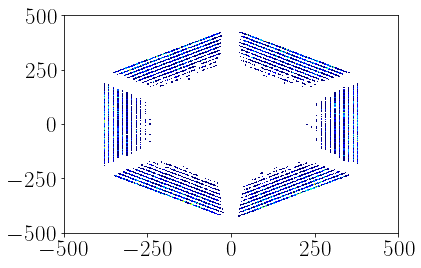

In [155]:
tofhitbin = [np.linspace(-500, 500, 1001), np.linspace(-500, 500, 1001)]
plt.hist2d(Ftof1a_inb_corr.PFtof1aHitx, Ftof1a_inb_corr.PFtof1aHity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

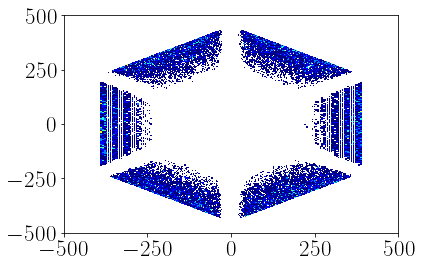

In [156]:
plt.hist2d(Ftof1b_inb_corr.PFtof1bHitx, Ftof1b_inb_corr.PFtof1bHity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

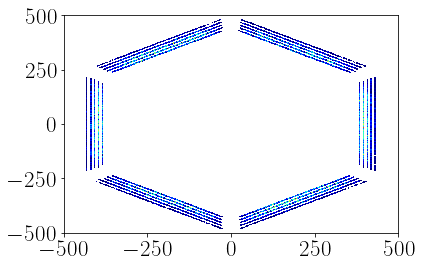

In [157]:
plt.hist2d(Ftof2_inb_corr.PFtof2Hitx, Ftof2_inb_corr.PFtof2Hity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

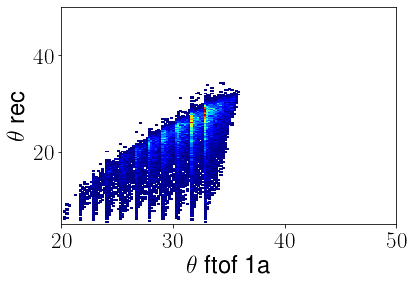

In [178]:
plt.hist2d(Ftof1a_inb_corr.theta, Ftof1a_inb_corr.Ptheta, bins = [np.linspace(20, 50, 30*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta$" + " ftof 1a")
plt.ylabel(r"$\theta$" + " rec")
plt.show()

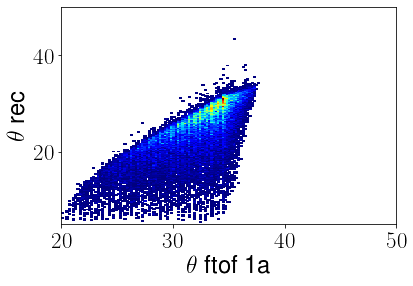

In [177]:
plt.hist2d(Ftof1b_inb_corr.theta, Ftof1b_inb_corr.Ptheta, bins = [np.linspace(20, 50, 30*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta$" + " ftof 1b")
plt.ylabel(r"$\theta$" + " rec")
plt.show()

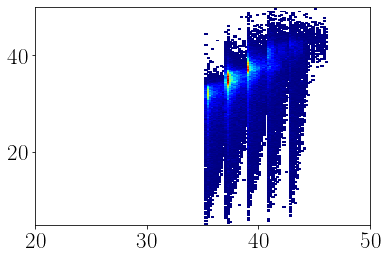

In [176]:
plt.hist2d(Ftof2_inb_corr.theta, Ftof2_inb_corr.Ptheta, bins = [np.linspace(20, 50, 30*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta$" + " ftof 2")
plt.ylabel(r"$\theta$" + " rec")
plt.show()

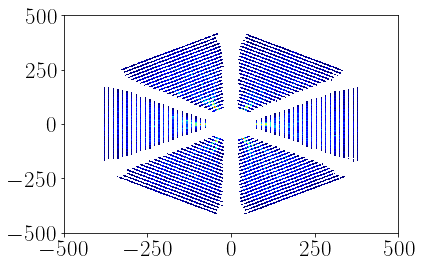

In [231]:
tofhitbin = [np.linspace(-500, 500, 1001), np.linspace(-500, 500, 1001)]
plt.hist2d(Ftof1a_outb_corr.PFtof1aHitx, Ftof1a_outb_corr.PFtof1aHity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

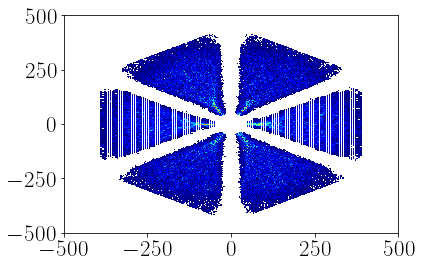

In [232]:
plt.hist2d(Ftof1b_outb_corr.PFtof1bHitx, Ftof1b_outb_corr.PFtof1bHity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

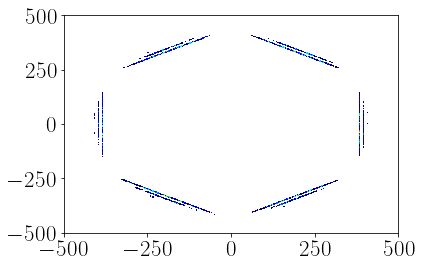

In [233]:
plt.hist2d(Ftof2_outb_corr.PFtof2Hitx, Ftof2_outb_corr.PFtof2Hity, bins = tofhitbin, cmap = cmap, cmin = 1)
plt.show()

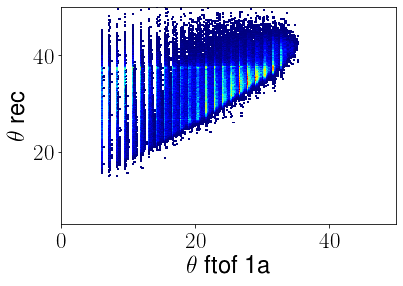

In [239]:
plt.hist2d(Ftof1a_outb_corr.theta, Ftof1a_outb_corr.Ptheta, bins = [np.linspace(0, 50, 50*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta$" + " ftof 1a")
plt.ylabel(r"$\theta$" + " rec")
plt.show()

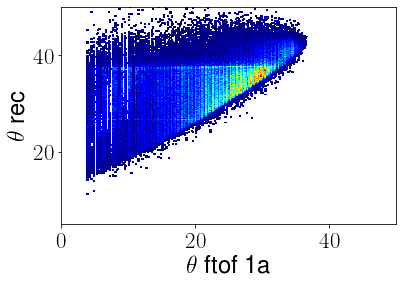

In [240]:
plt.hist2d(Ftof1b_outb_corr.theta, Ftof1b_outb_corr.Ptheta, bins = [np.linspace(0, 50, 50*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.xlabel(r"$\theta$" + " ftof 1a")
plt.ylabel(r"$\theta$" + " rec")
plt.show()

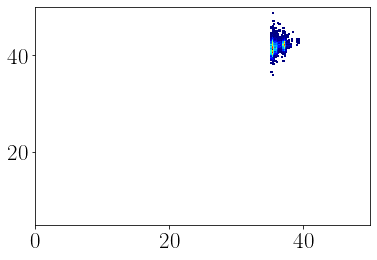

In [241]:
plt.hist2d(Ftof2_outb_corr.theta, Ftof2_outb_corr.Ptheta, bins = [np.linspace(0, 50, 50*5+1), np.linspace(5, 50, 45*5+1)], cmap = cmap, cmin = 1)
plt.show()

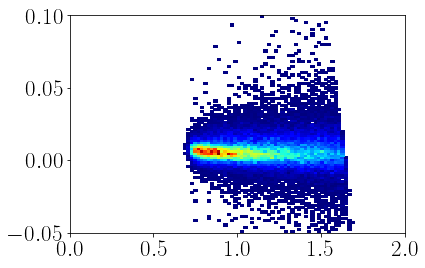

In [284]:
plt.hist2d(Ftof1a_inb_nocorr.Pp, Ftof1a_inb_nocorr.GenPp -Ftof1a_inb_nocorr.Pp, cmap = cmap, cmin = 1, bins = [np.linspace(0, 2, 101), np.linspace(-0.05, 0.1 ,101)])
plt.show()

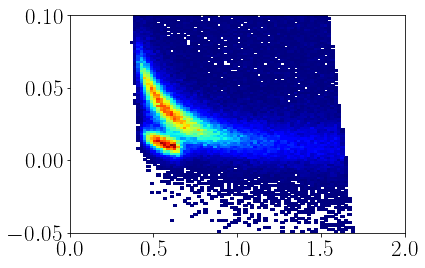

In [285]:
plt.hist2d(Ftof2_inb_nocorr.Pp, Ftof2_inb_nocorr.GenPp -Ftof2_inb_nocorr.Pp, cmap = cmap, cmin = 1, bins = [np.linspace(0, 2, 101), np.linspace(-0.05, 0.1 ,101)])
plt.show()

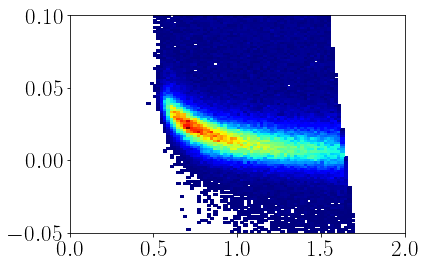

In [286]:
plt.hist2d(Ftof1a_outb_nocorr.Pp, Ftof1a_outb_nocorr.GenPp -Ftof1a_outb_nocorr.Pp, cmap = cmap, cmin = 1, bins = [np.linspace(0, 2, 101), np.linspace(-0.05, 0.1 ,101)])
plt.show()

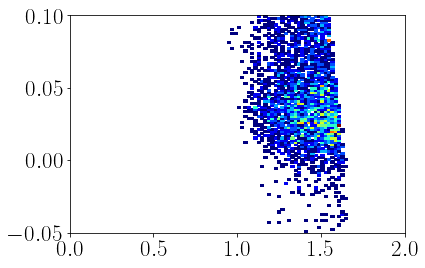

In [287]:
plt.hist2d(Ftof2_outb_nocorr.Pp, Ftof2_outb_nocorr.GenPp -Ftof2_outb_nocorr.Pp, cmap = cmap, cmin = 1, bins = [np.linspace(0, 2, 101), np.linspace(-0.05, 0.1 ,101)])
plt.show()

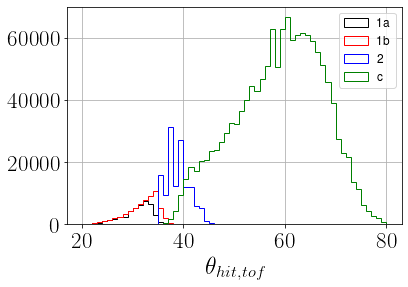

In [21]:
Ftof1a_inb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'k', label="1a")
Ftof1b_inb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'r', label="1b")
Ftof2_inb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'b', label="2")
Ctof_inb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'g', label="c")
plt.xlabel(r"$\theta_{hit, tof}$")
plt.legend(loc="upper right")

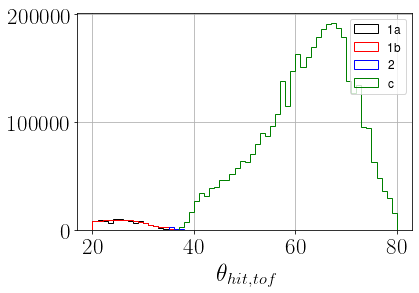

In [22]:
Ftof1a_outb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'k', label="1a")
Ftof1b_outb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'r', label="1b")
Ftof2_outb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'b', label="2")
Ctof_outb_nocorr.theta.hist(bins = np.linspace(20, 80, 61), histtype = 'step', color = 'g', label="c")
plt.xlabel(r"$\theta_{hit, tof}$")
plt.legend(loc="upper right")

In [143]:
def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

# No correction

## inbending
### Ftof 1a

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


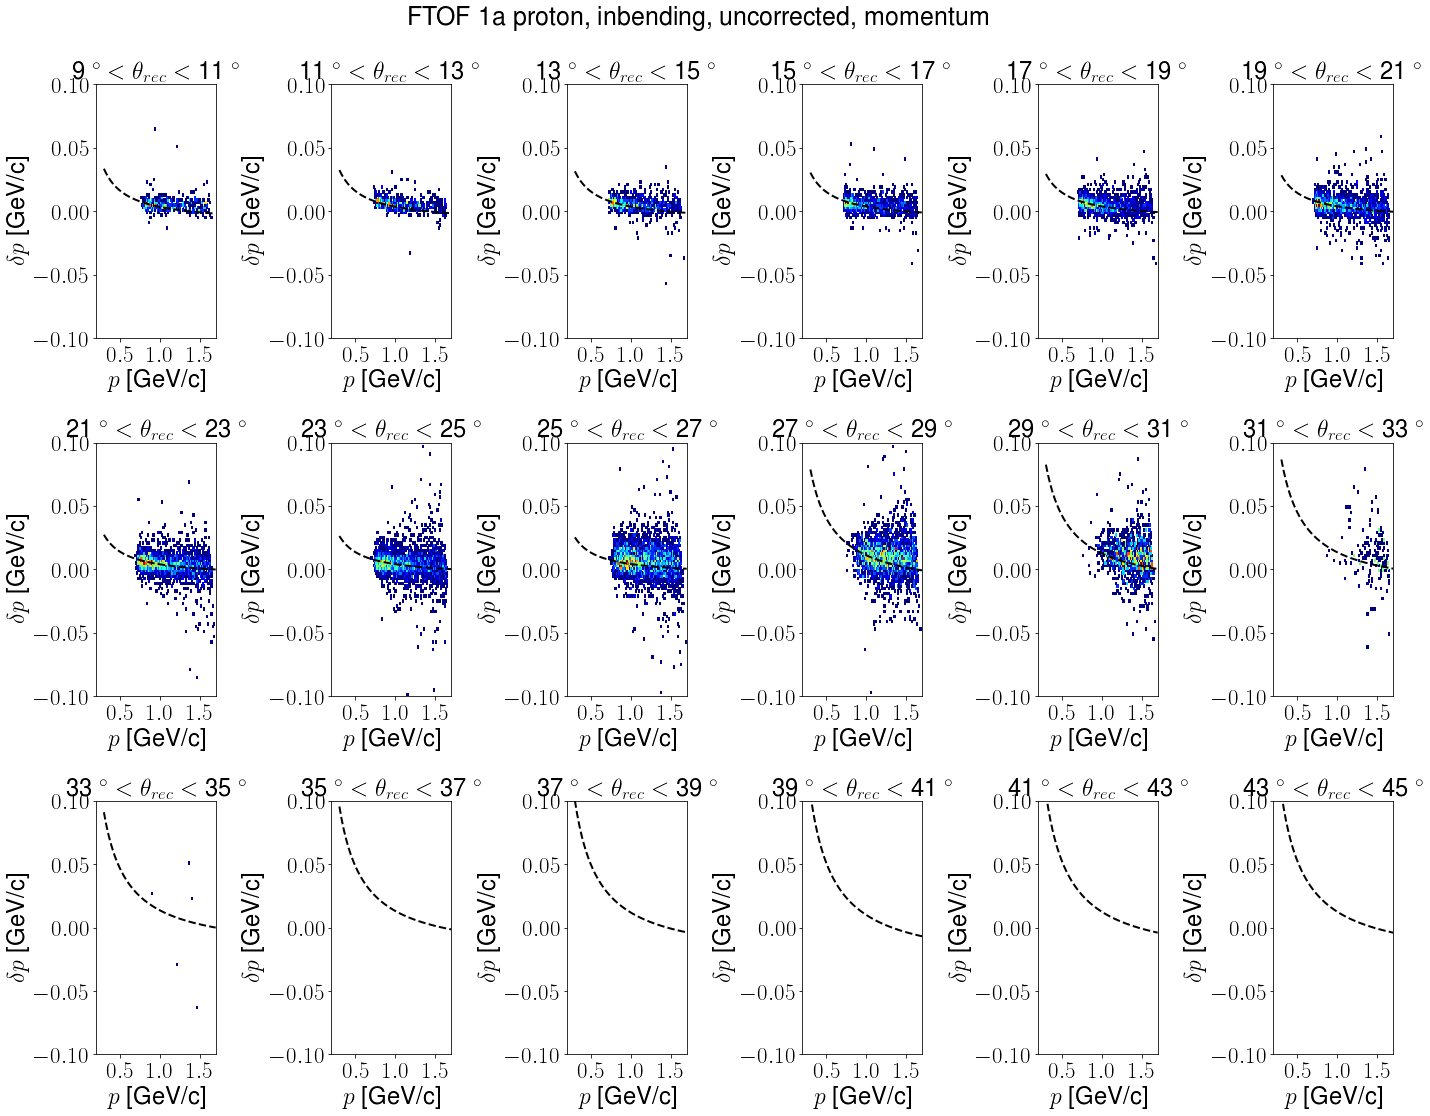

In [193]:
inbendingFD = copy(Ftof1a_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 1a proton, inbending, uncorrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


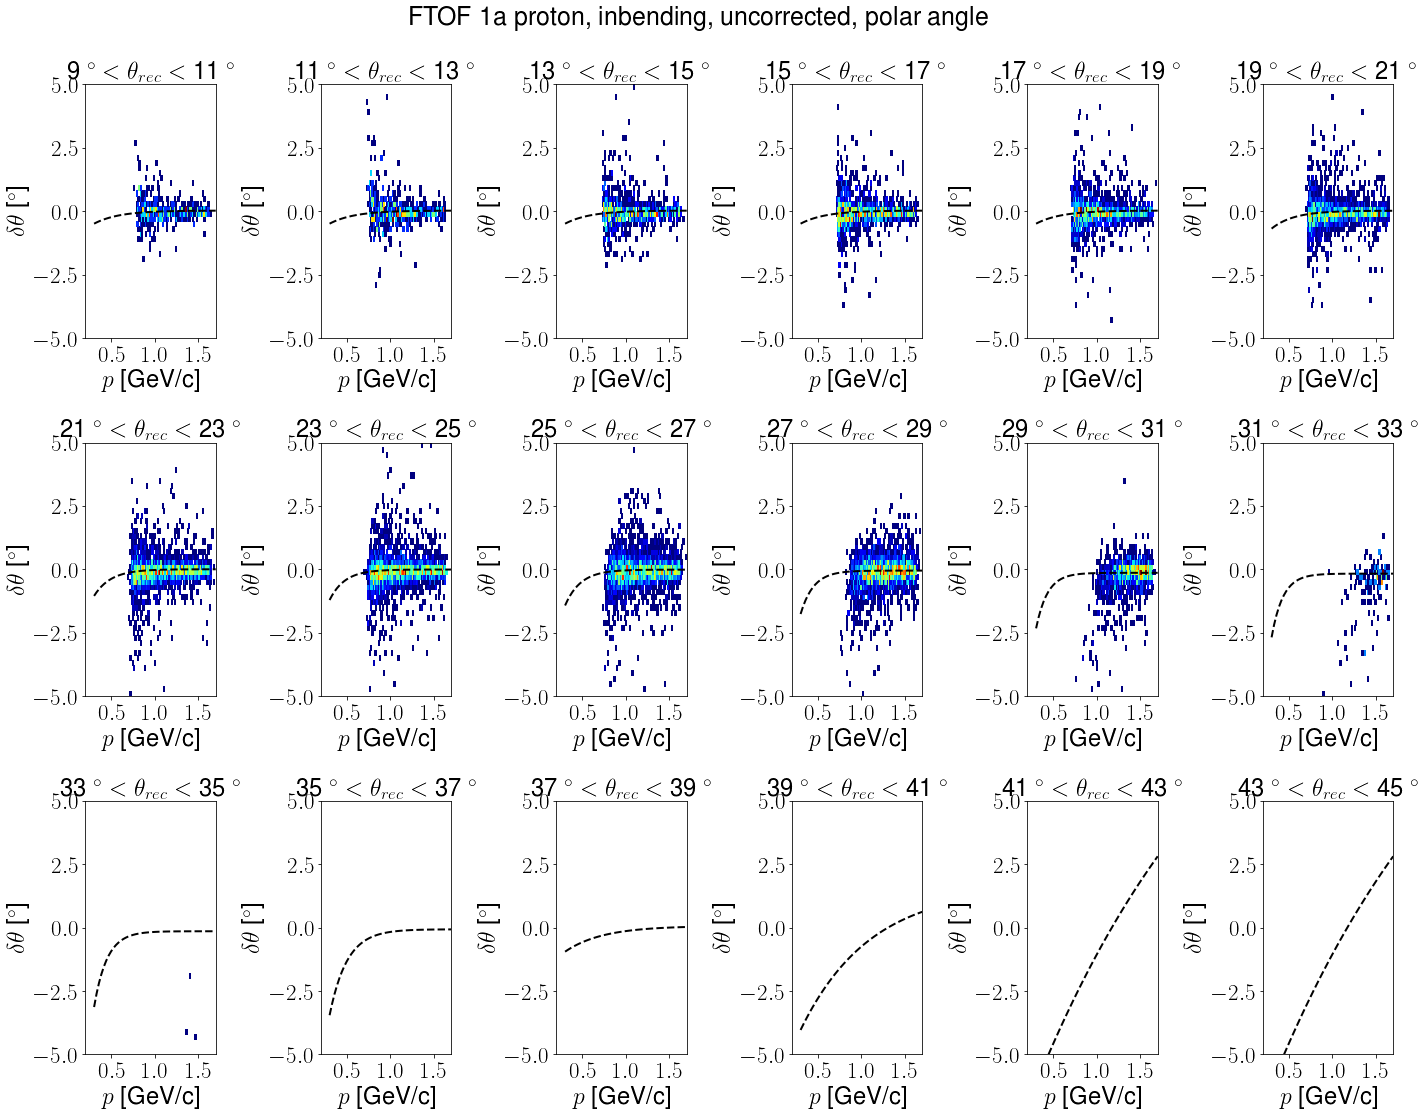

In [194]:
inbendingFD = copy(Ftof1a_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1a proton, inbending, uncorrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


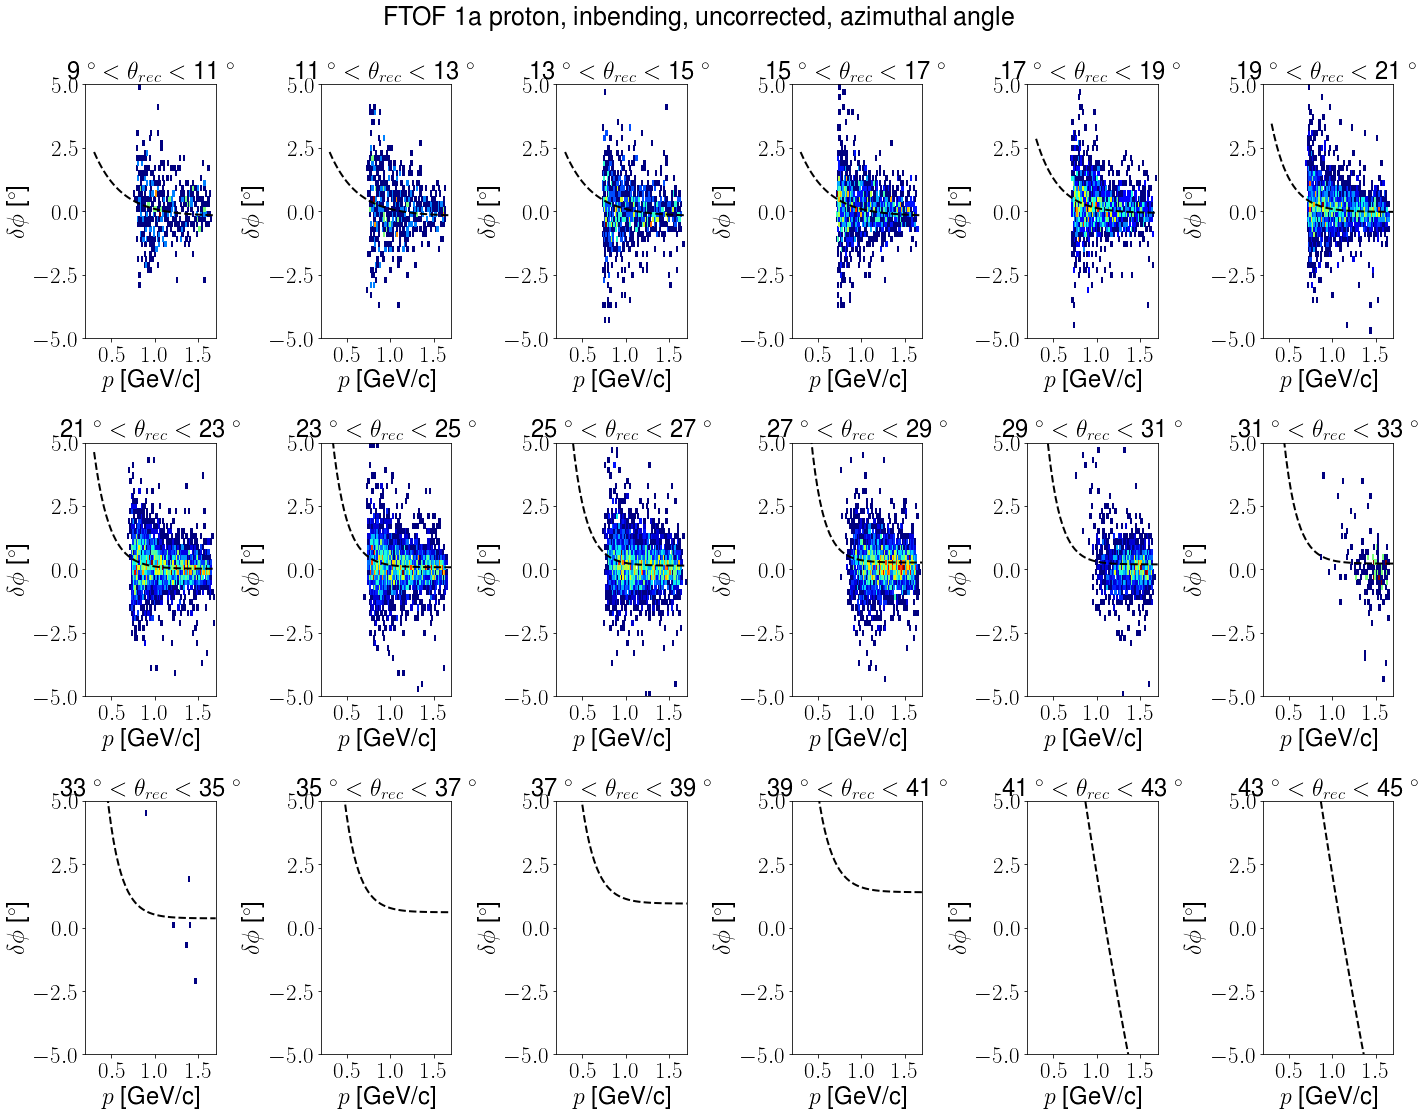

In [200]:
inbendingFD = copy(Ftof1a_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
fig.suptitle("FTOF 1a proton, inbending, uncorrected, azimuthal angle")
plt.tight_layout()

### Ftof 1b

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


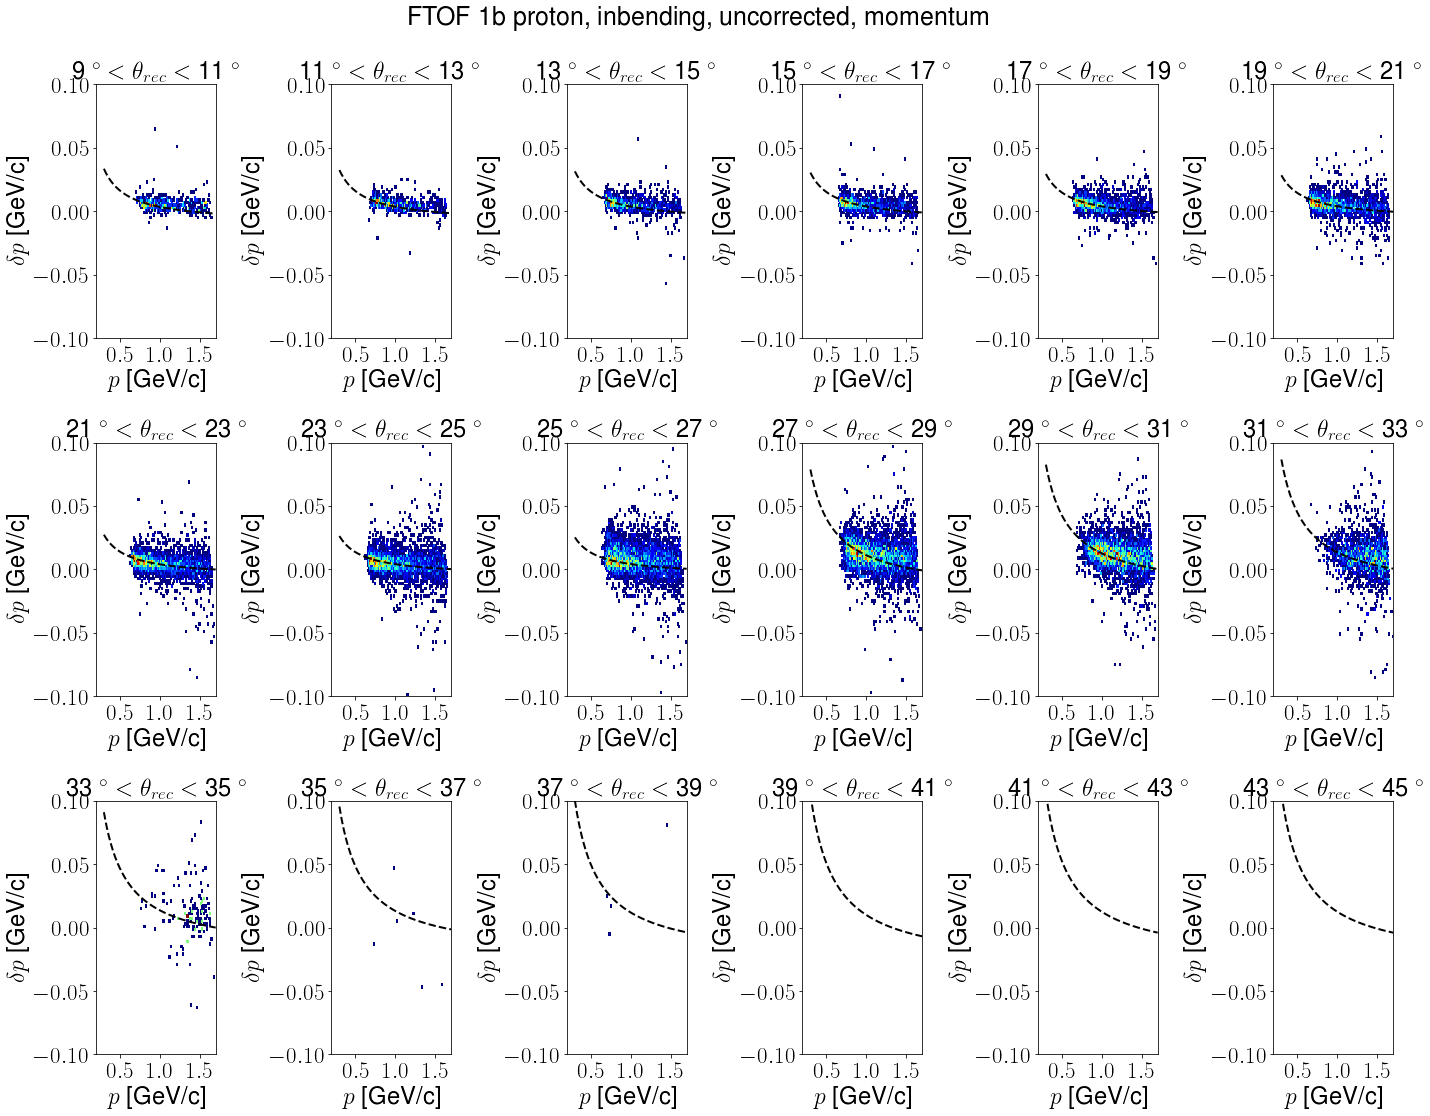

In [196]:
inbendingFD = copy(Ftof1b_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 1b proton, inbending, uncorrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


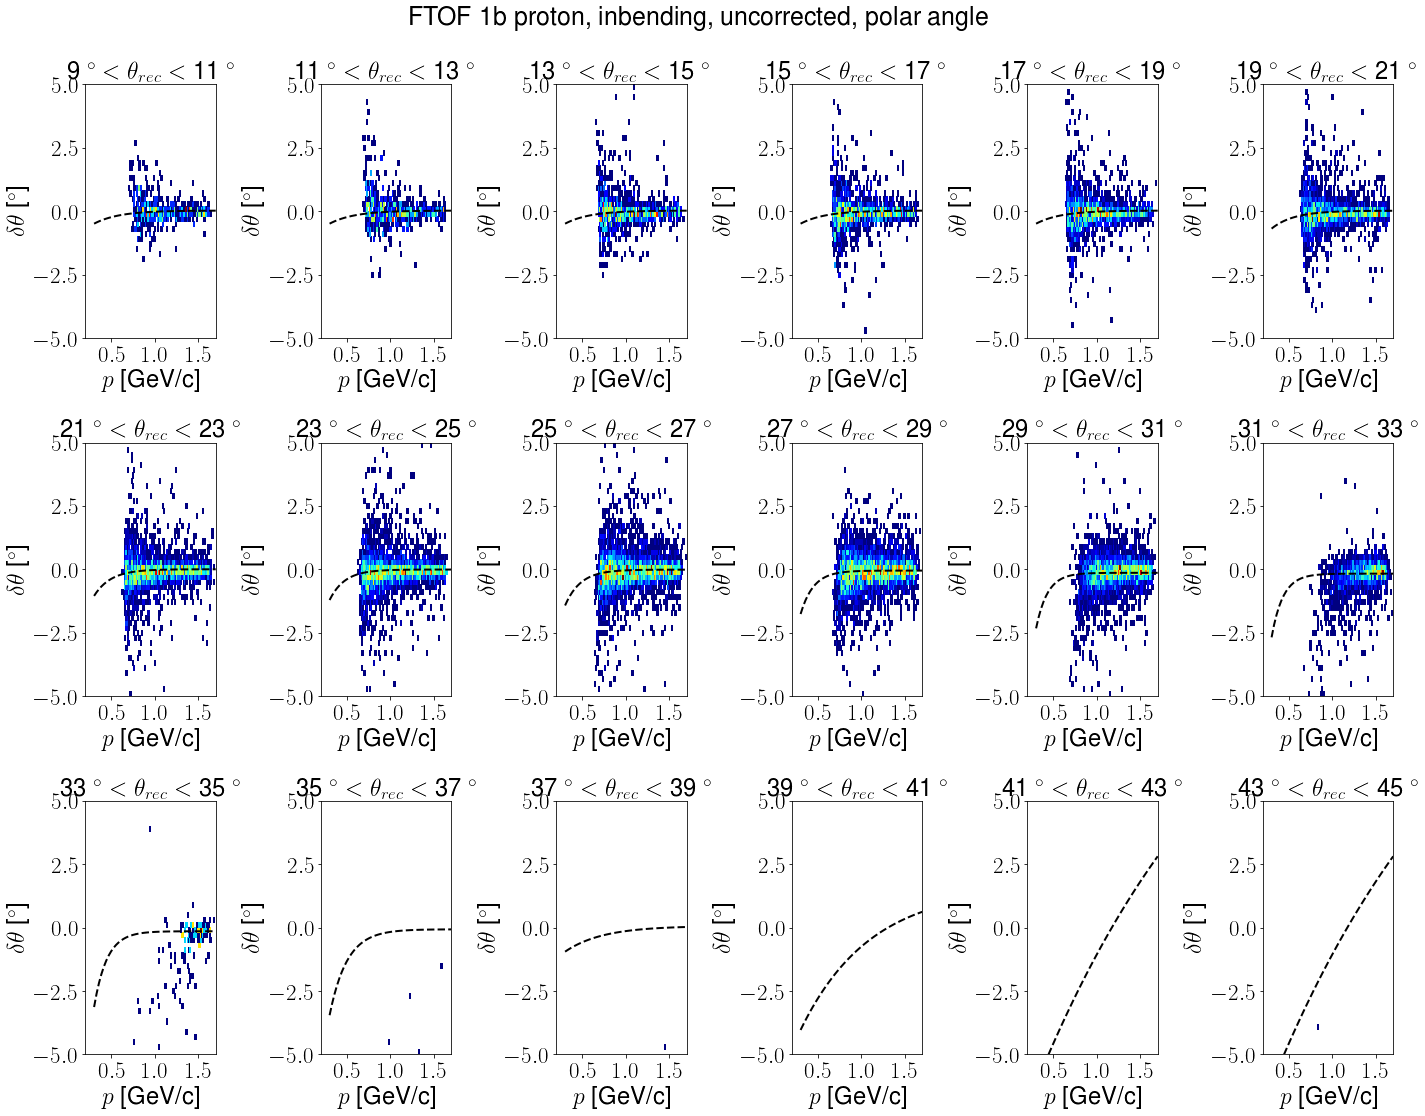

In [197]:
inbendingFD = copy(Ftof1b_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1b proton, inbending, uncorrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


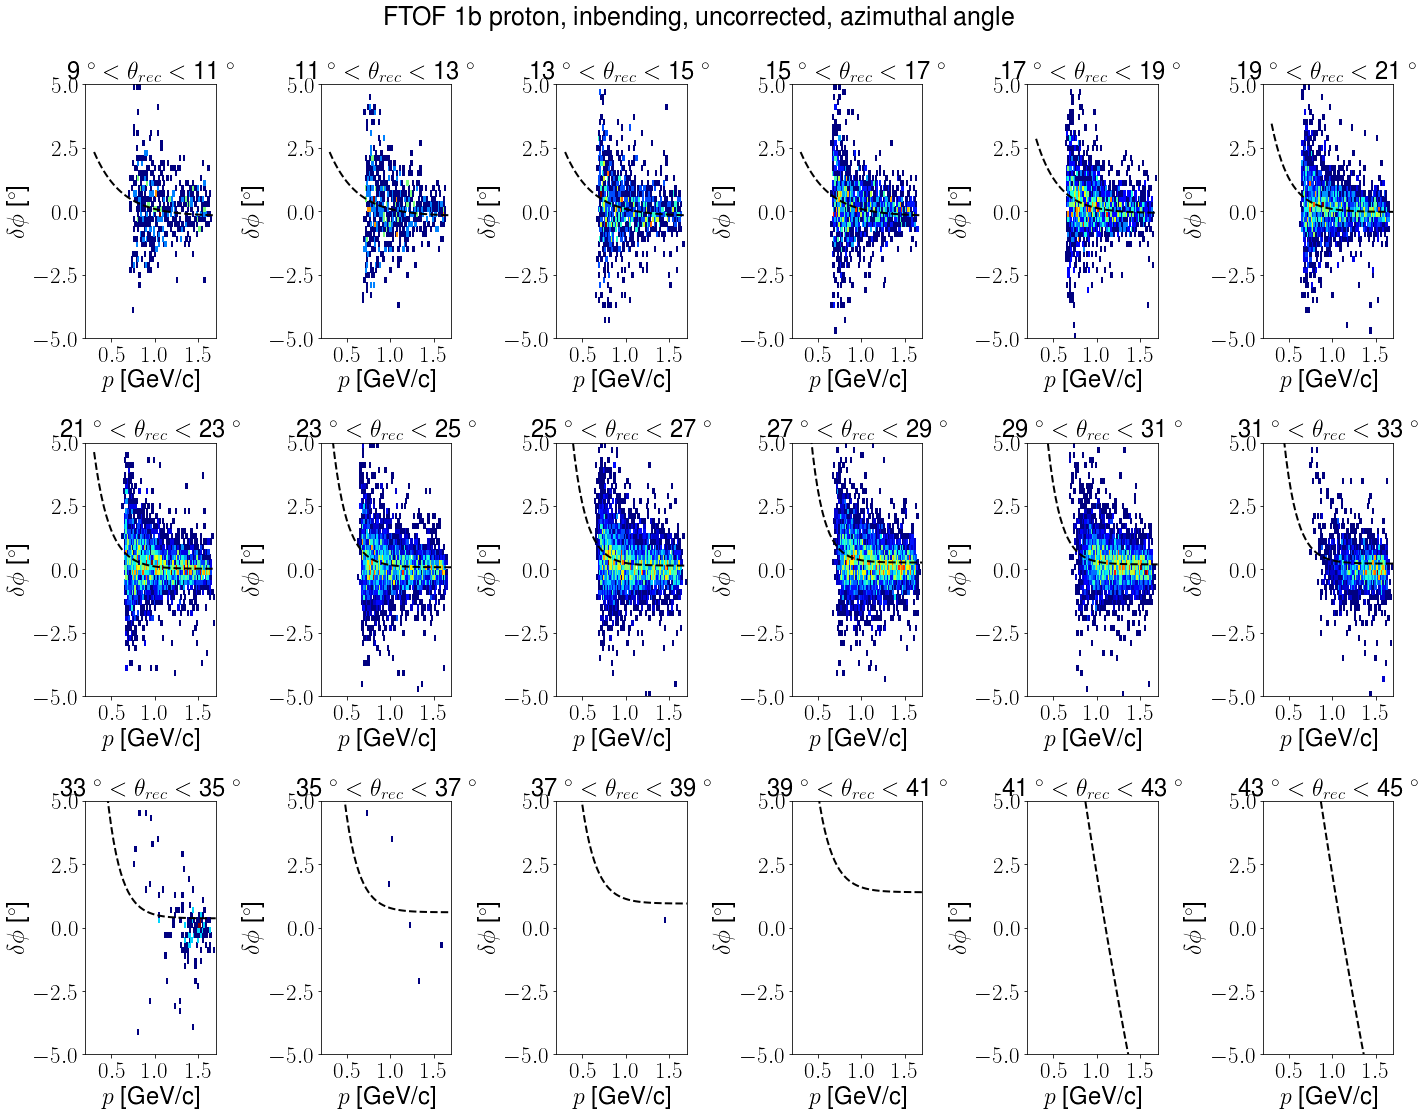

In [199]:
inbendingFD = copy(Ftof1b_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1b proton, inbending, uncorrected, azimuthal angle")
plt.tight_layout()

### Ftof 2

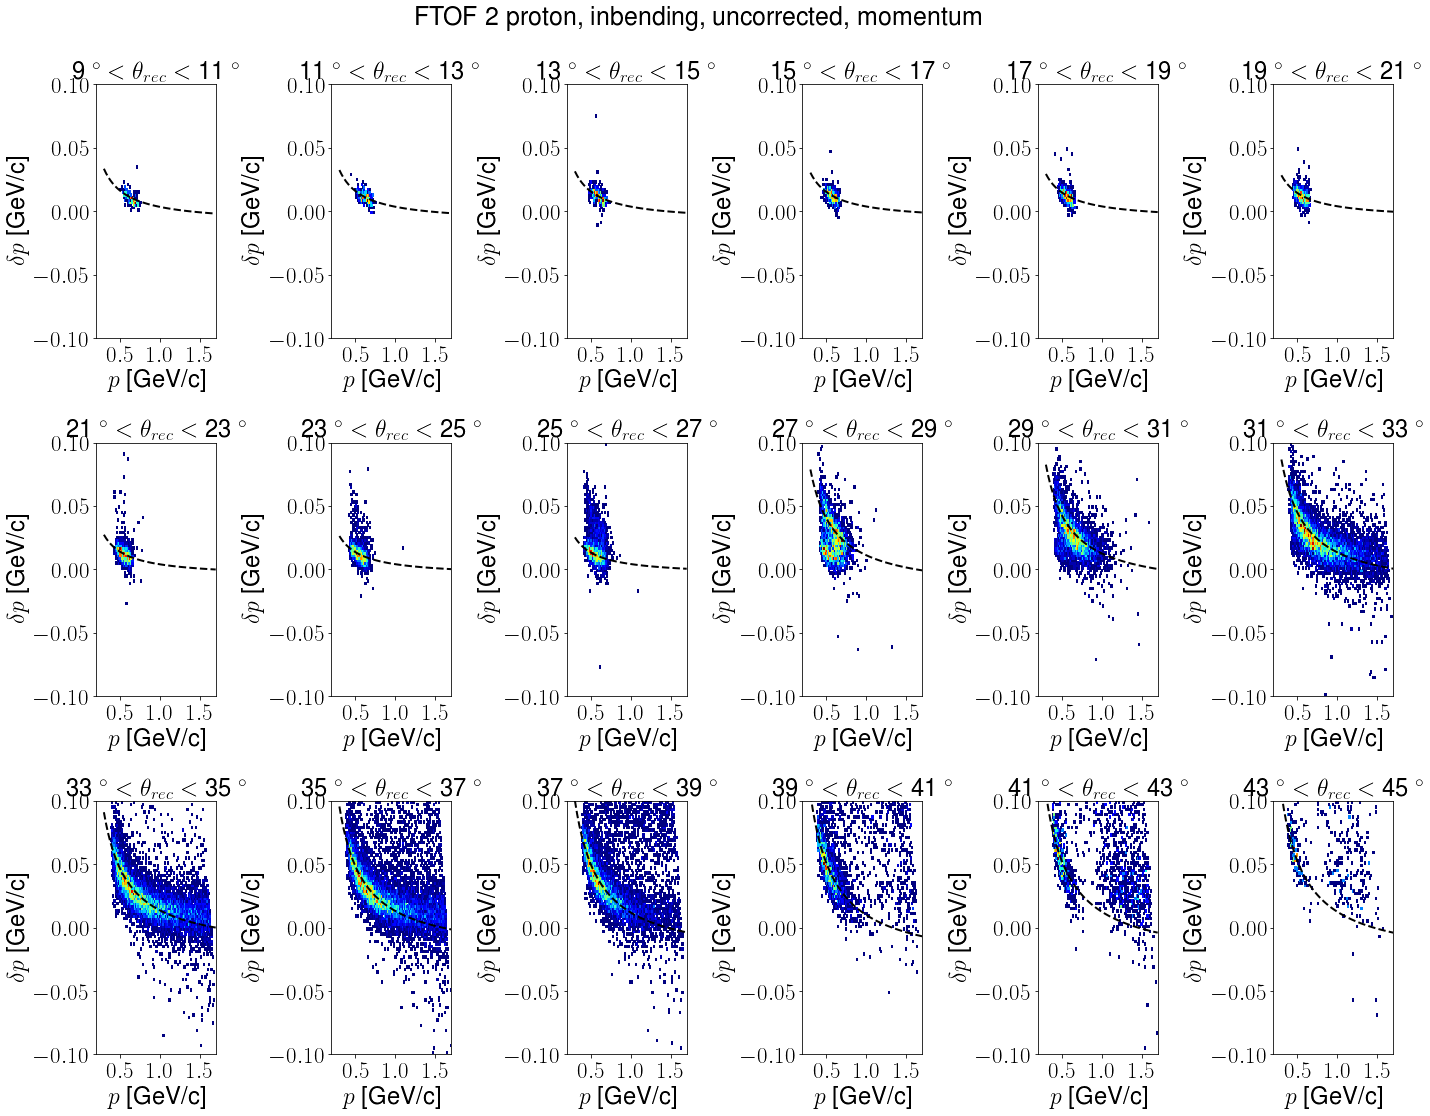

In [201]:
inbendingFD = copy(Ftof2_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
                  [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 2 proton, inbending, uncorrected, momentum")
plt.tight_layout()

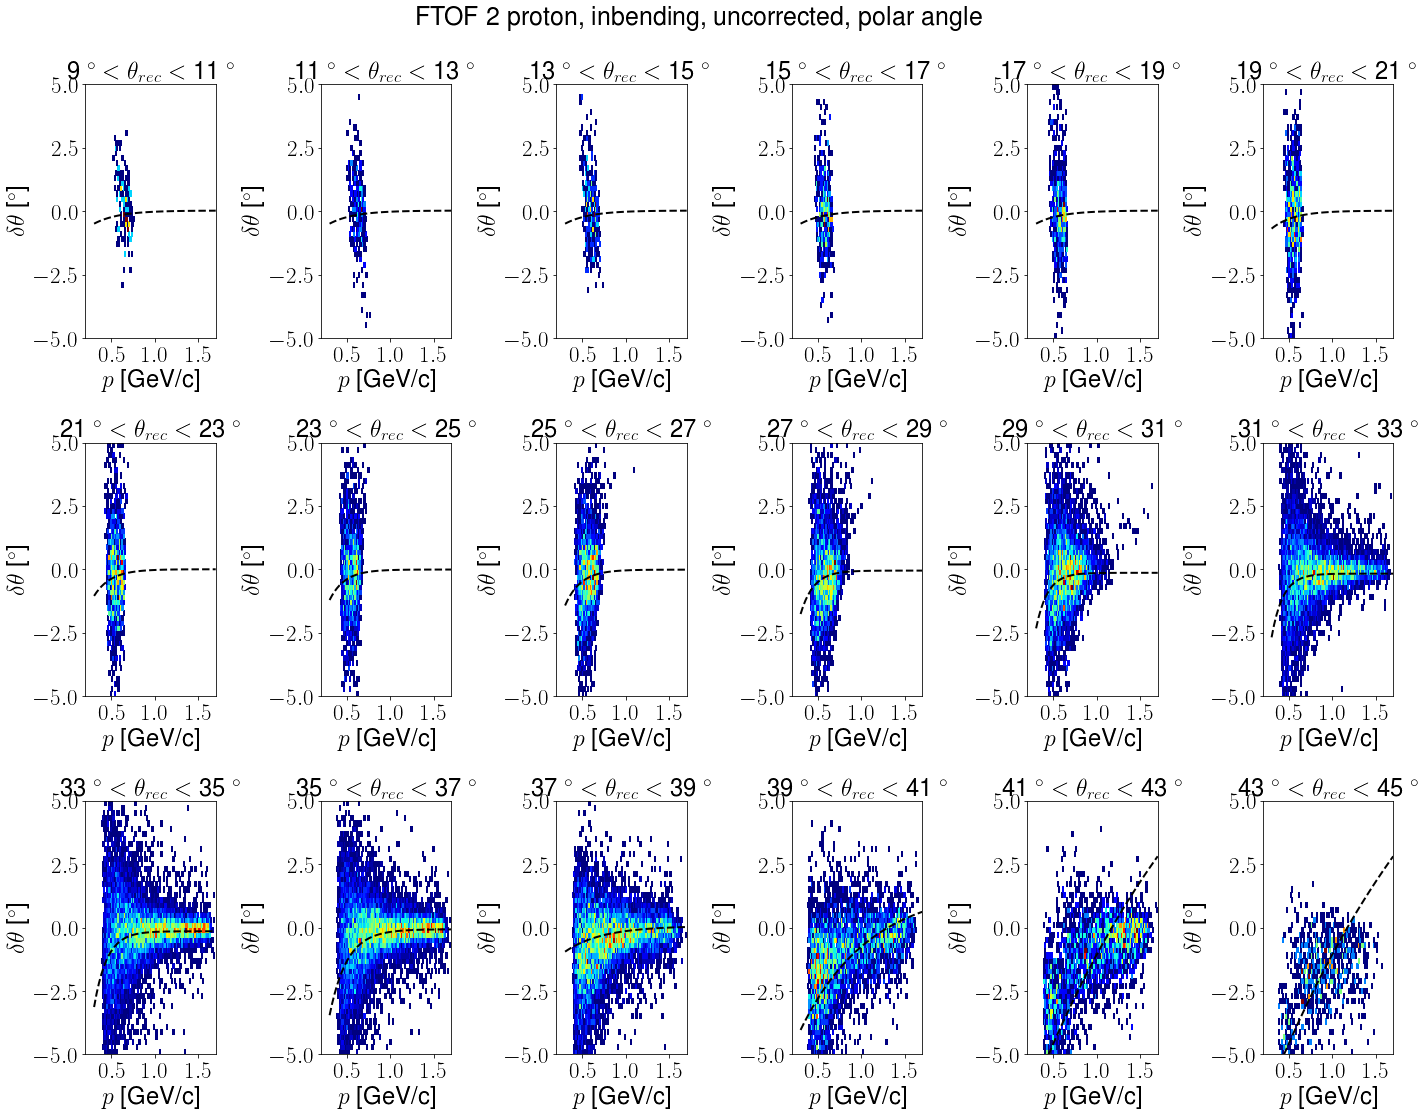

In [202]:
inbendingFD = copy(Ftof2_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
              [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 2 proton, inbending, uncorrected, polar angle")
plt.tight_layout()

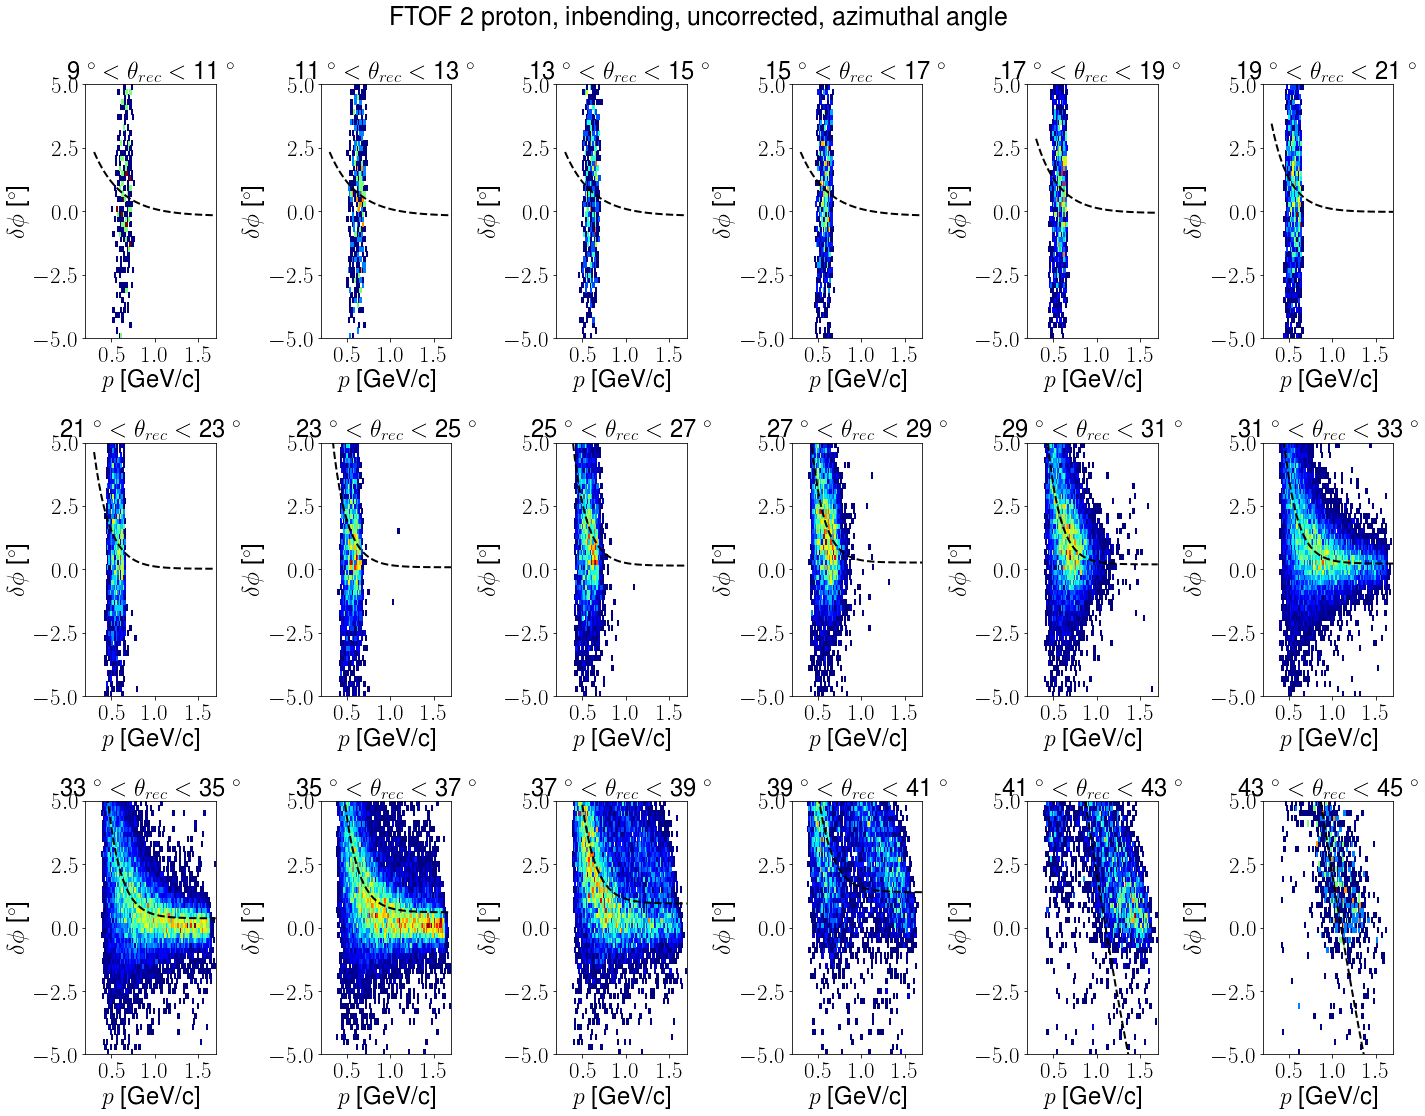

In [261]:
inbendingFD = copy(Ftof2_inb_nocorr)

theta = np.linspace(0, 17,18)*2 + 10
const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
                  [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 2 proton, inbending, uncorrected, azimuthal angle")
plt.tight_layout()

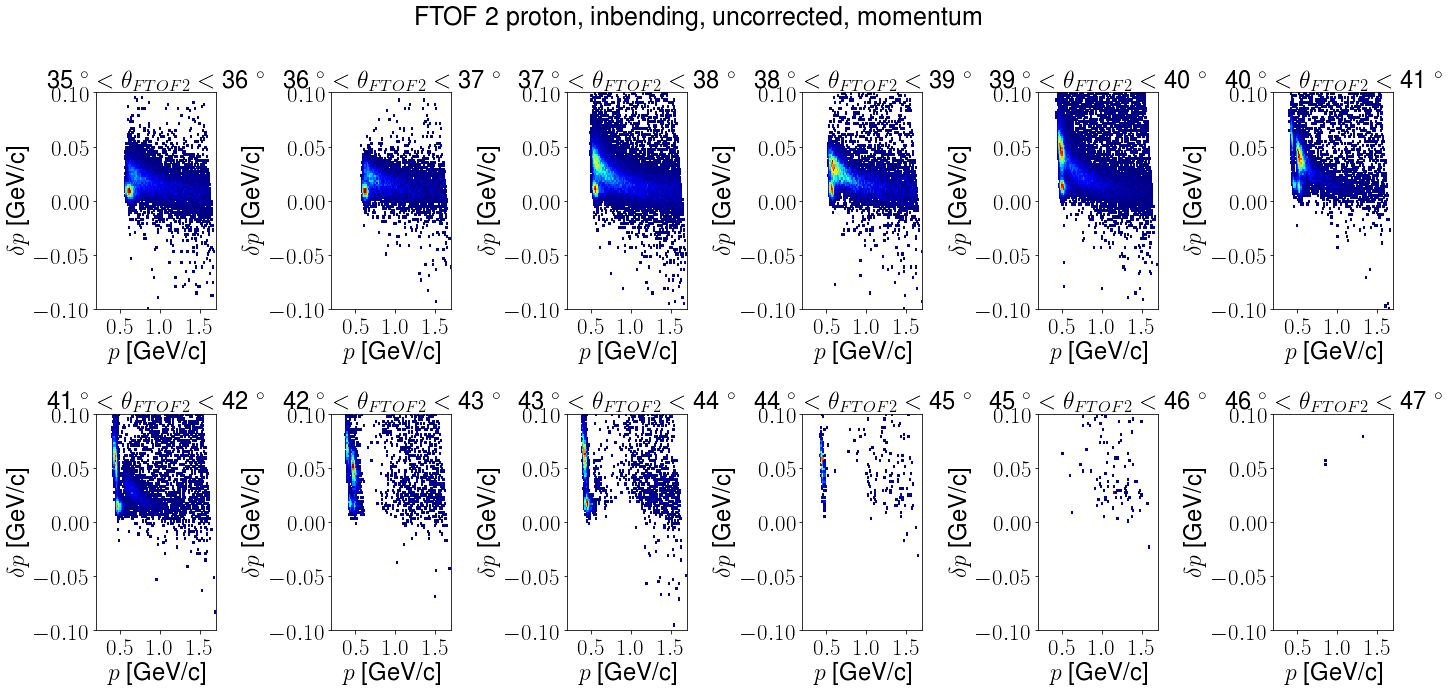

In [25]:
inbendingFD = copy(Ftof2_inb_nocorr)

# theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(2,6, figsize=(20,10))
for row in range(2):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.theta >= ind + 35) & (inbendingFD.theta < ind + 1 + 35)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind + 35)+" "+degree + r" $<\theta_{FTOF2}<$ " + str(ind+ 1 +35)+" "+degree)
fig.suptitle("FTOF 2 proton, inbending, uncorrected, momentum")
plt.tight_layout()

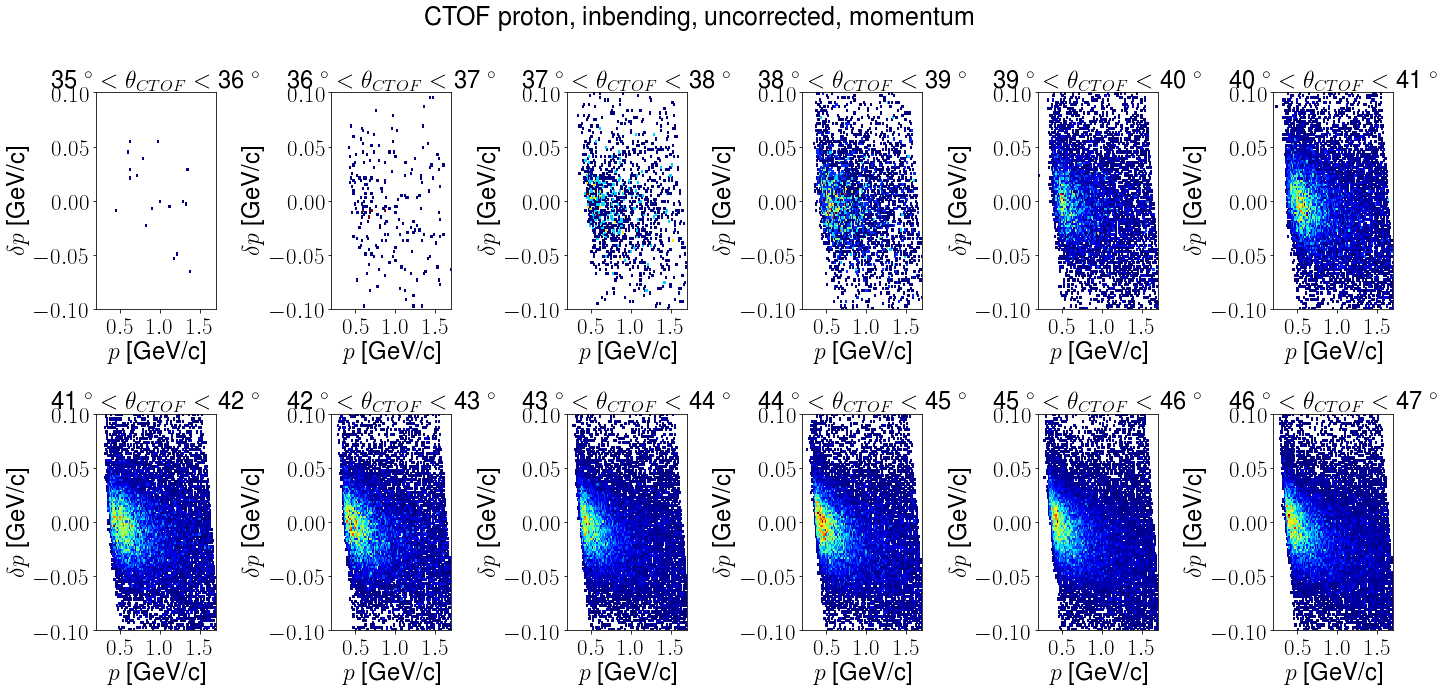

In [26]:
inbendingCD = copy(Ctof_inb_nocorr)

# theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(2,6, figsize=(20,10))
for row in range(2):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.theta >= ind + 35) & (inbendingCD.theta < ind + 1 + 35)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind + 35)+" "+degree + r" $<\theta_{CTOF}<$ " + str(ind+ 1 +35)+" "+degree)
fig.suptitle("CTOF proton, inbending, uncorrected, momentum")
plt.tight_layout()

### Ctof

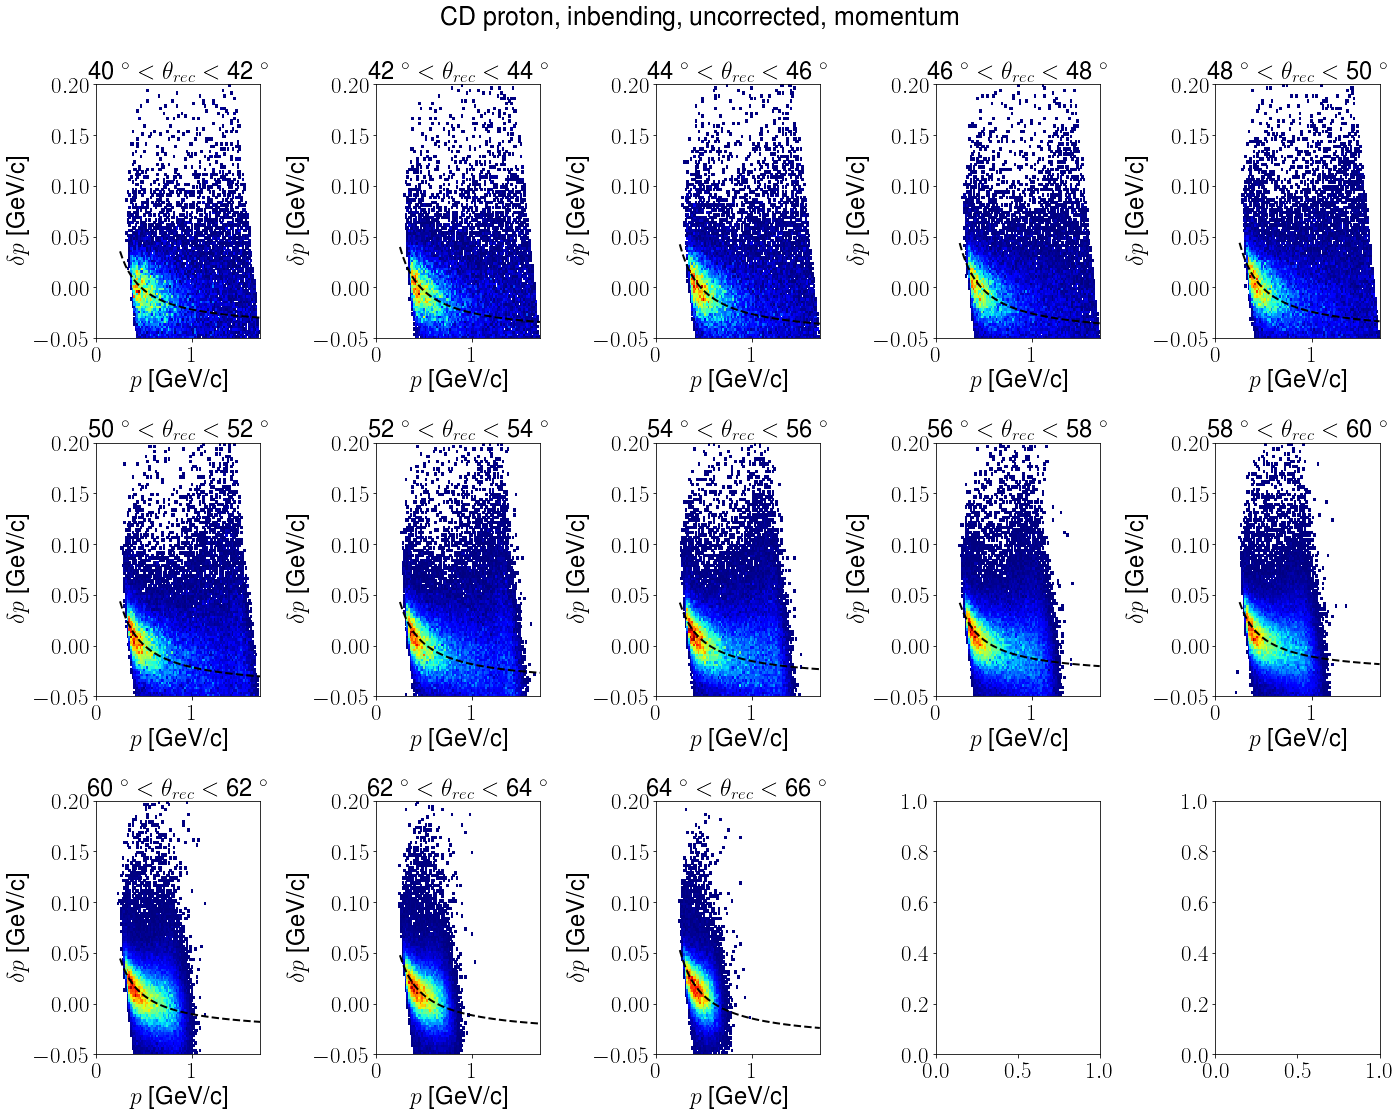

In [187]:
inbendingCD = copy(Ctof_inb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
fig.suptitle("CD proton, inbending, uncorrected, momentum")
plt.tight_layout()

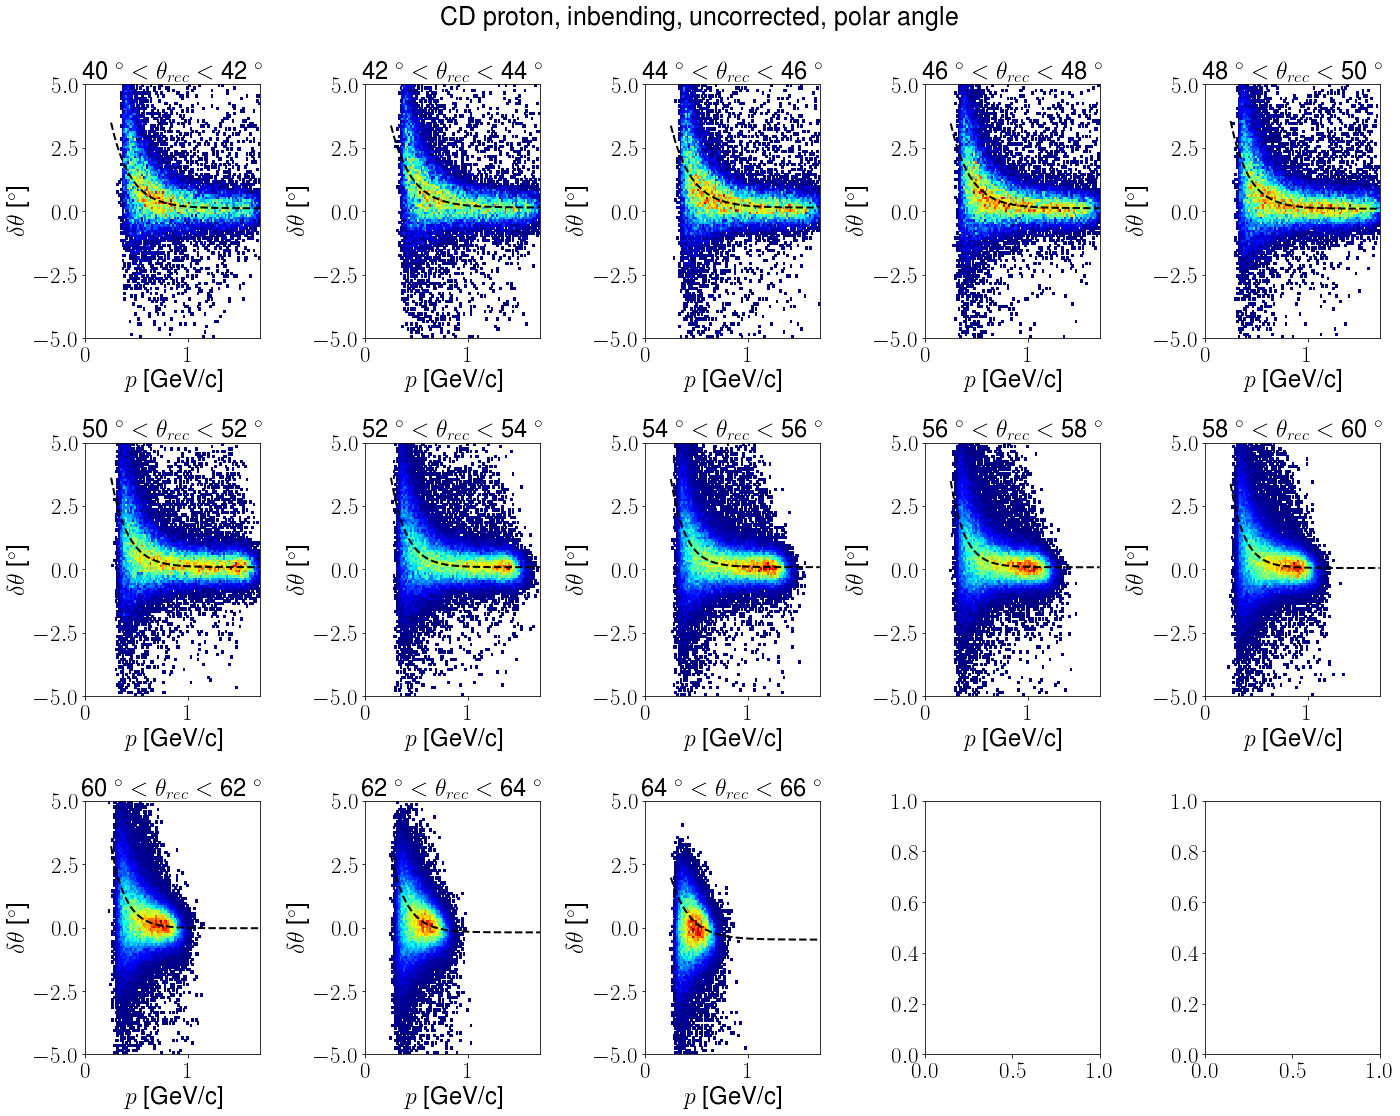

In [190]:
inbendingCD = copy(Ctof_inb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = -1.09849291*100 + 8.86664014 * theta - 0.26643881 * theta**2 + 3.53814210 * 10**(-3) * theta**3 - 1.75297107 * 10**(-5) * theta**4
coeff_CD = 9.52034523*100 -5.74808292 * 10 * theta + 1.15386949 * theta**2 - 7.57970373 * 0.001 * theta**3
coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * theta - 2.37730217*0.1 * theta**2 + 1.55153003*0.001*theta**3
params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPtheta"] - inbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, inbending, uncorrected, polar angle")
plt.tight_layout()
# plt.savefig("protonCD_inb_theta.pdf")

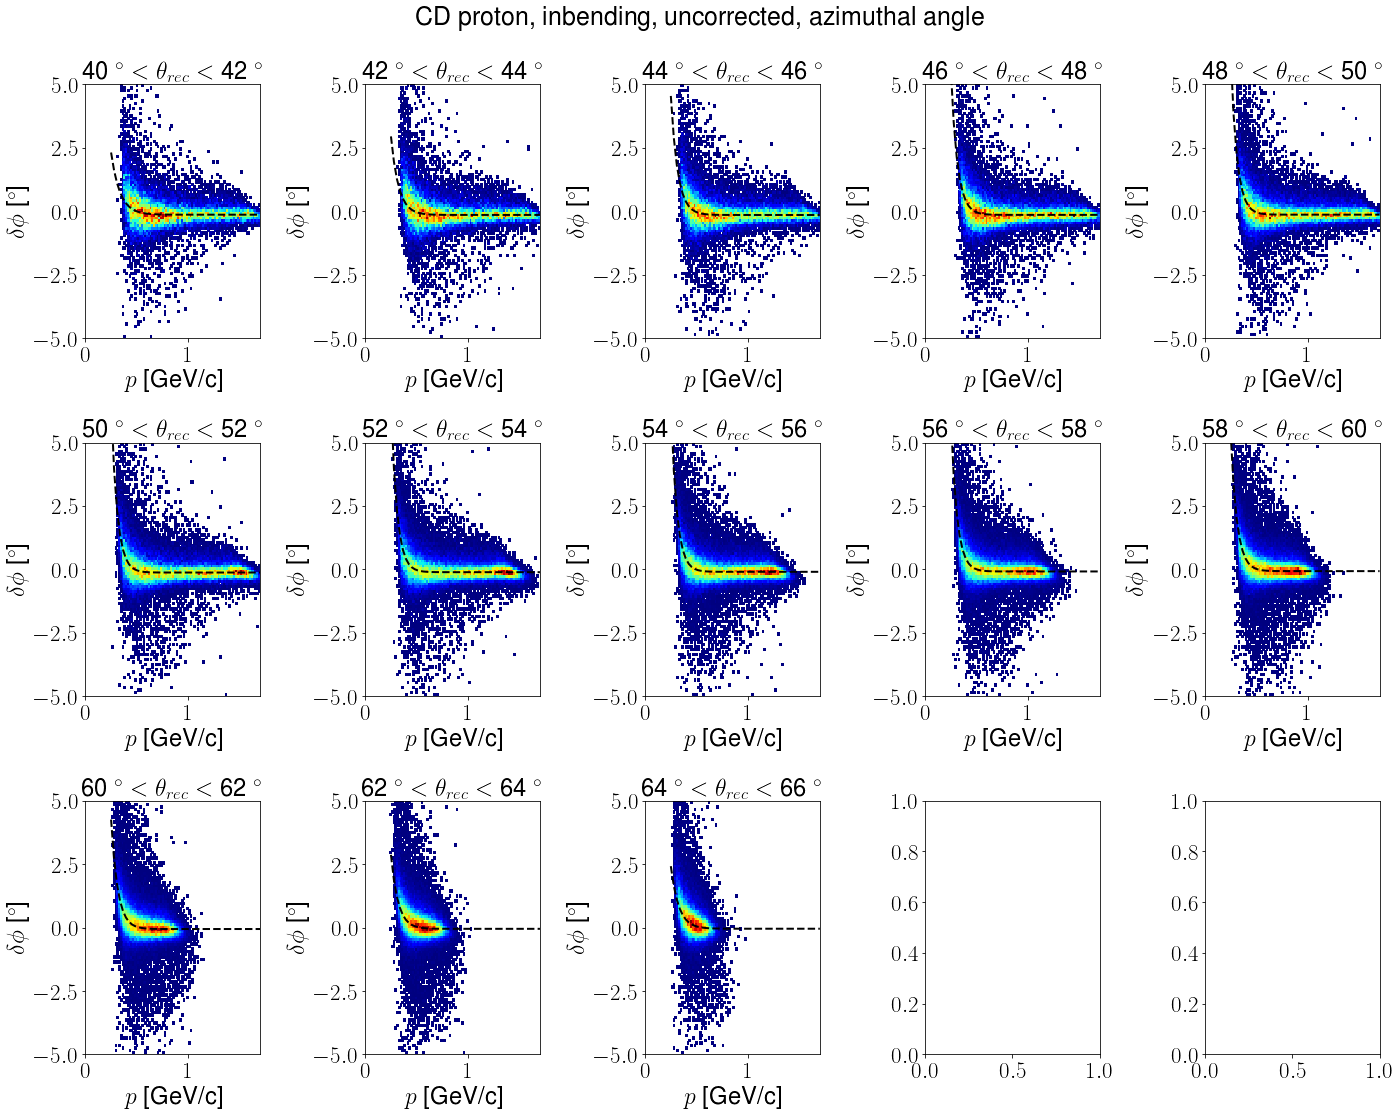

In [189]:
inbendingCD = copy(Ctof_inb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = 4.94546178 -3.26662886*0.1 * theta +  7.39069603 * 0.001 * theta**2 -6.83599356*10**(-5) * theta**3 + 2.12303103*10**(-7) * theta**4
coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * theta + 4.00923146*10**(2) * theta**2 - 5.12792347 * theta**3 + 2.41793167*10**(-2) * theta**4
coeff2_CD =  1.20477219*10**(2) -5.86630228 * theta + 7.44007875*10**(-2) * theta**2 -2.42652473*10**(-4) * theta**3
params_phi = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPphi"] - inbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, inbending, uncorrected, azimuthal angle")
plt.tight_layout()

## outbending
### Ftof 1a

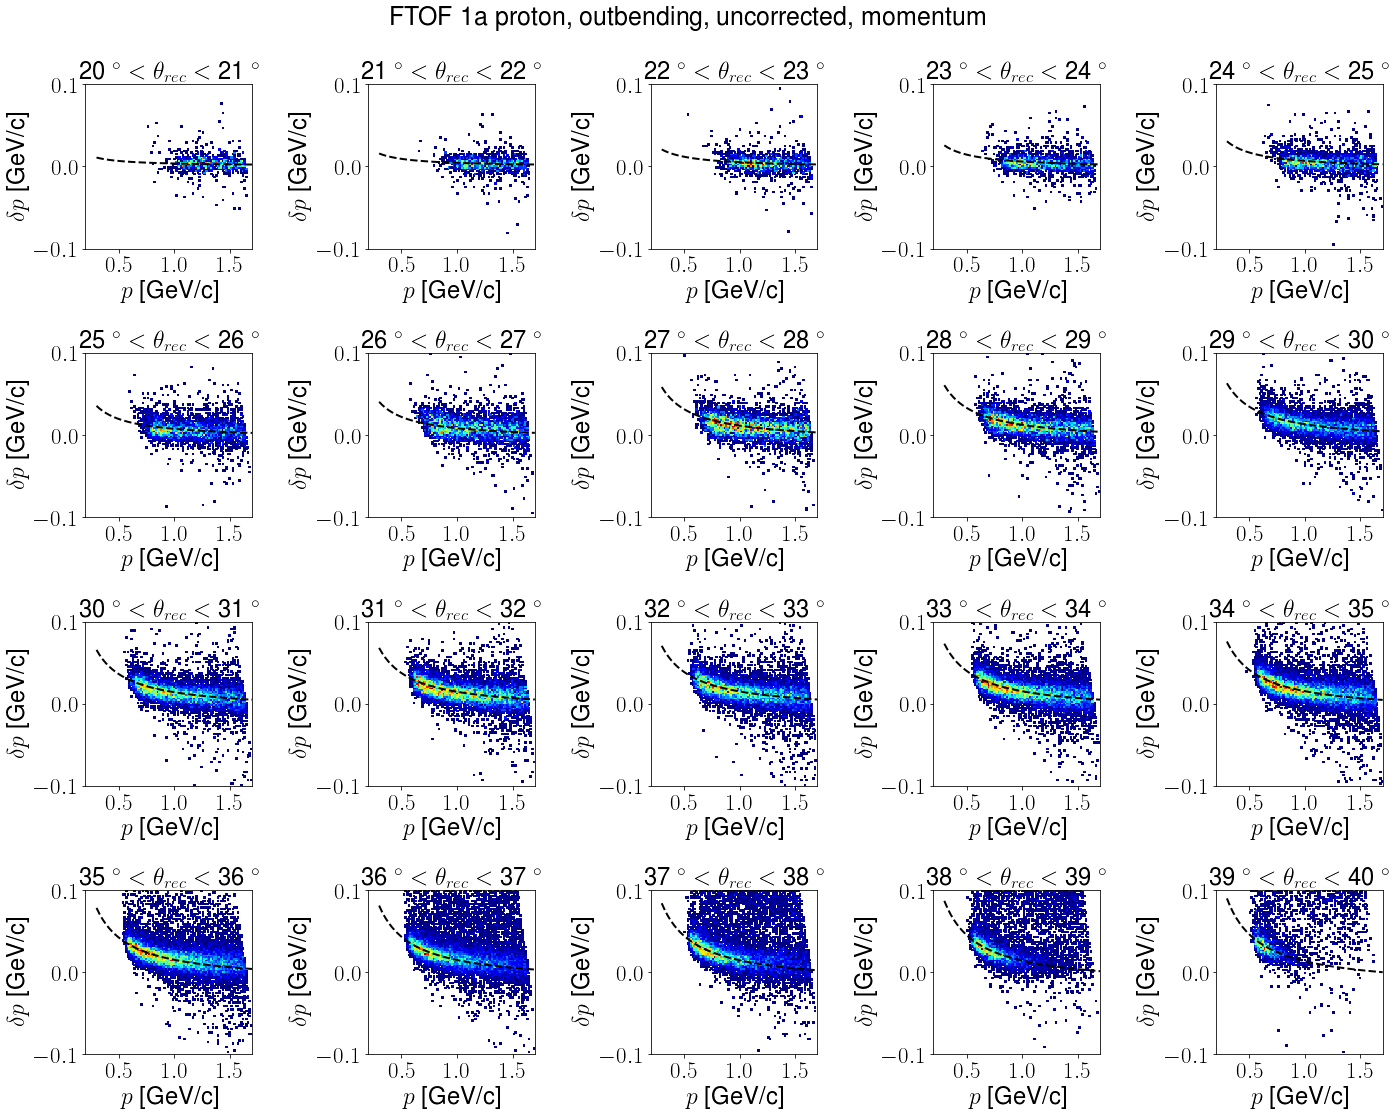

In [218]:
outbendingFD = copy(Ftof1a_outb_nocorr)

theta = np.linspace(0,19,20) + 20.5
const_FD = np.select([theta<27, (theta>=27)],
              [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
coeff_FD = np.select([theta<27, (theta>=27)],
              [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 1a proton, outbending, uncorrected, momentum")
plt.tight_layout()

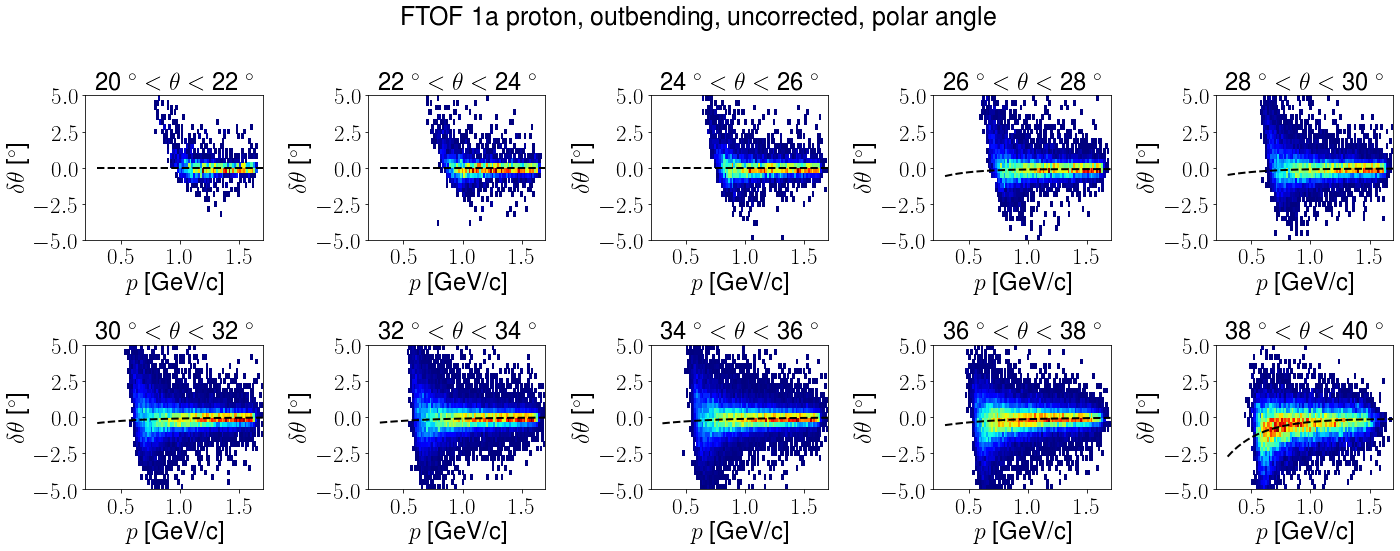

In [220]:
outbendingFD = copy(Ftof1a_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 1a proton, outbending, uncorrected, polar angle")
plt.tight_layout()

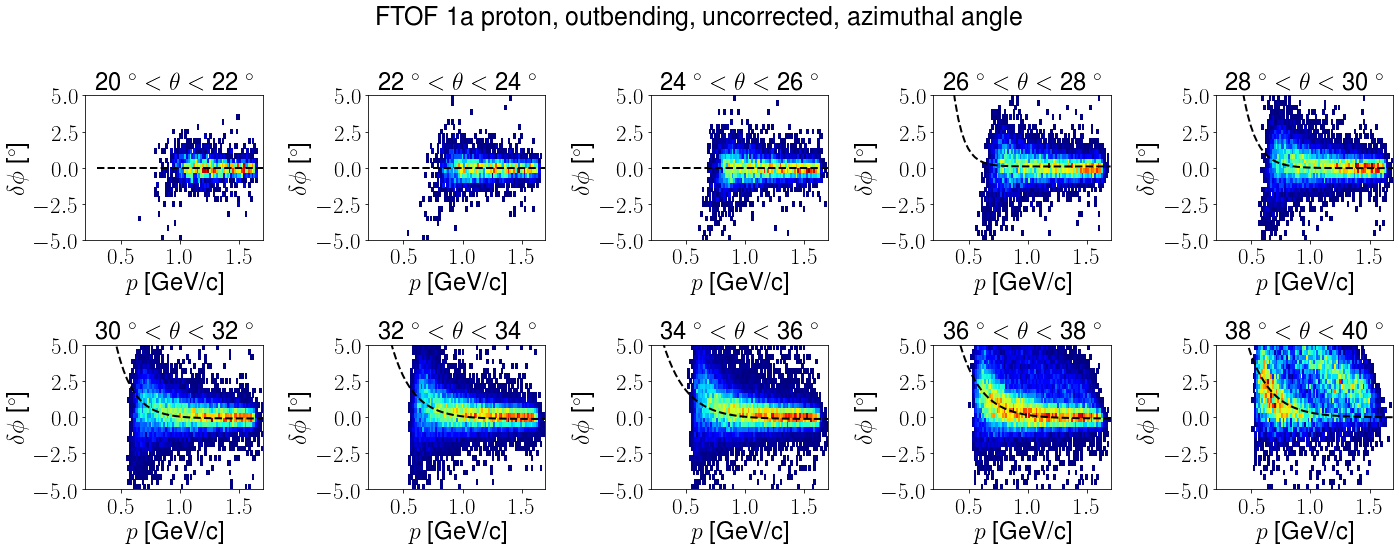

In [221]:
outbendingFD = copy(Ftof1a_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 1a proton, outbending, uncorrected, azimuthal angle")
plt.tight_layout()

## Ftof 1b

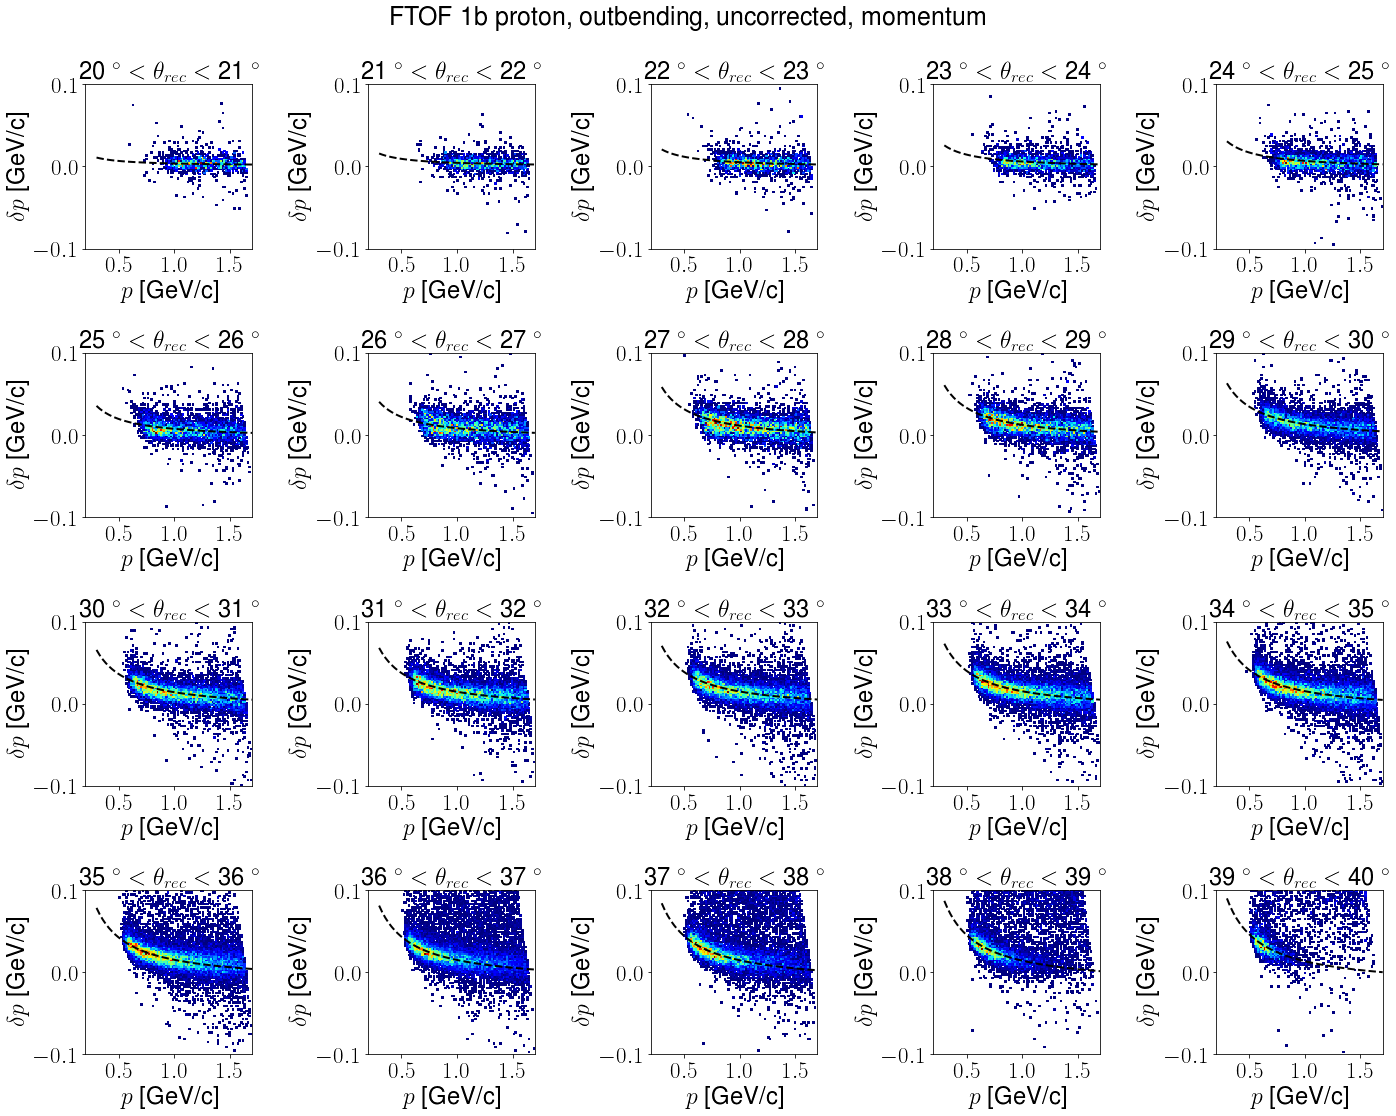

In [222]:
outbendingFD = copy(Ftof1b_outb_nocorr)

theta = np.linspace(0,19,20) + 20.5
const_FD = np.select([theta<27, (theta>=27)],
              [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
coeff_FD = np.select([theta<27, (theta>=27)],
              [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 1b proton, outbending, uncorrected, momentum")
plt.tight_layout()

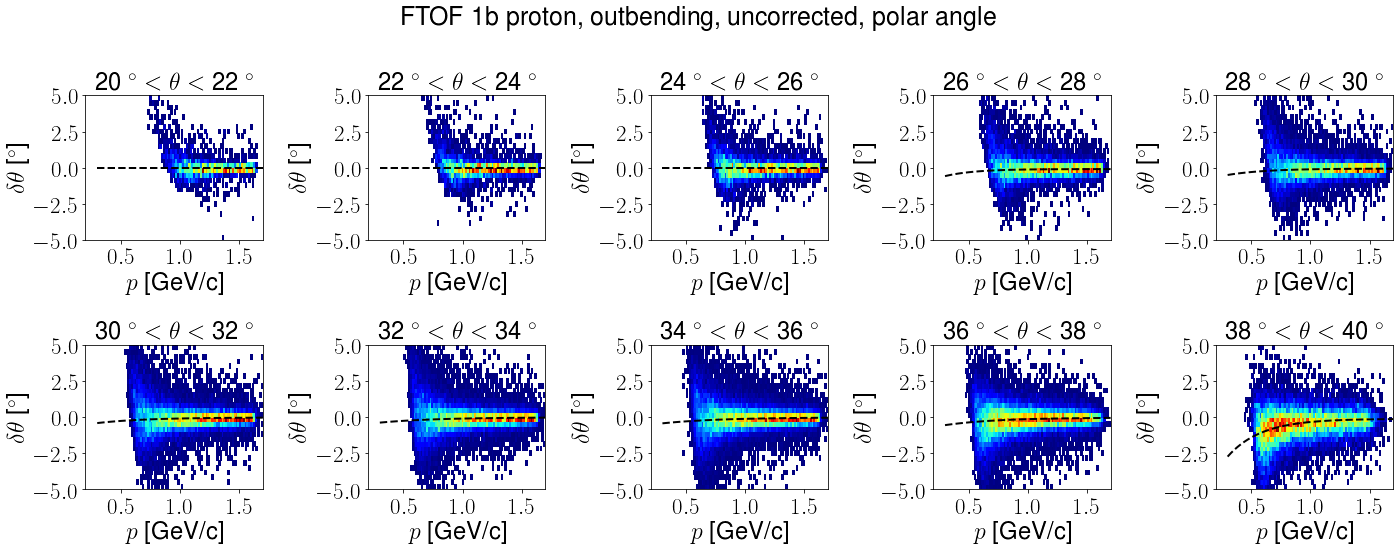

In [223]:
outbendingFD = copy(Ftof1b_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 1b proton, outbending, uncorrected, polar angle")
plt.tight_layout()

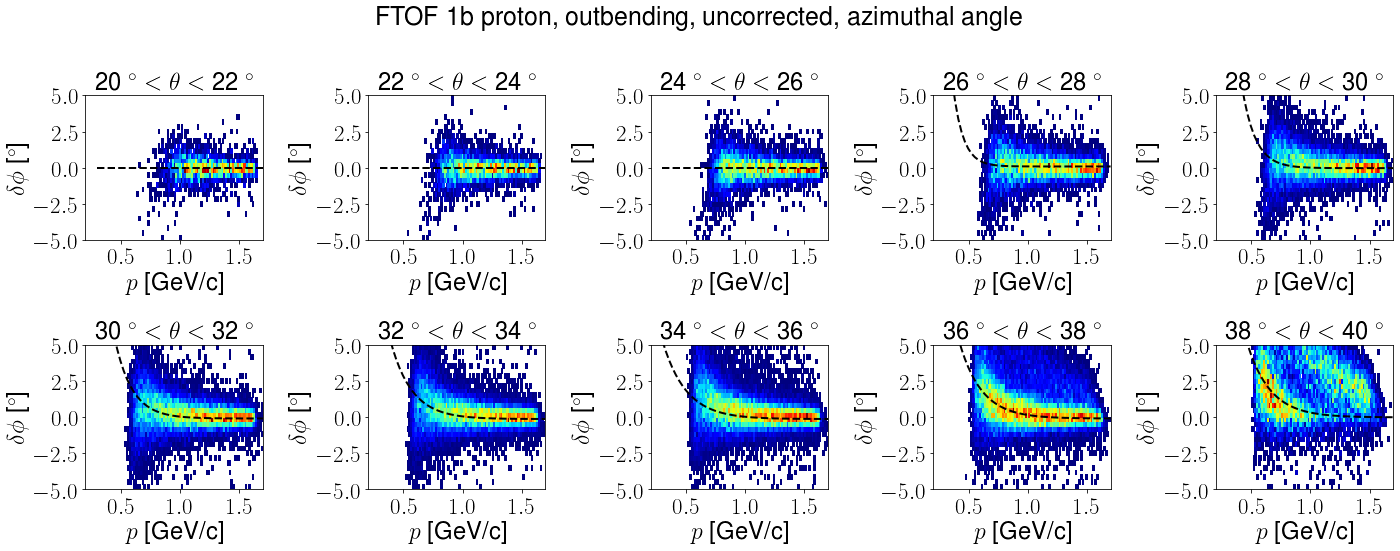

In [224]:
outbendingFD = copy(Ftof1b_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 1b proton, outbending, uncorrected, azimuthal angle")
plt.tight_layout()

### Ftof 2 

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


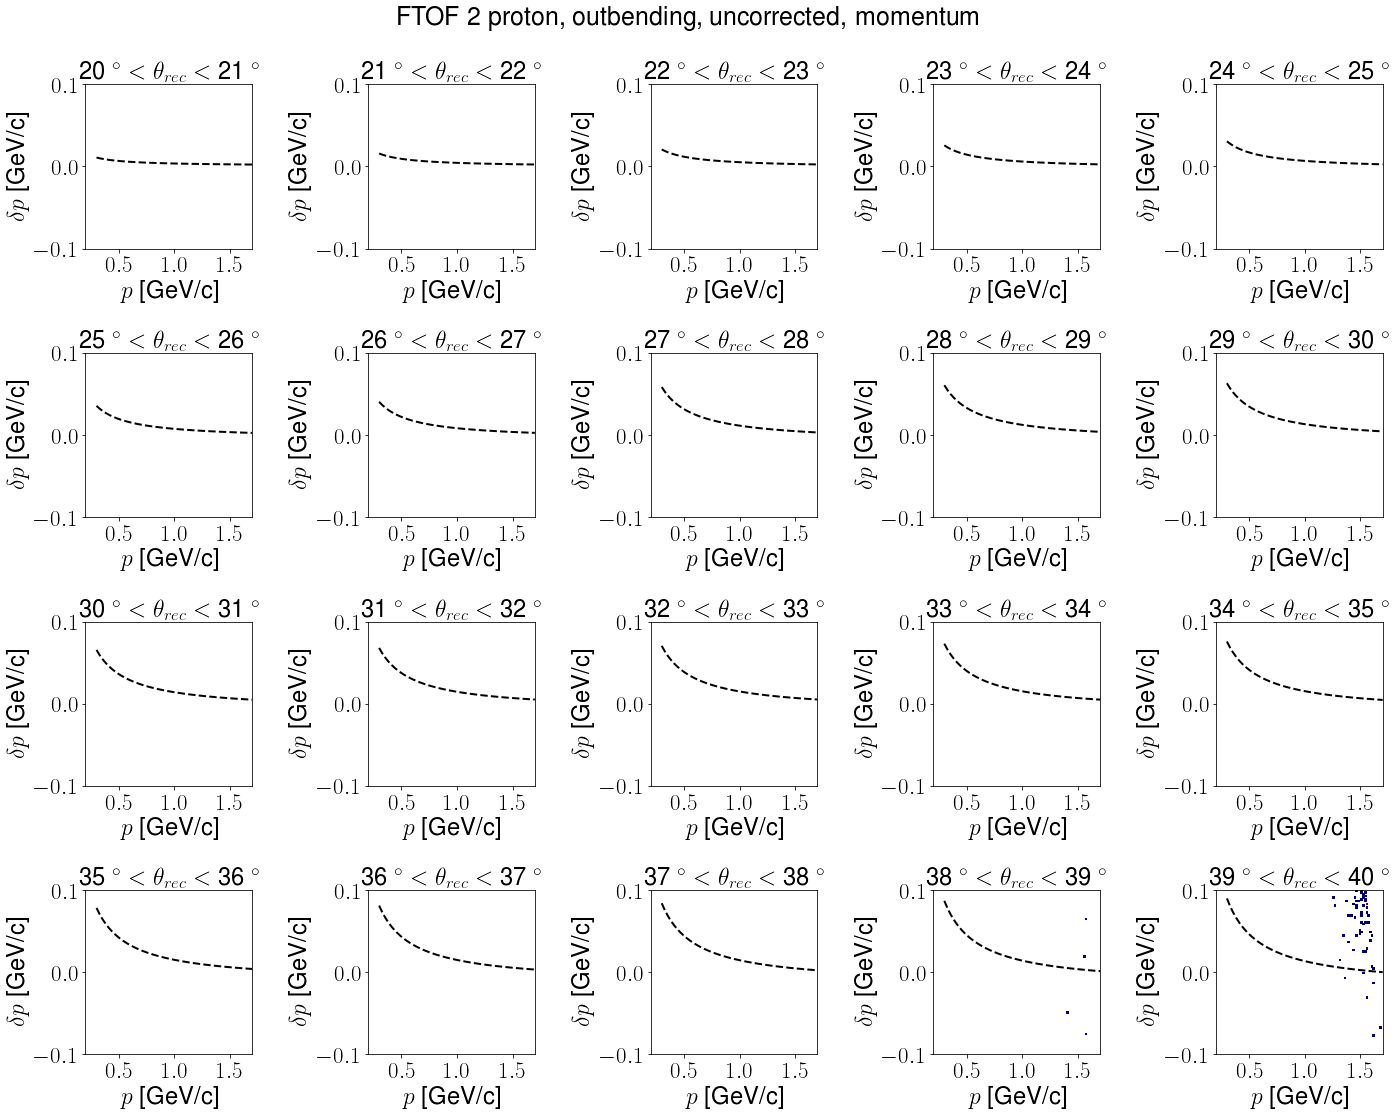

In [225]:
outbendingFD = copy(Ftof2_outb_nocorr)

theta = np.linspace(0,19,20) + 20.5
const_FD = np.select([theta<27, (theta>=27)],
              [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
coeff_FD = np.select([theta<27, (theta>=27)],
              [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 2 proton, outbending, uncorrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


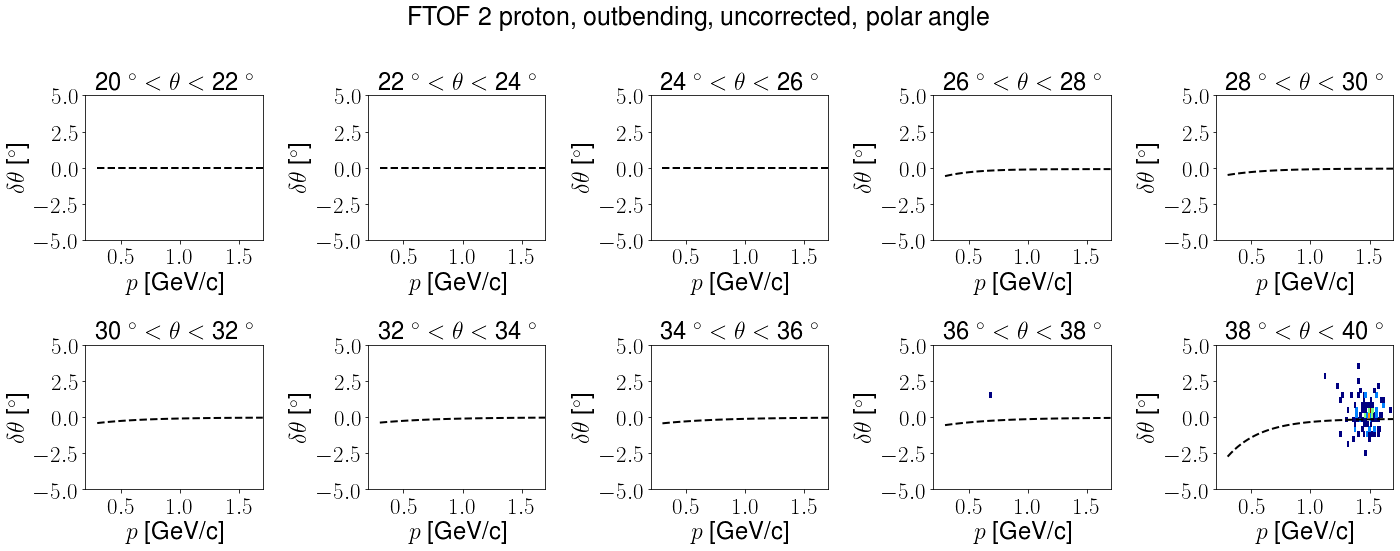

In [242]:
outbendingFD = copy(Ftof2_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 2 proton, outbending, uncorrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


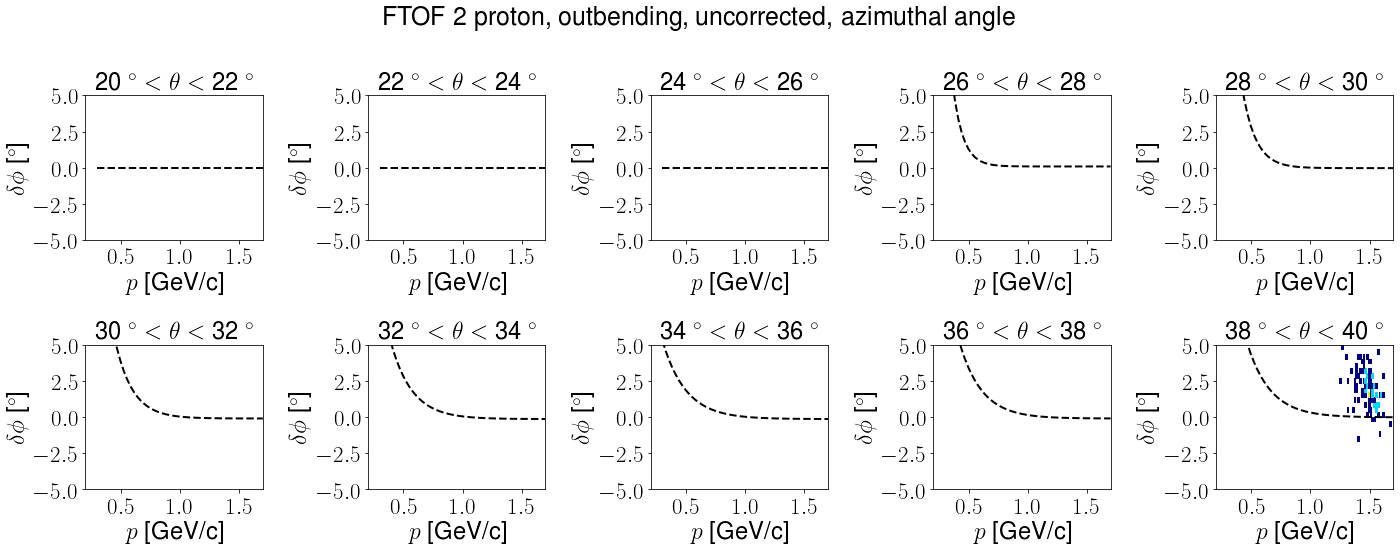

In [243]:
outbendingFD = copy(Ftof2_outb_nocorr)

theta = np.linspace(0,19,20)*2 + 21
const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
              [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 2 proton, outbending, uncorrected, azimuthal angle")
plt.tight_layout()

### Ctof

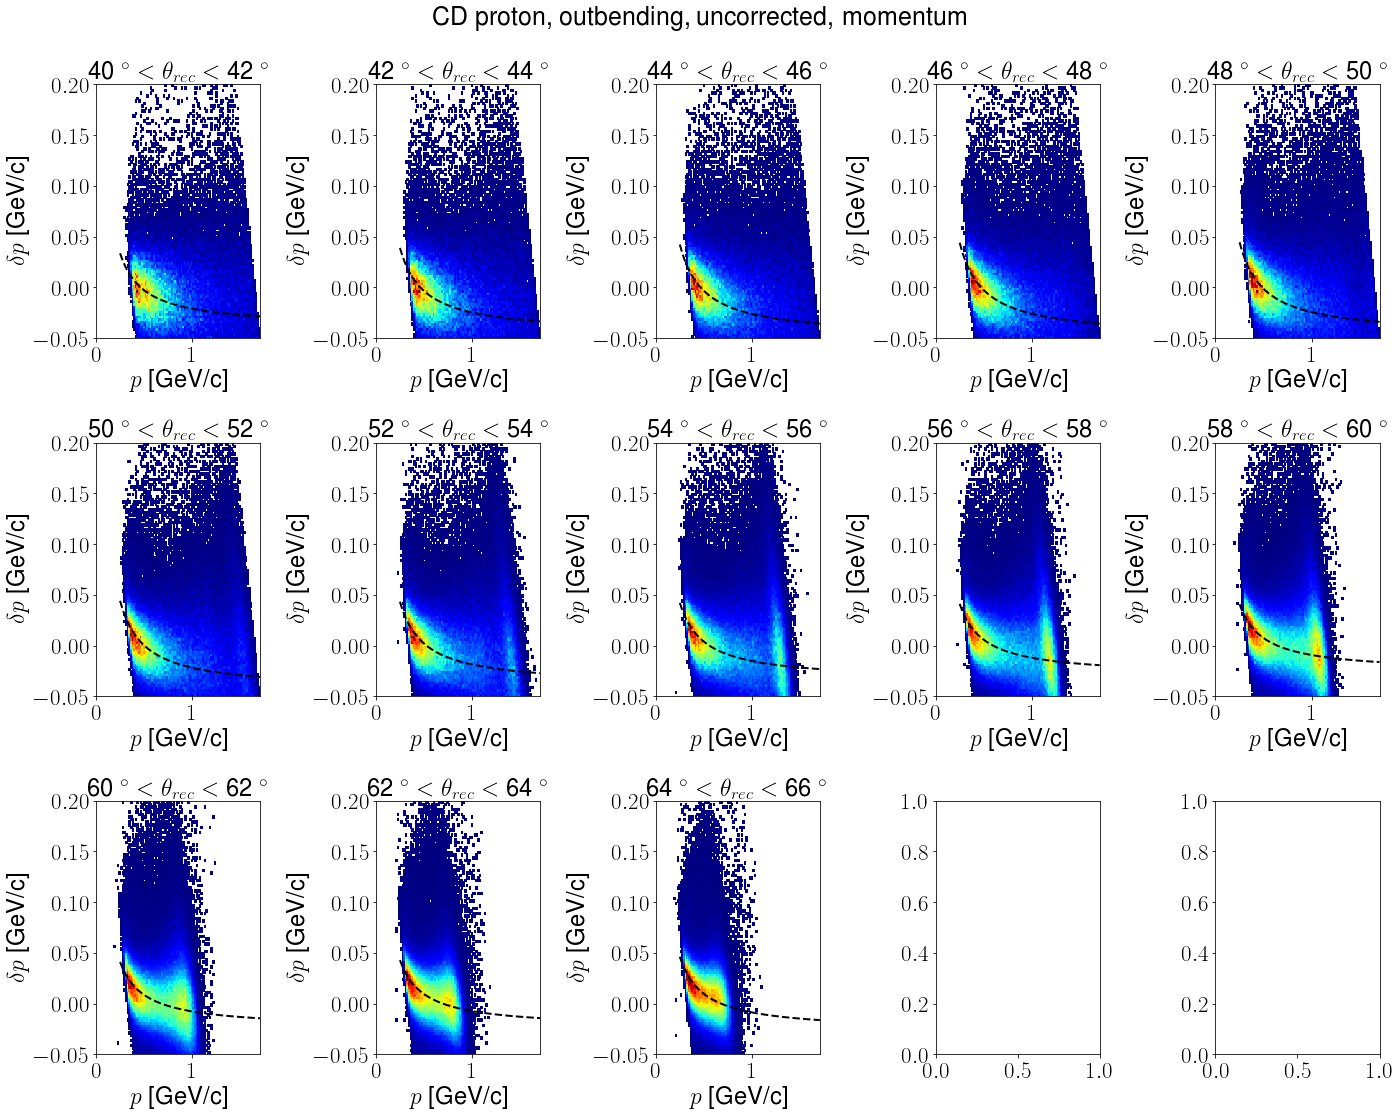

In [245]:
outbendingCD = copy(Ctof_outb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = 1.92657376 - 0.113836734*theta + 0.00215038526*theta**2 - 1.32525053 * 10**(-5)*theta**3
coeff_CD = -0.755650043 + 0.0445538936*theta - 8.38241864*10**(-4)*theta*theta + 5.16887255 * 10**(-6) * theta**3
params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
fig.suptitle("CD proton, outbending, uncorrected, momentum")
plt.tight_layout()

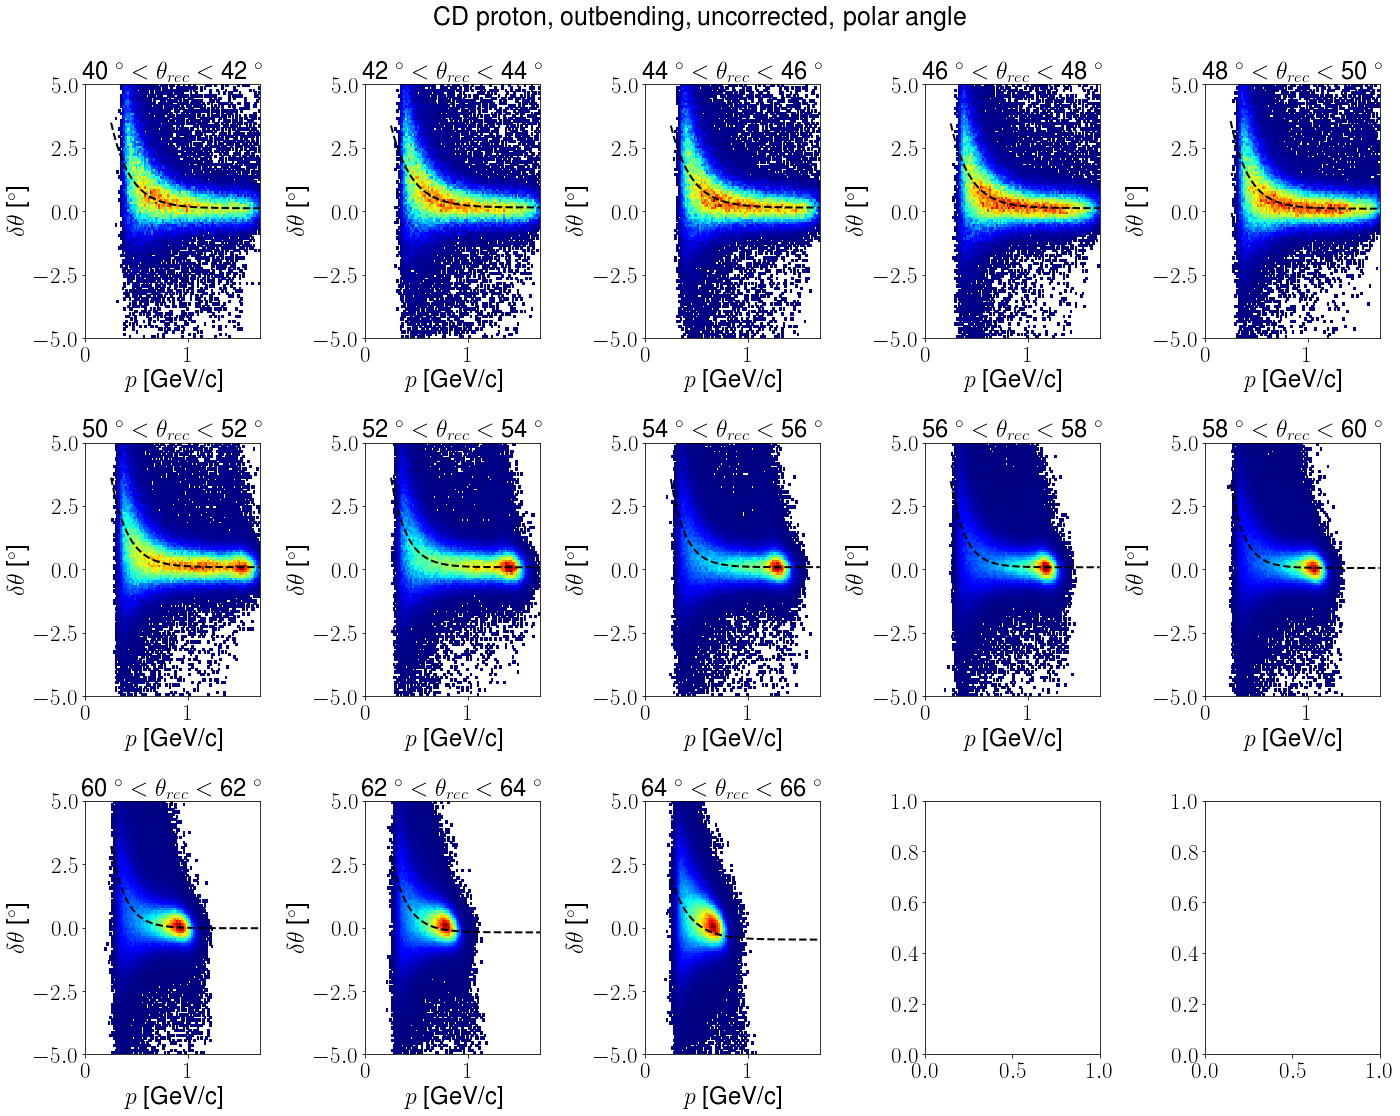

In [246]:
outbendingCD = copy(Ctof_outb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = -1.09849291*100 + 8.86664014 * theta - 0.26643881 * theta**2 + 3.53814210 * 10**(-3) * theta**3 - 1.75297107 * 10**(-5) * theta**4
coeff_CD = 9.52034523*100 -5.74808292 * 10 * theta + 1.15386949 * theta**2 - 7.57970373 * 0.001 * theta**3
coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * theta - 2.37730217*0.1 * theta**2 + 1.55153003*0.001*theta**3
params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPtheta"] - outbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, outbending, uncorrected, polar angle")
plt.tight_layout()
# plt.savefig("protonCD_inb_theta.pdf")

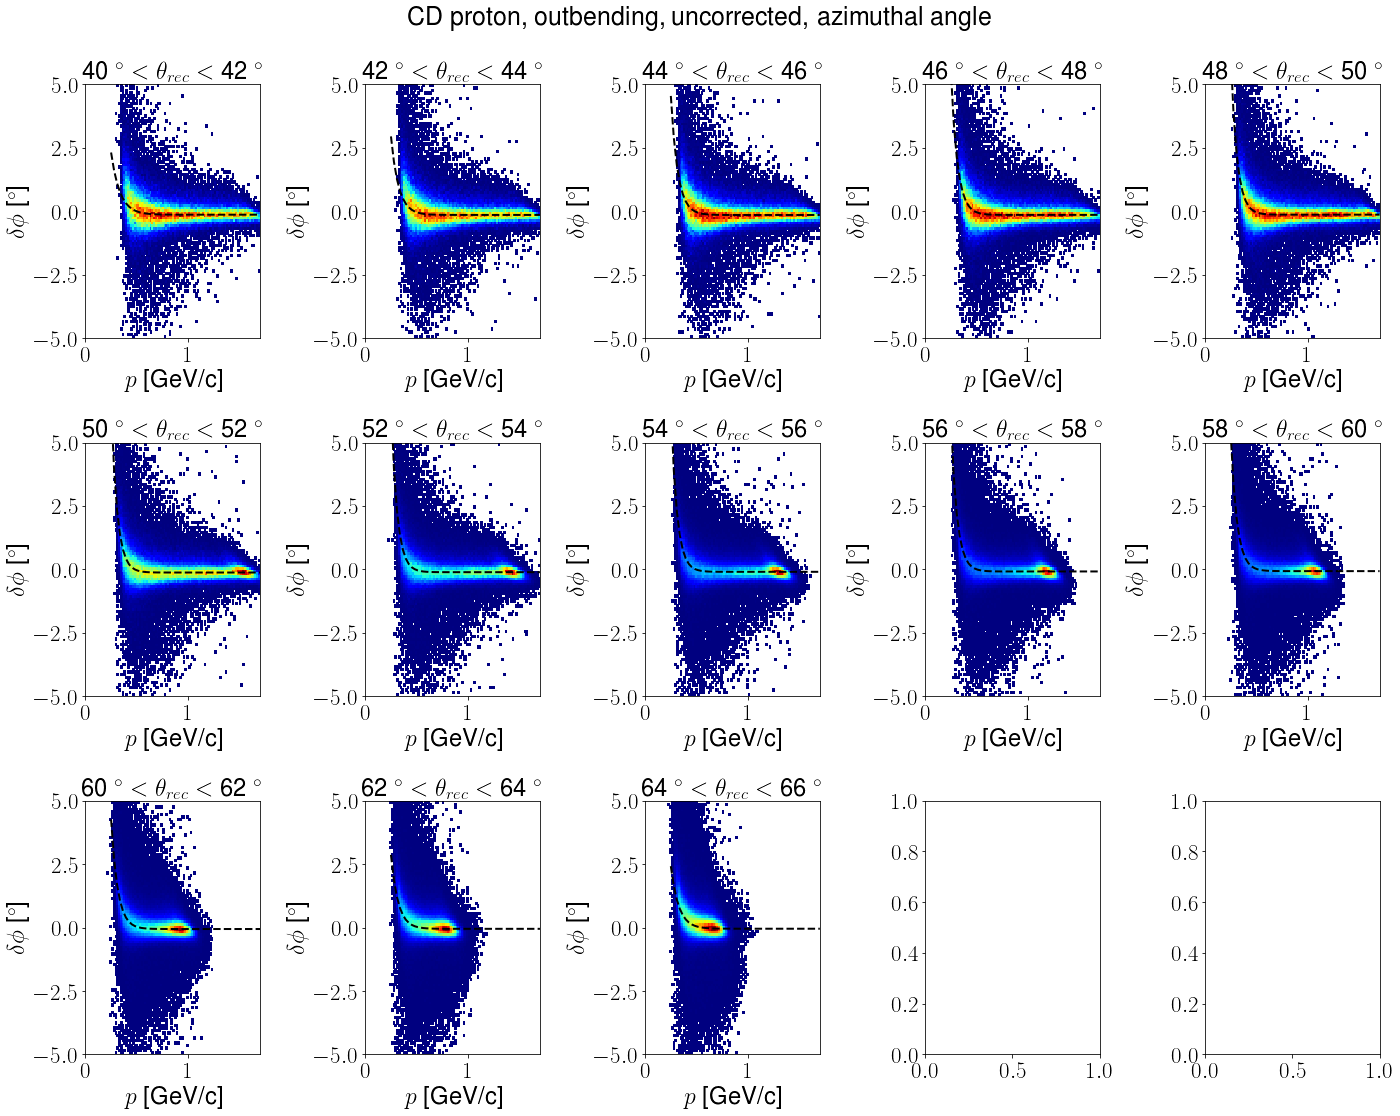

In [247]:
outbendingCD = copy(Ctof_outb_nocorr)

theta = np.linspace(0, 14, 15)*2+41
const_CD = 4.94546178 -3.26662886*0.1 * theta +  7.39069603 * 0.001 * theta**2 -6.83599356*10**(-5) * theta**3 + 2.12303103*10**(-7) * theta**4
coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * theta + 4.00923146*10**(2) * theta**2 - 5.12792347 * theta**3 + 2.41793167*10**(-2) * theta**4
coeff2_CD =  1.20477219*10**(2) -5.86630228 * theta + 7.44007875*10**(-2) * theta**2 -2.42652473*10**(-4) * theta**3
params_phi = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPphi"] - outbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, outbending, uncorrected, azimuthal angle")
plt.tight_layout()

# With correction

## inbending
### Ftof 1a

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


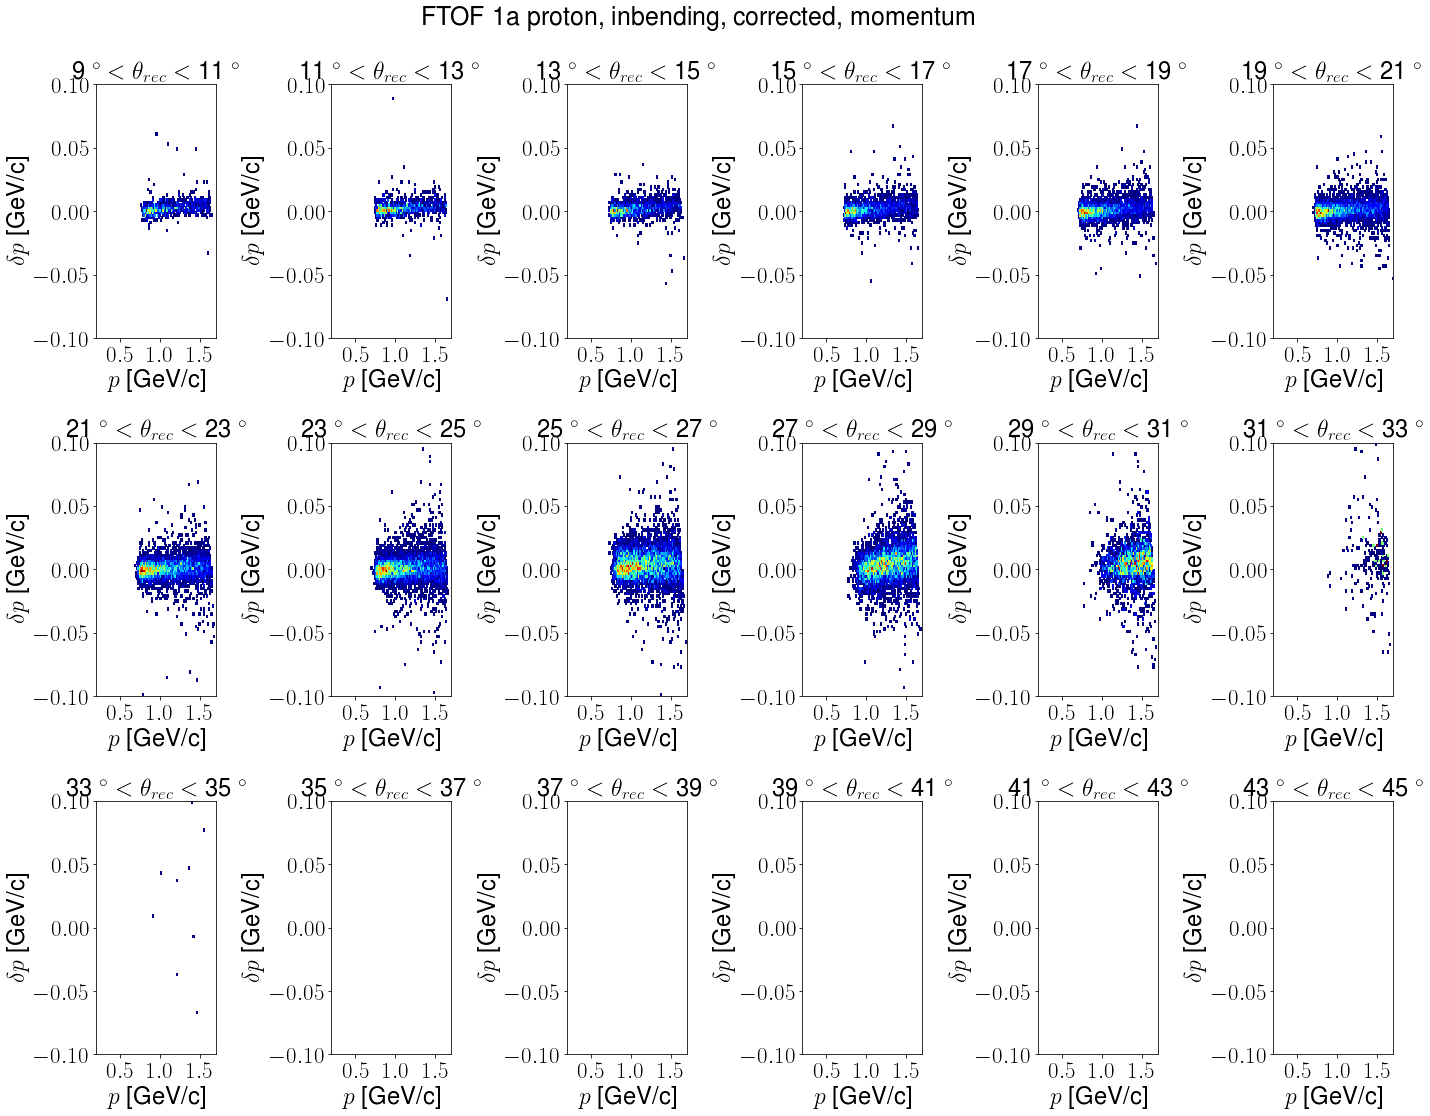

In [248]:
inbendingFD = copy(Ftof1a_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 1a proton, inbending, corrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


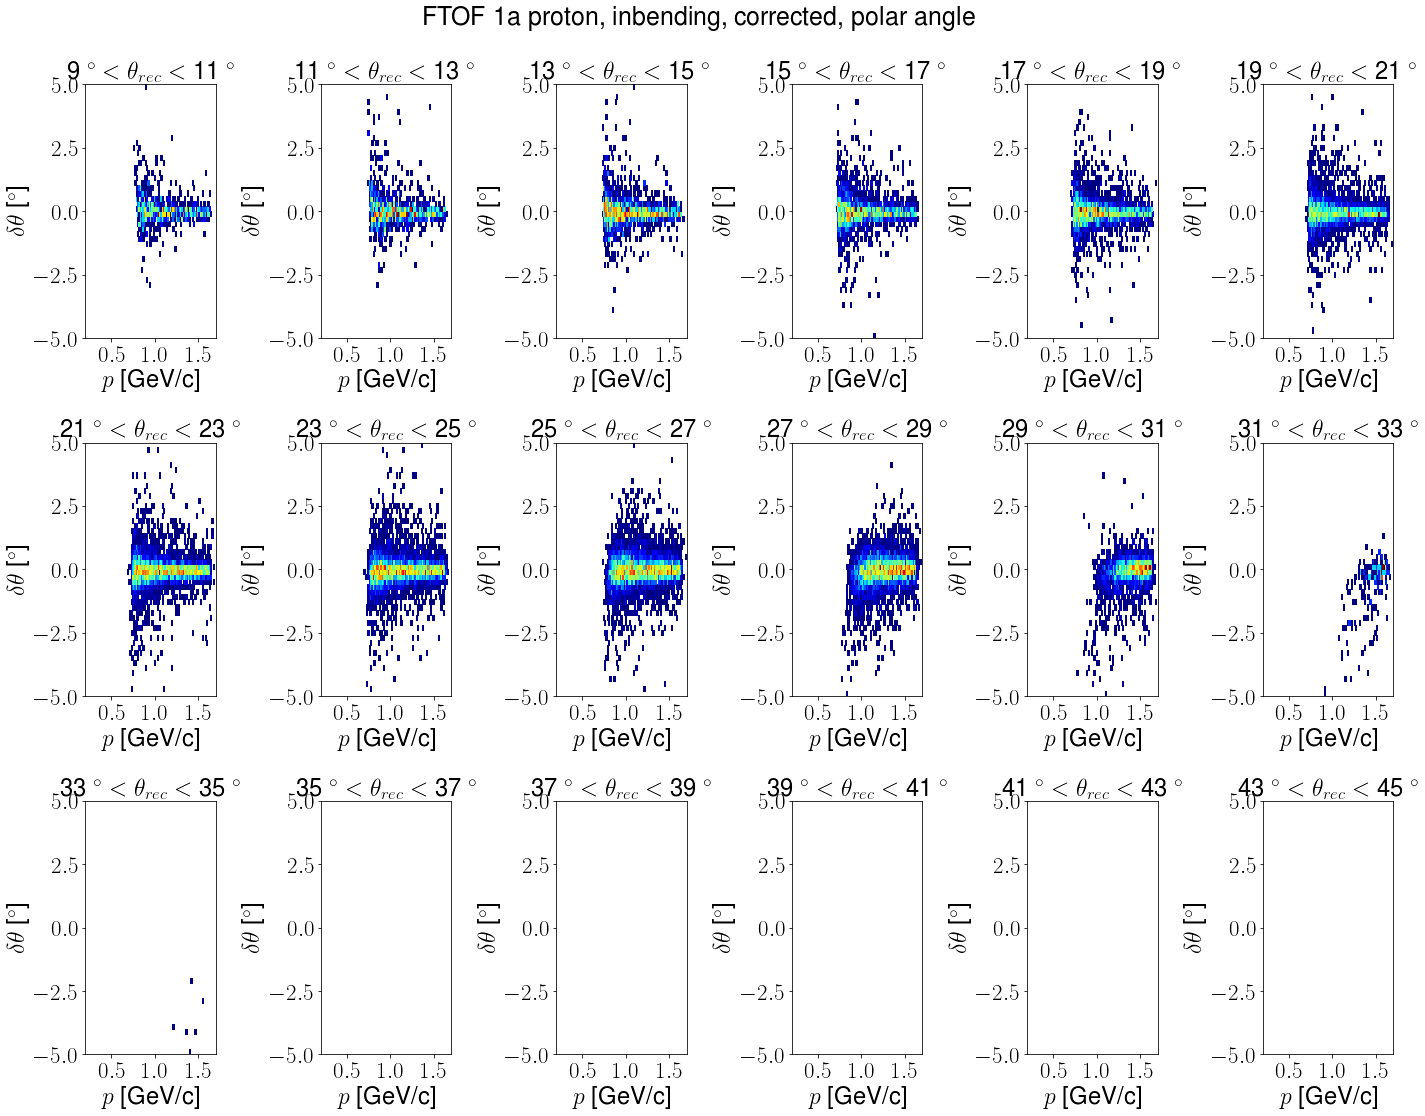

In [249]:
inbendingFD = copy(Ftof1a_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
# coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
# coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1a proton, inbending, corrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


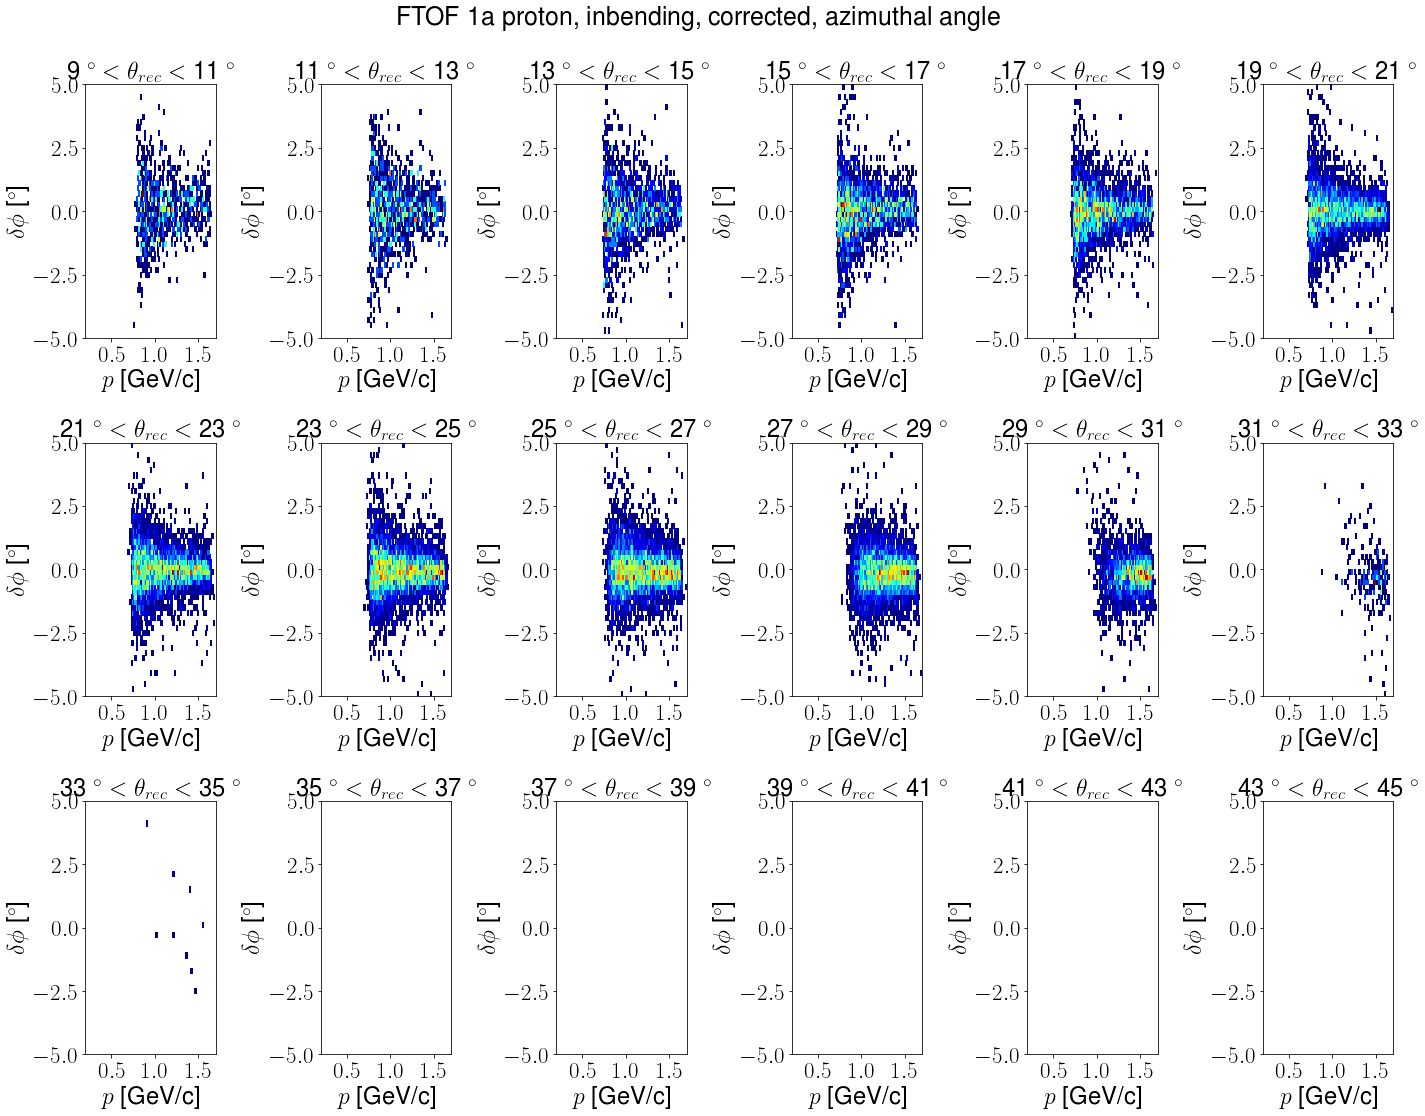

In [255]:
inbendingFD = copy(Ftof1a_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
# coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
# coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
fig.suptitle("FTOF 1a proton, inbending, corrected, azimuthal angle")
plt.tight_layout()

### Ftof 1b

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


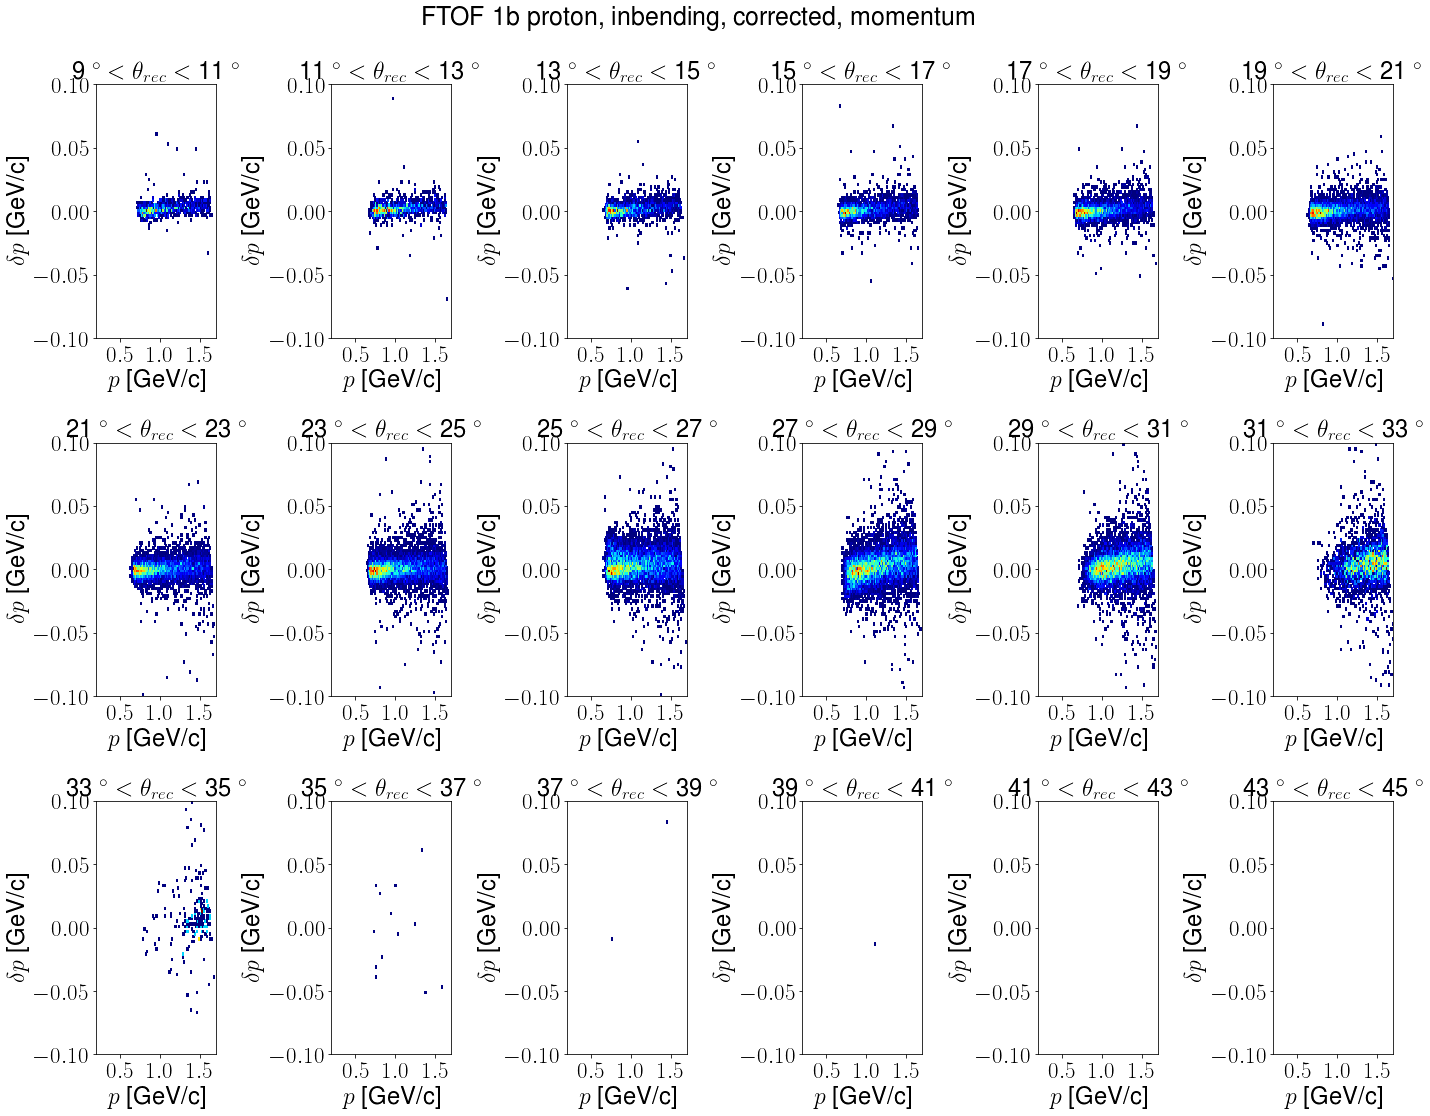

In [256]:
inbendingFD = copy(Ftof1b_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 1b proton, inbending, corrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


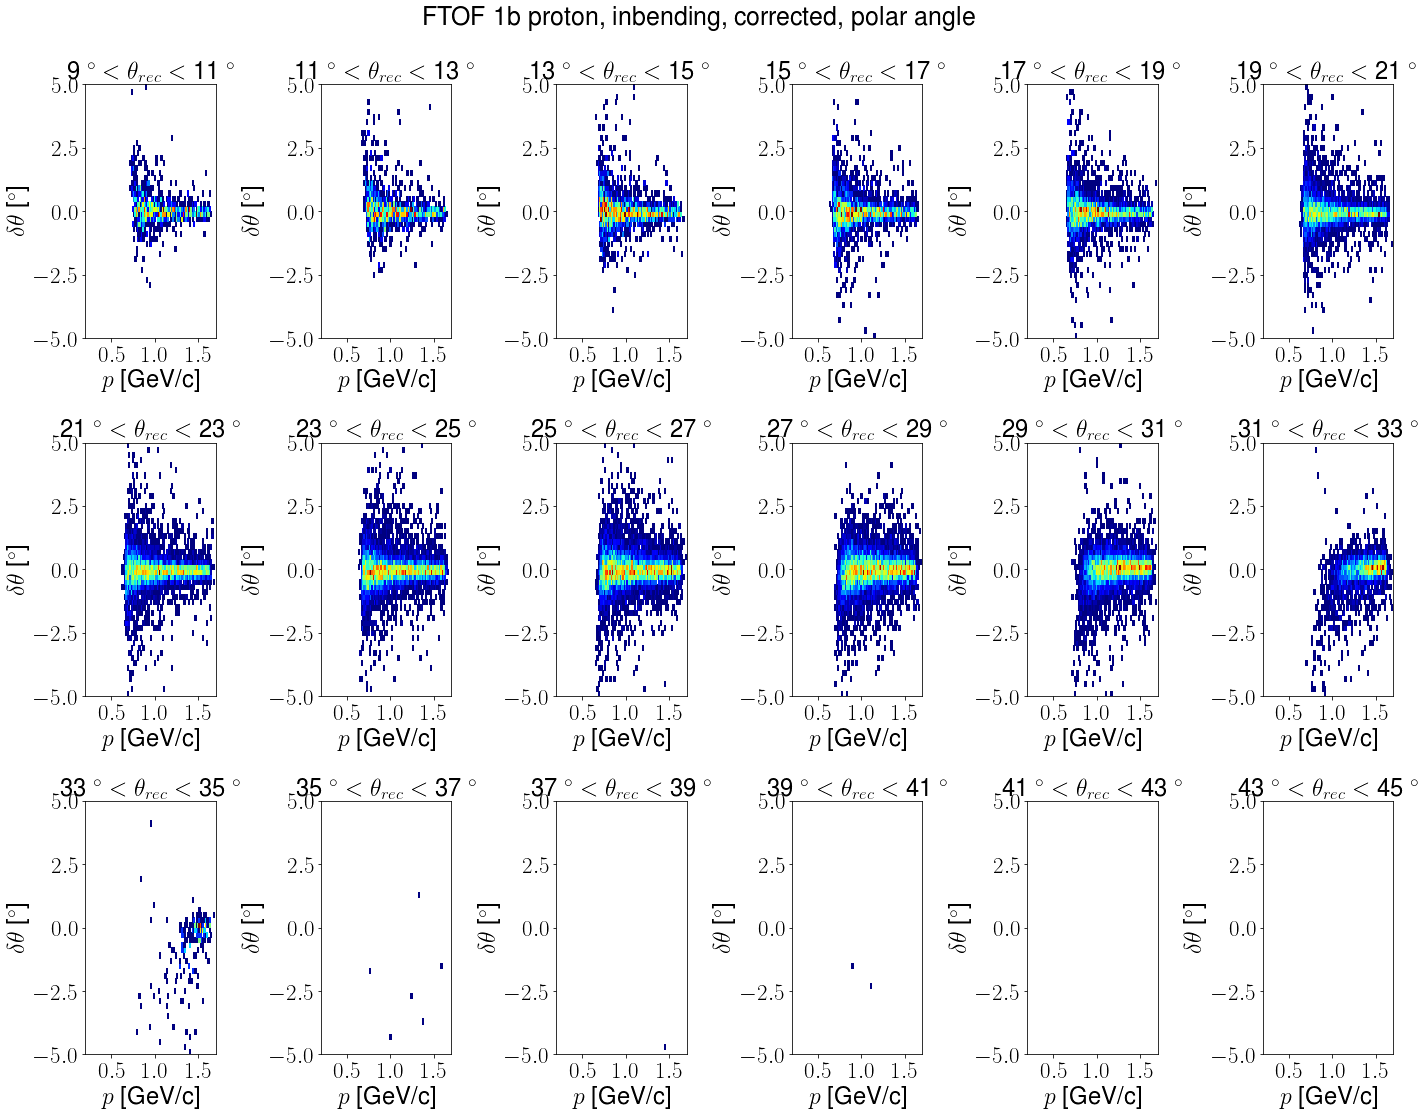

In [257]:
inbendingFD = copy(Ftof1b_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
# coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
# coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1b proton, inbending, corrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


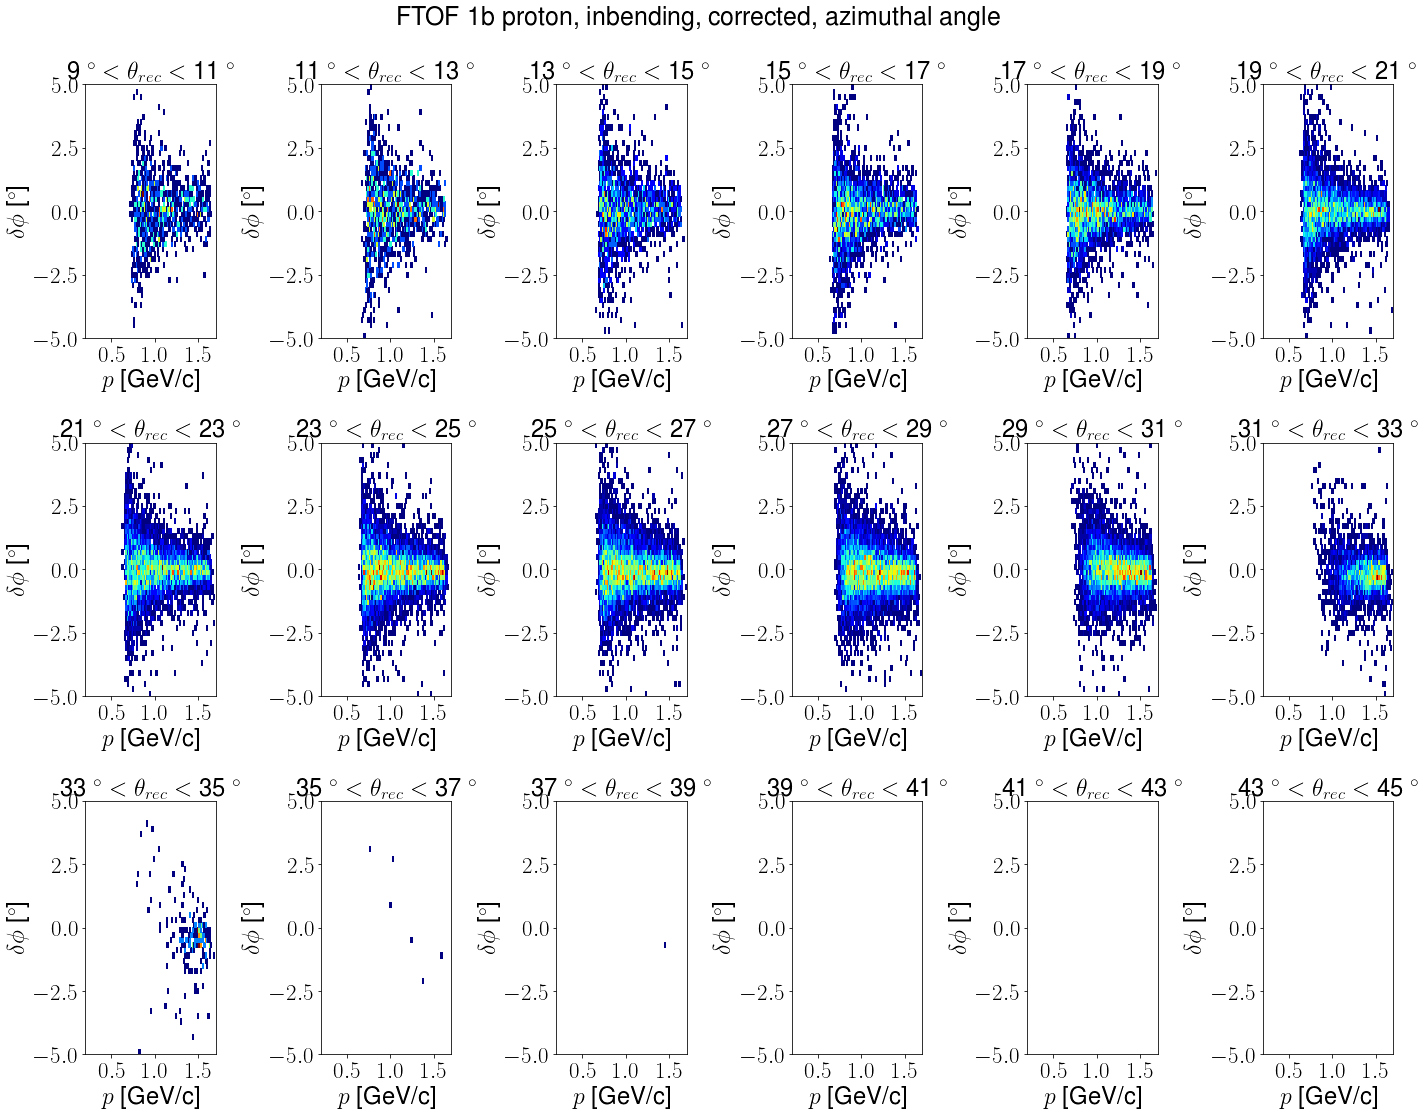

In [258]:
inbendingFD = copy(Ftof1b_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
# coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
# coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 1b proton, inbending, corrected, azimuthal angle")
plt.tight_layout()

### Ftof 2

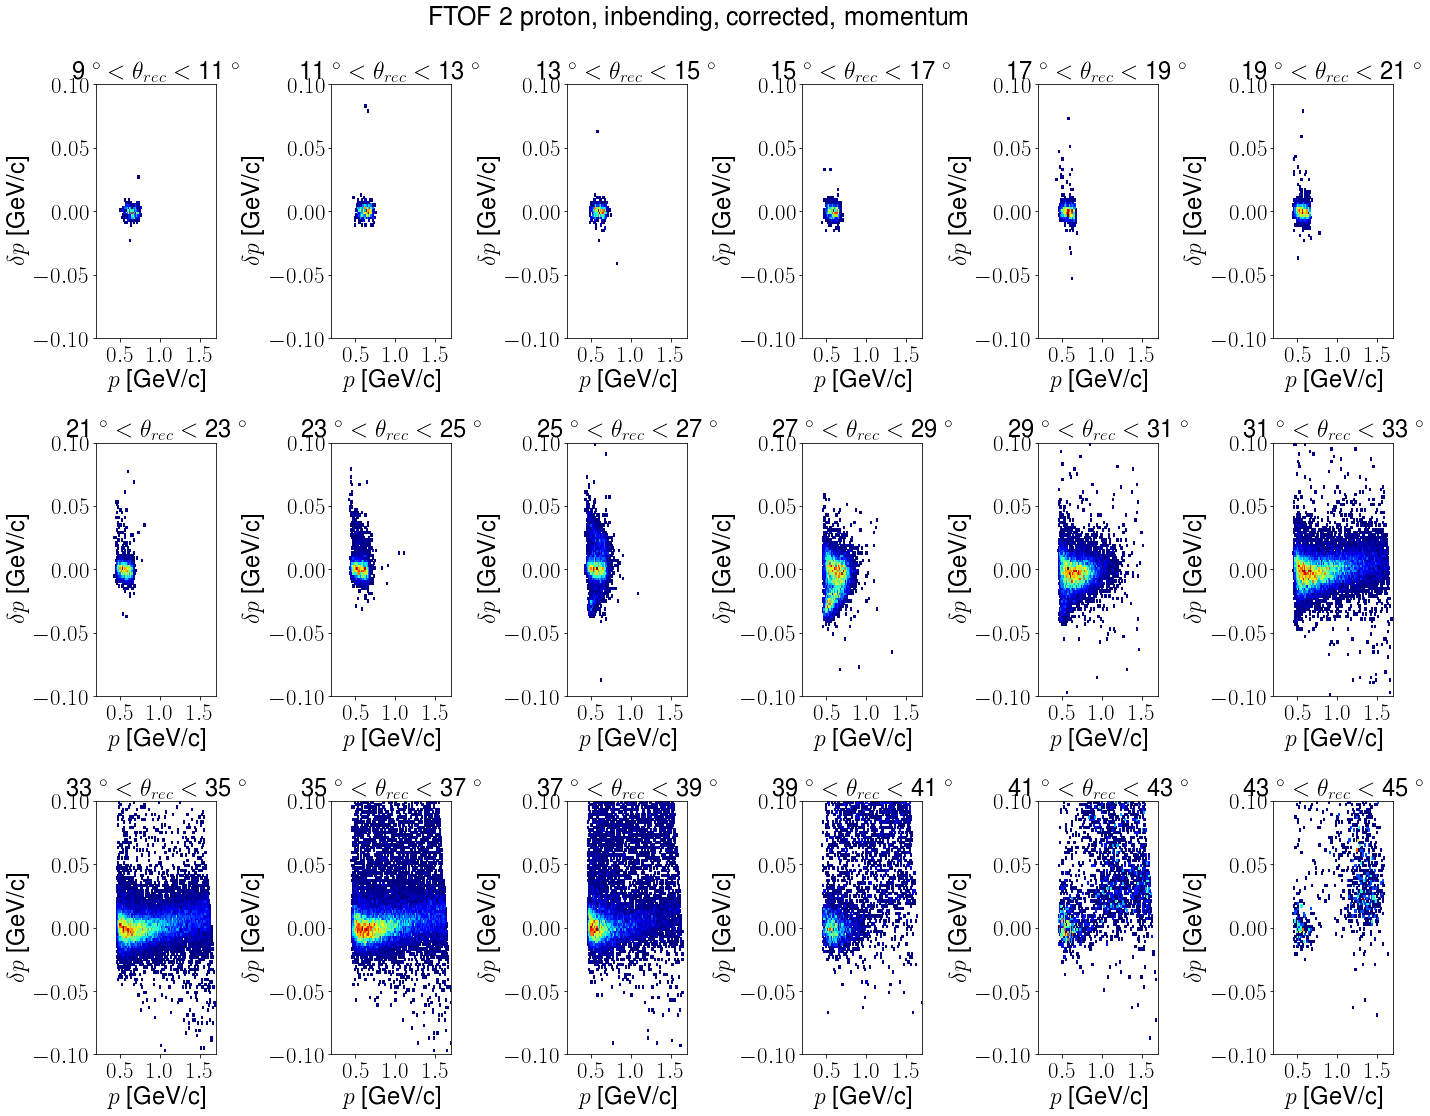

In [259]:
inbendingFD = copy(Ftof2_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [-0.0123049 + 0.00028887*theta, -0.138227479 + 8.07557430*0.001*theta -1.34807927*0.0001*theta*theta, -0.0275235])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<42), theta>=42],
#                   [0.01528006 - 0.00024079*theta, 5.65817597*0.01 -2.36903348*0.001*theta + 4.93780046*0.00001*theta*theta, 0.03998975])
# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPp"] - inbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
fig.suptitle("FTOF 2 proton, inbending, corrected, momentum")
plt.tight_layout()

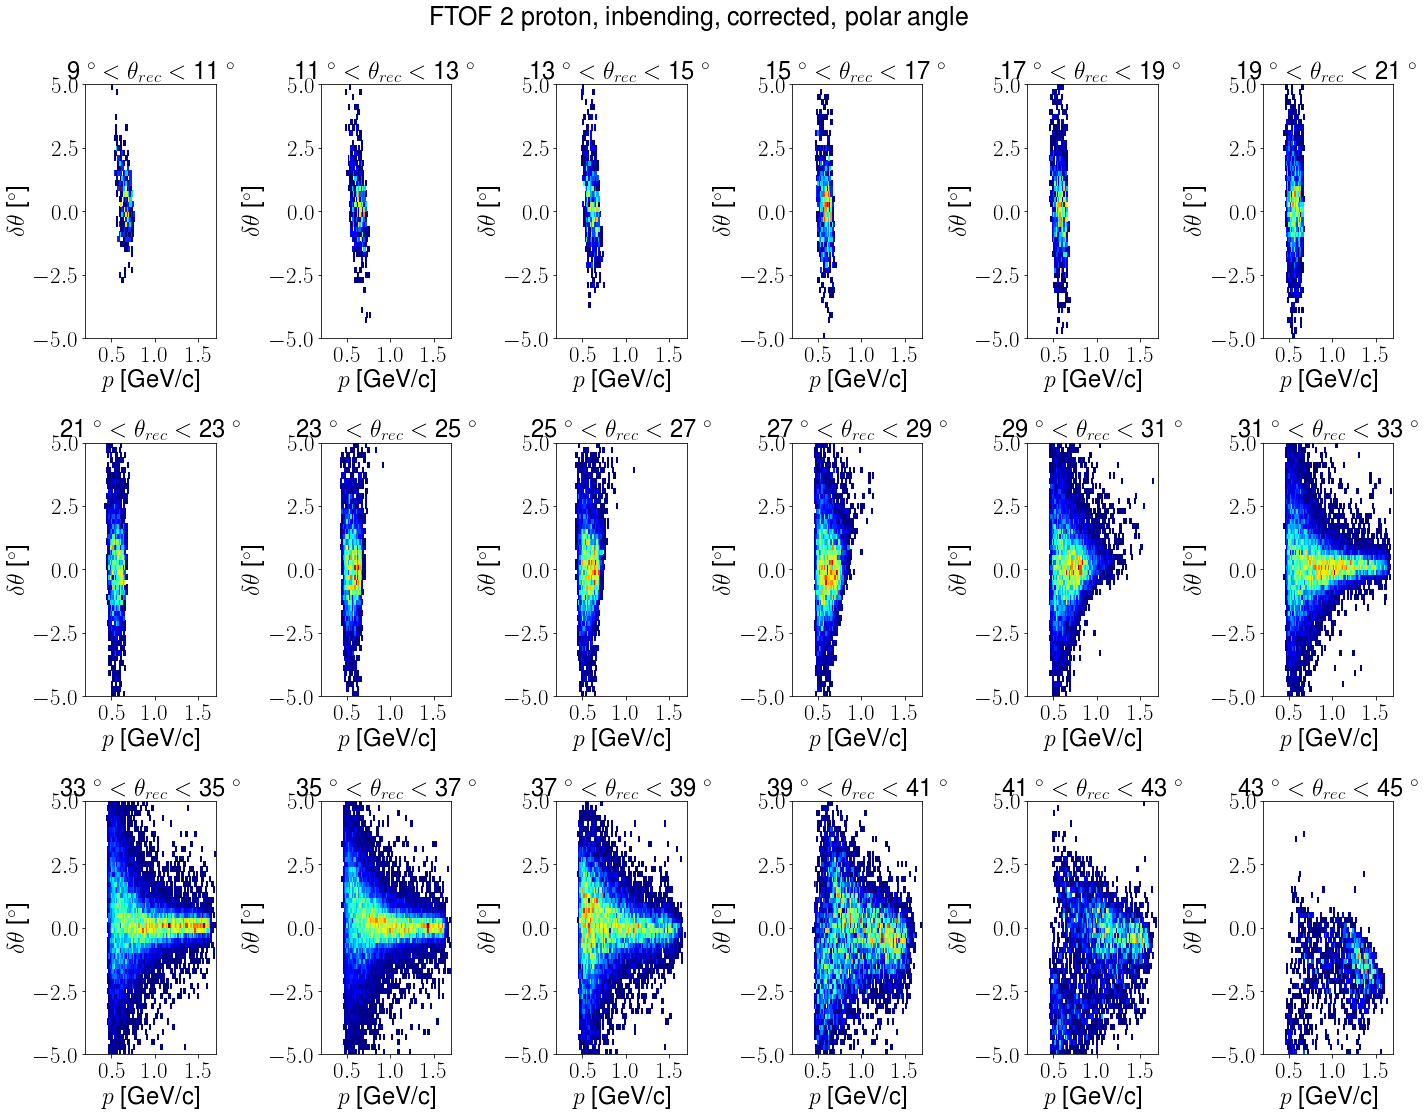

In [260]:
inbendingFD = copy(Ftof2_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [2.63643690*0.01, 0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 6.91308654 - 0.439839300*theta +6.83075548*0.001*theta*theta, 1.59424606, 1.47198581*10])
# coeff_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-1.46440415, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 682.909471 - 43.9551177 * theta + 0.682383790 * theta * theta, -8.19627119, -23.55701865])    
# coeff2_FD = np.select([theta<19.5, (theta>=19.5) & (theta<27), (theta>=27) & (theta<39), (theta>=39) & (theta<42), theta>=42],
#               [-3.47690993, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta, 100.33995753 - 6.96600416*theta + 0.11223046*theta*theta, -1.25261927, -0.40113733])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPtheta"] - inbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 2 proton, inbending, corrected, polar angle")
plt.tight_layout()

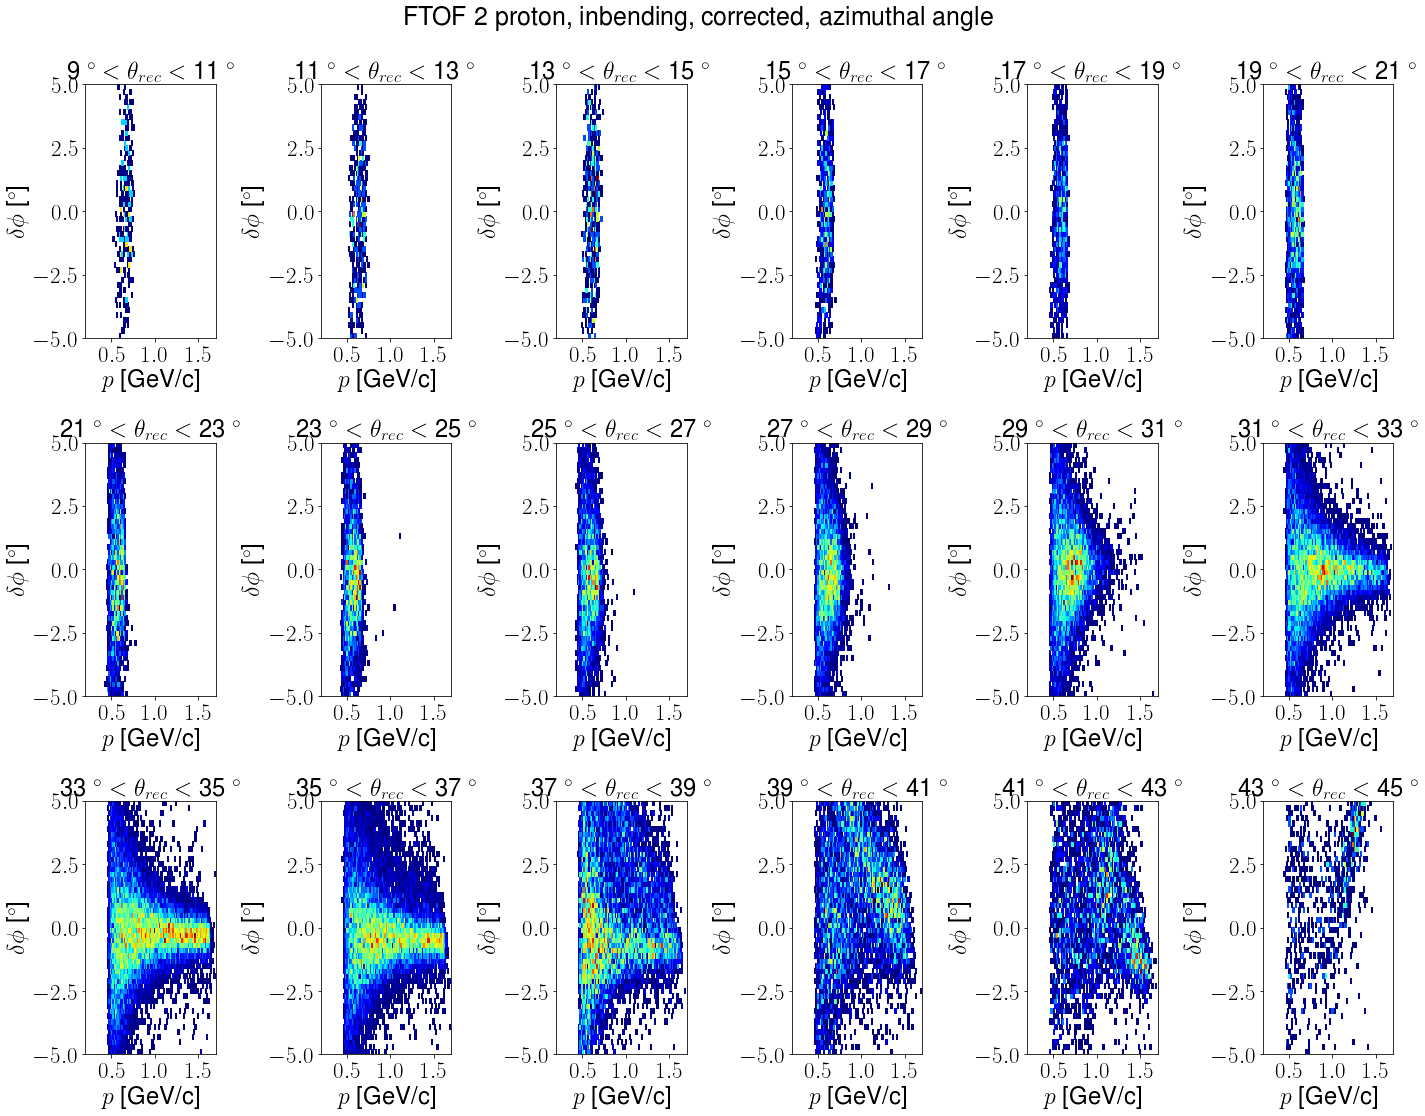

In [262]:
inbendingFD = copy(Ftof2_inb_corr)

theta = np.linspace(0, 17,18)*2 + 10
# const_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-0.190662844, -0.20725736 -0.00675627 *theta + 0.0007863*theta*theta, 12.1881698 - 0.78906294*theta +0.01297898*theta*theta, -4.59743066*10])
# coeff_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [6.48745941, 142.96379788  -16.66339055*theta + 0.51311212*theta*theta, 2.1853046 + 5.78521226 * theta - 0.09727796 * theta * theta, 7.46969457*10])    
# coeff2_FD = np.select([theta<16.5, (theta>=16.5) & (theta<27), (theta>=27) & (theta<42), theta>=42],
#                   [-3.14646608, 17.39529095 -1.78403359*theta + 0.0335692*theta*theta, -1.03655317*10 + 0.161333213*theta -1.29625675*0.001*theta*theta, -4.41246899*0.1])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(3,6, figsize=(20,16))
for row in range(3):
    for col in range(6):
        ind =col+6*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingFD.Ptheta >= ind*2 + 9) & (inbendingFD.Ptheta < ind*2+ 2 + 9)
        axs[row, col].hist2d(inbendingFD.loc[thetaCond, "Pp"], inbendingFD.loc[thetaCond, "GenPphi"] - inbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 51)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind*2 + 9)+" "+degree + r" $<\theta_{rec}<$ " + str(ind*2+2+9)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("FTOF 2 proton, inbending, corrected, azimuthal angle")
plt.tight_layout()

### Ctof

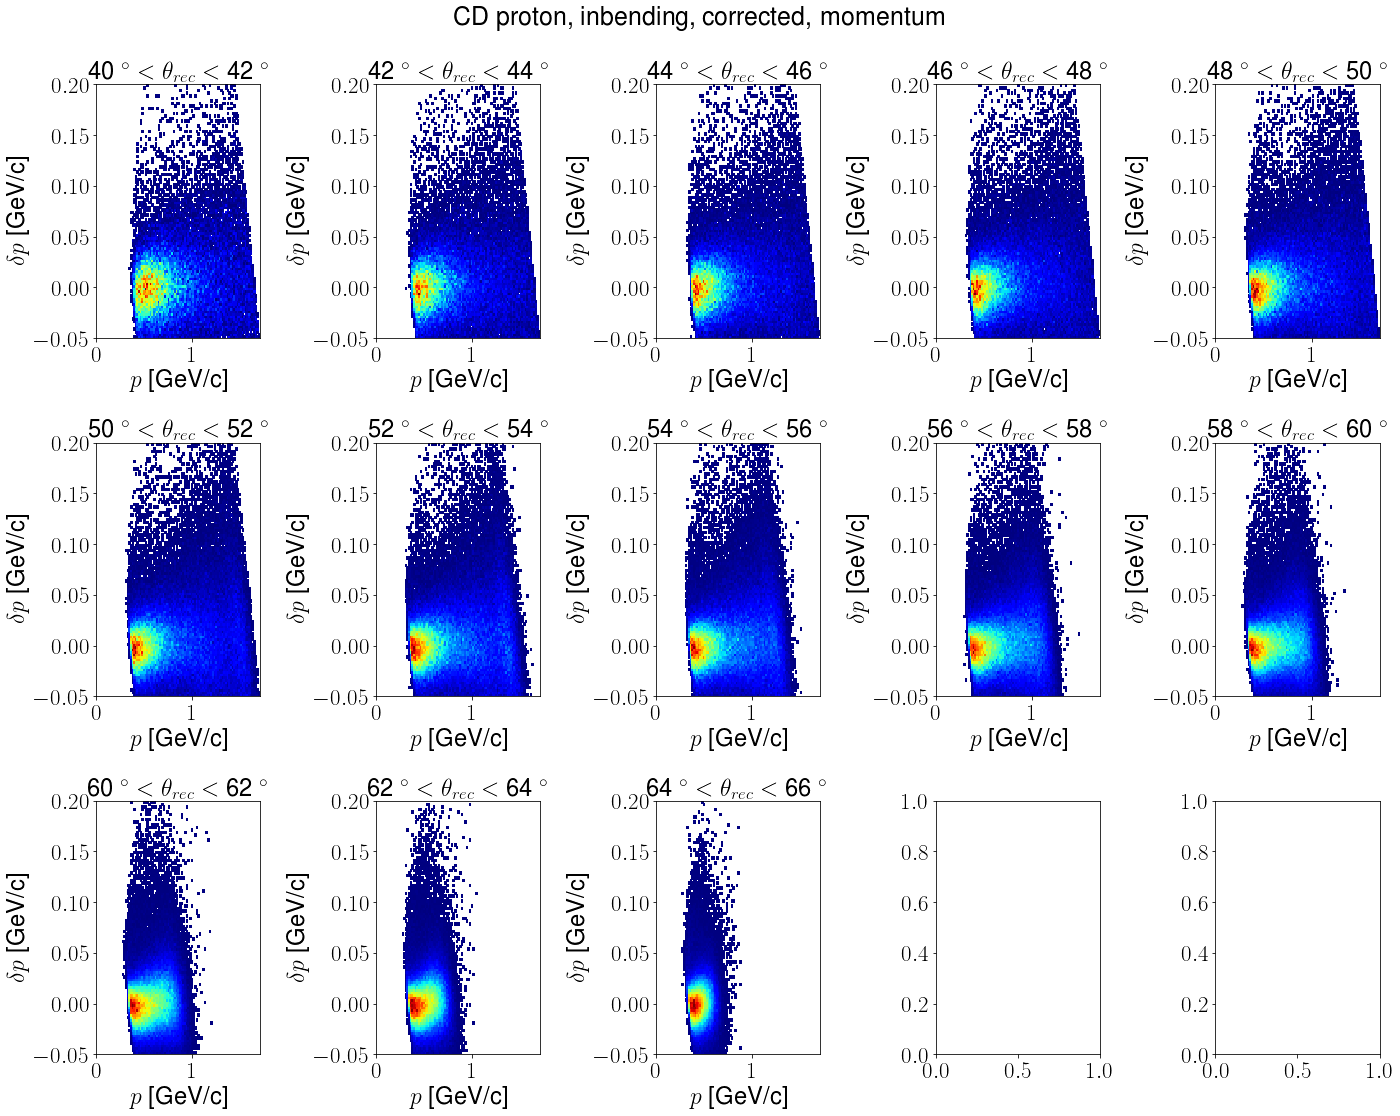

In [263]:
inbendingCD = copy(Ctof_inb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = 1.93686914 - 0.116288824*theta + 0.00223685833*theta**2 - 1.40771969 * 10**(-5)*theta**3
# coeff_CD = -0.738047800 + 0.0443343685*theta - 8.50985972*10**(-4)*theta*theta + 5.36810280 * 10**(-6) * theta**3
# params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
fig.suptitle("CD proton, inbending, corrected, momentum")
plt.tight_layout()

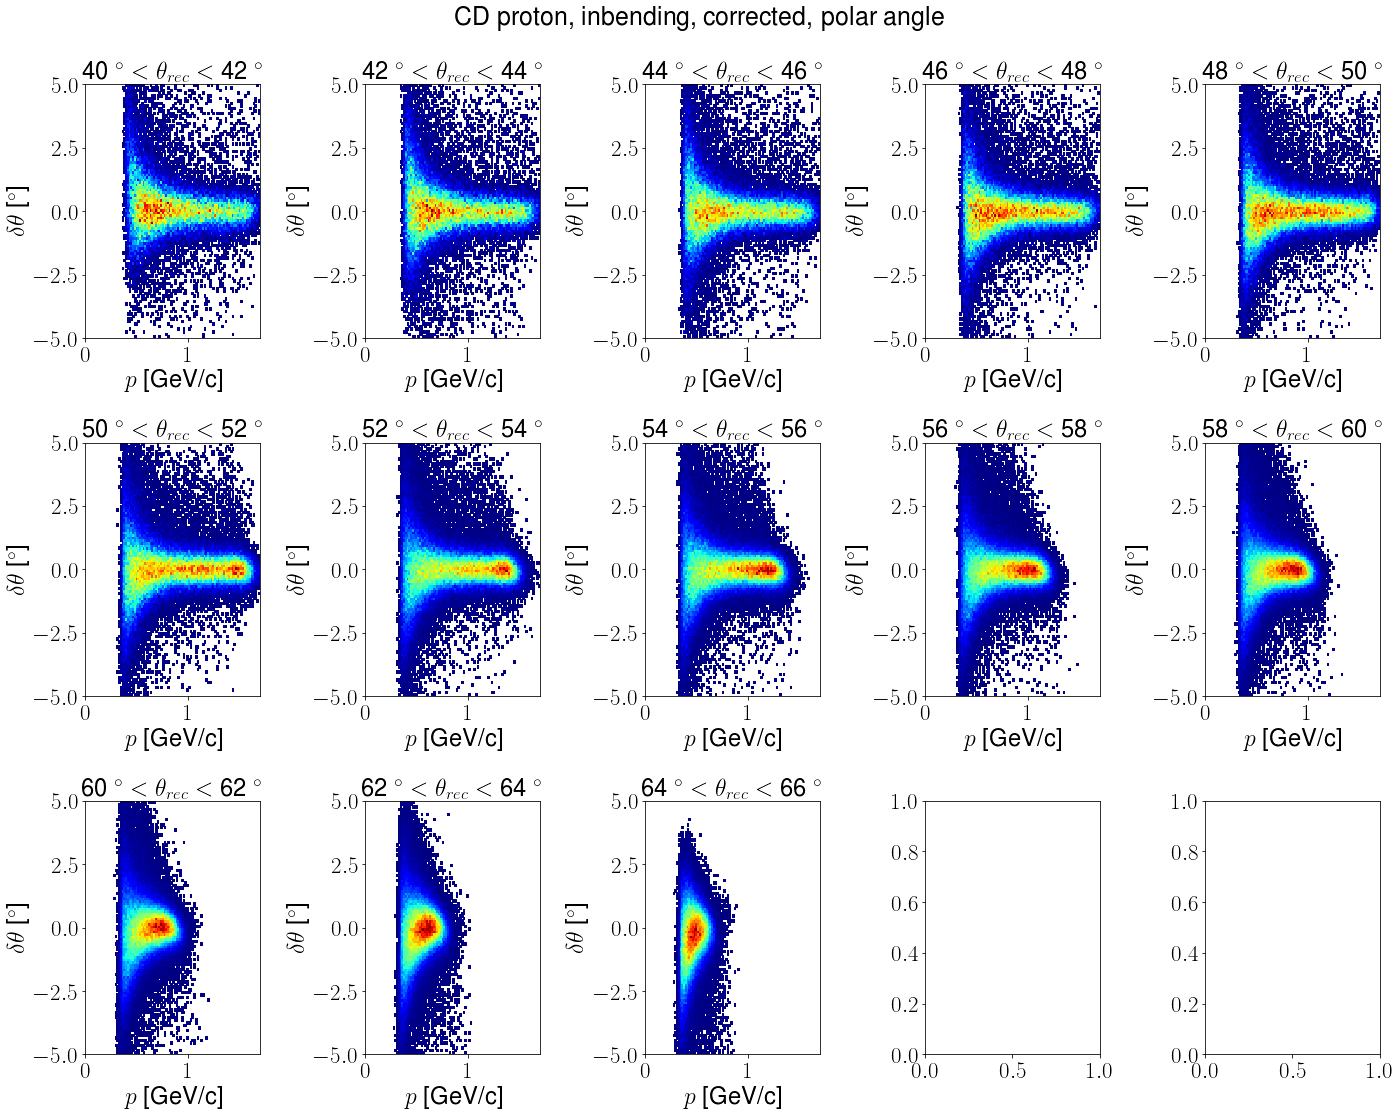

In [264]:
inbendingCD = copy(Ctof_inb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = -1.09849291*100 + 8.86664014 * theta - 0.26643881 * theta**2 + 3.53814210 * 10**(-3) * theta**3 - 1.75297107 * 10**(-5) * theta**4
# coeff_CD = 9.52034523*100 -5.74808292 * 10 * theta + 1.15386949 * theta**2 - 7.57970373 * 0.001 * theta**3
# coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * theta - 2.37730217*0.1 * theta**2 + 1.55153003*0.001*theta**3
# params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPtheta"] - inbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, inbending, corrected, polar angle")
plt.tight_layout()
# plt.savefig("protonCD_inb_theta.pdf")

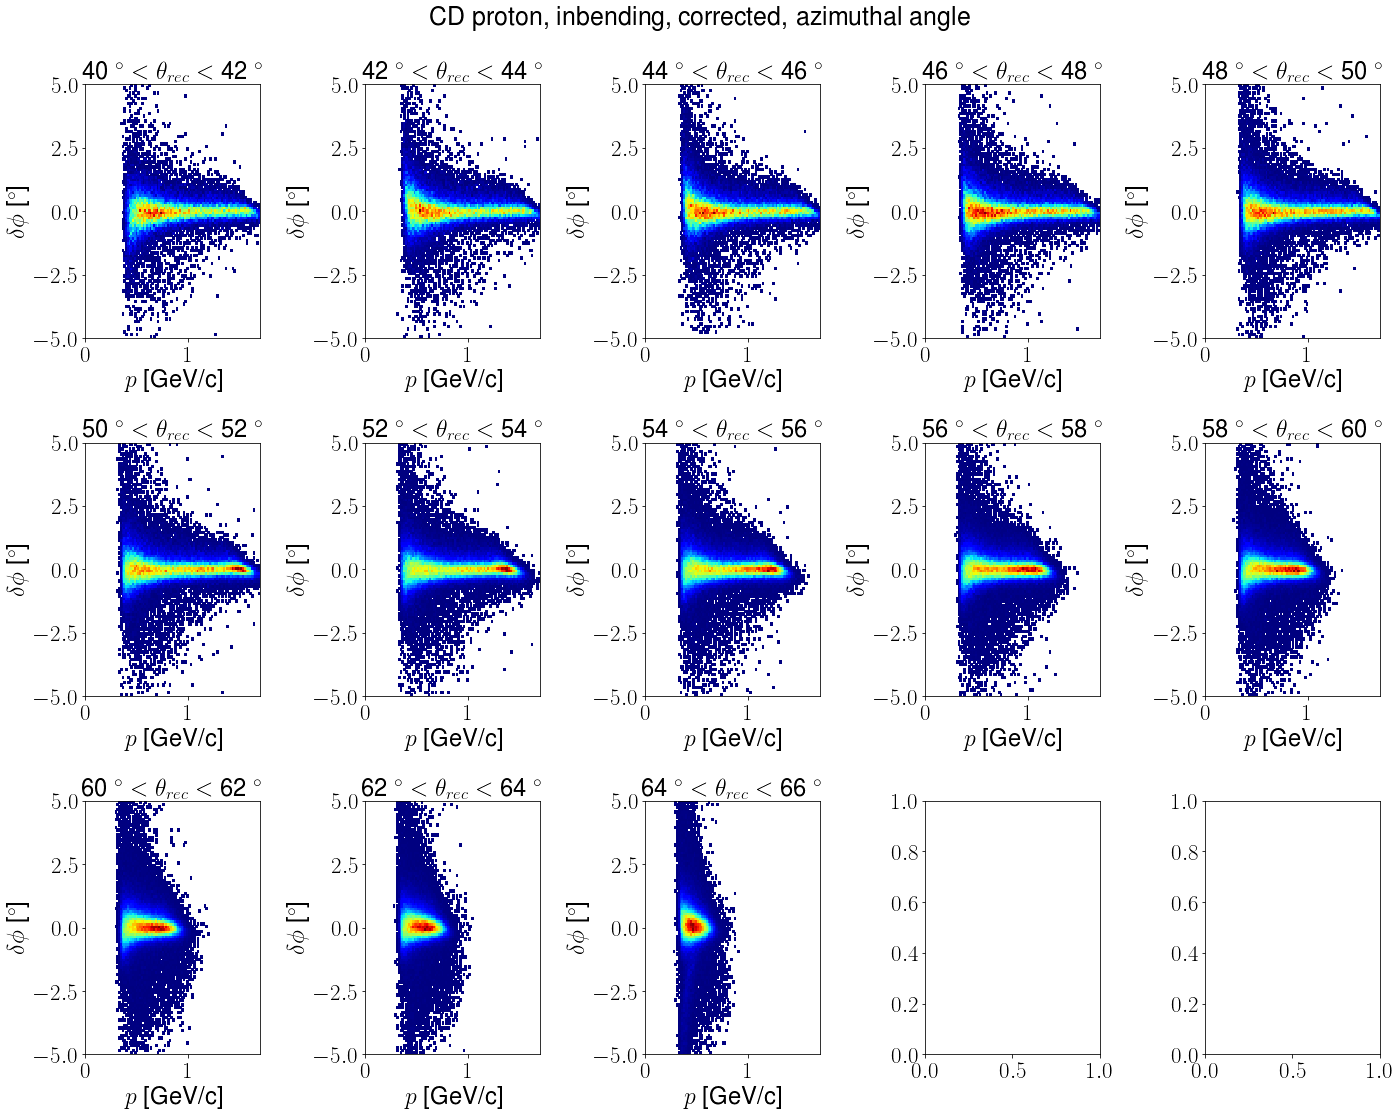

In [266]:
inbendingCD = copy(Ctof_inb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = 4.94546178 -3.26662886*0.1 * theta +  7.39069603 * 0.001 * theta**2 -6.83599356*10**(-5) * theta**3 + 2.12303103*10**(-7) * theta**4
# coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * theta + 4.00923146*10**(2) * theta**2 - 5.12792347 * theta**3 + 2.41793167*10**(-2) * theta**4
# coeff2_CD =  1.20477219*10**(2) -5.86630228 * theta + 7.44007875*10**(-2) * theta**2 -2.42652473*10**(-4) * theta**3
# params_phi = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbendingCD.Ptheta >= 2*(ind)+40) & (inbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPphi"] - inbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, inbending, corrected, azimuthal angle")
plt.tight_layout()

## outbending
### Ftof 1a

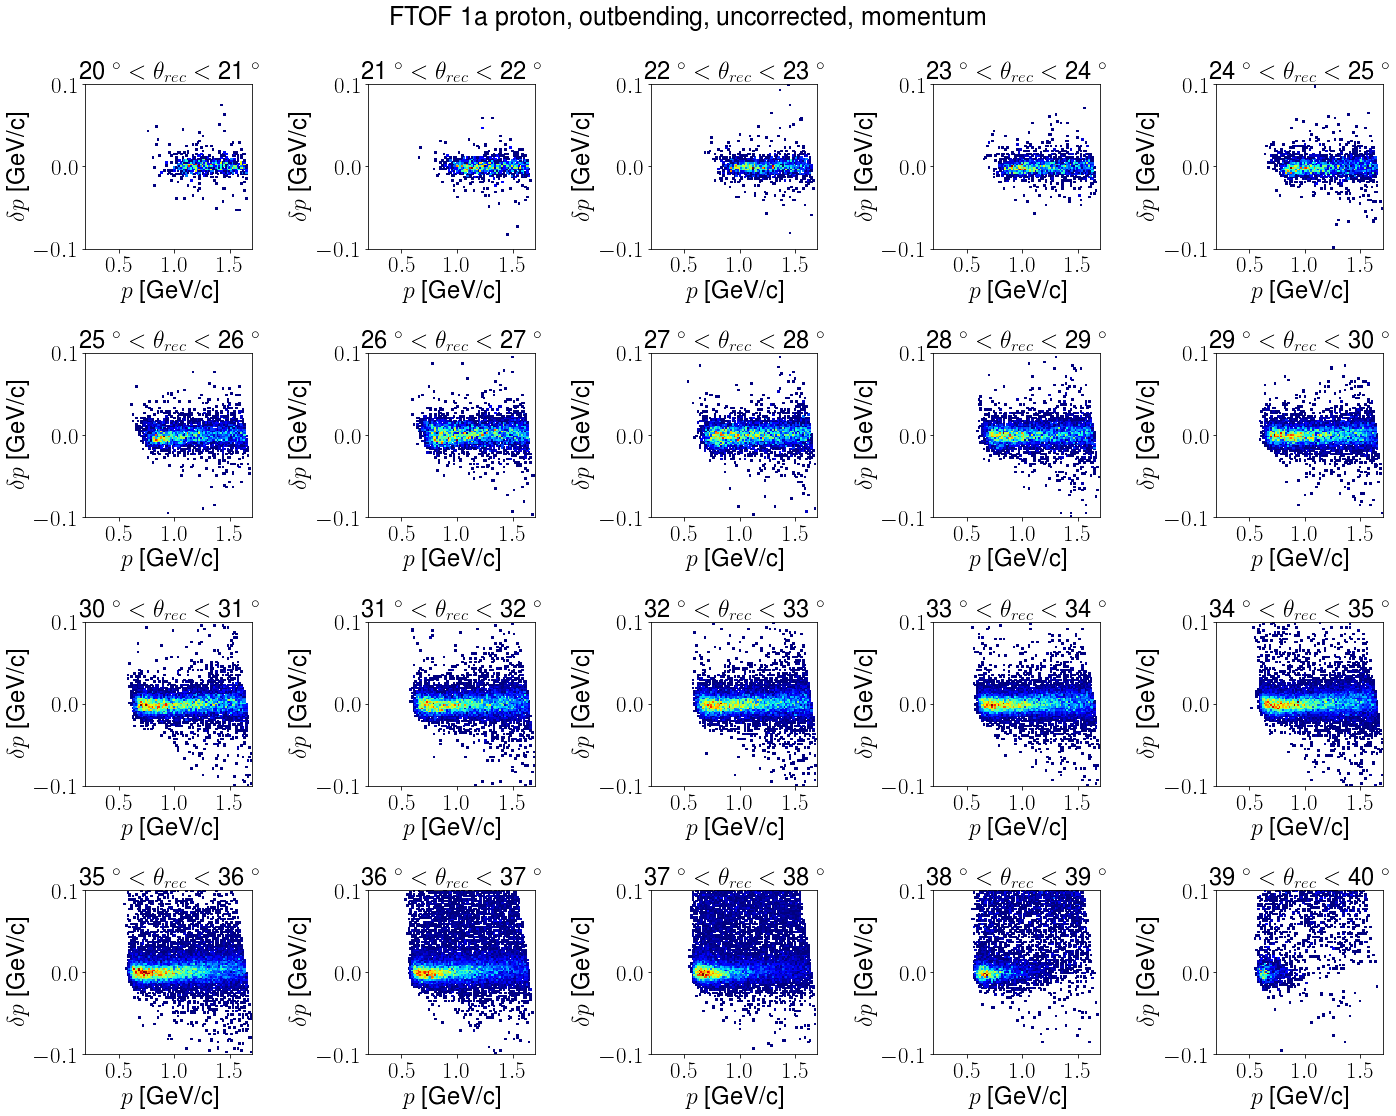

In [267]:
outbendingFD = copy(Ftof1a_outb_corr)

theta = np.linspace(0,19,20) + 20.5
# const_FD = np.select([theta<27, (theta>=27)],
#               [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
# coeff_FD = np.select([theta<27, (theta>=27)],
#               [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 1a proton, outbending, uncorrected, momentum")
plt.tight_layout()

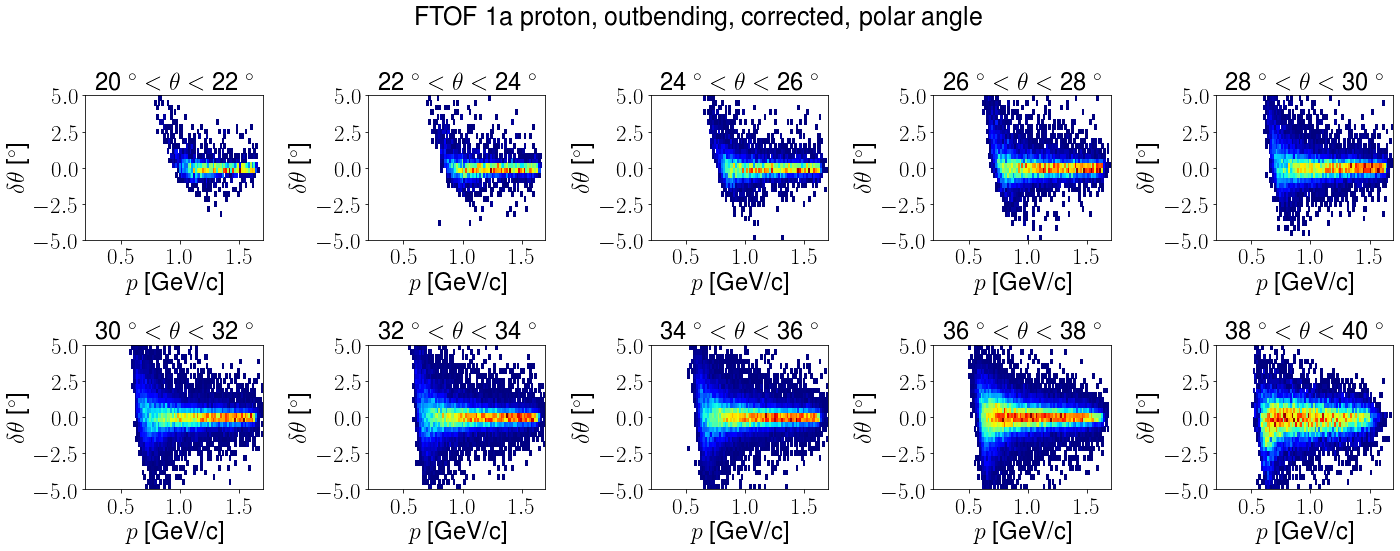

In [268]:
outbendingFD = copy(Ftof1a_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 1a proton, outbending, corrected, polar angle")
plt.tight_layout()

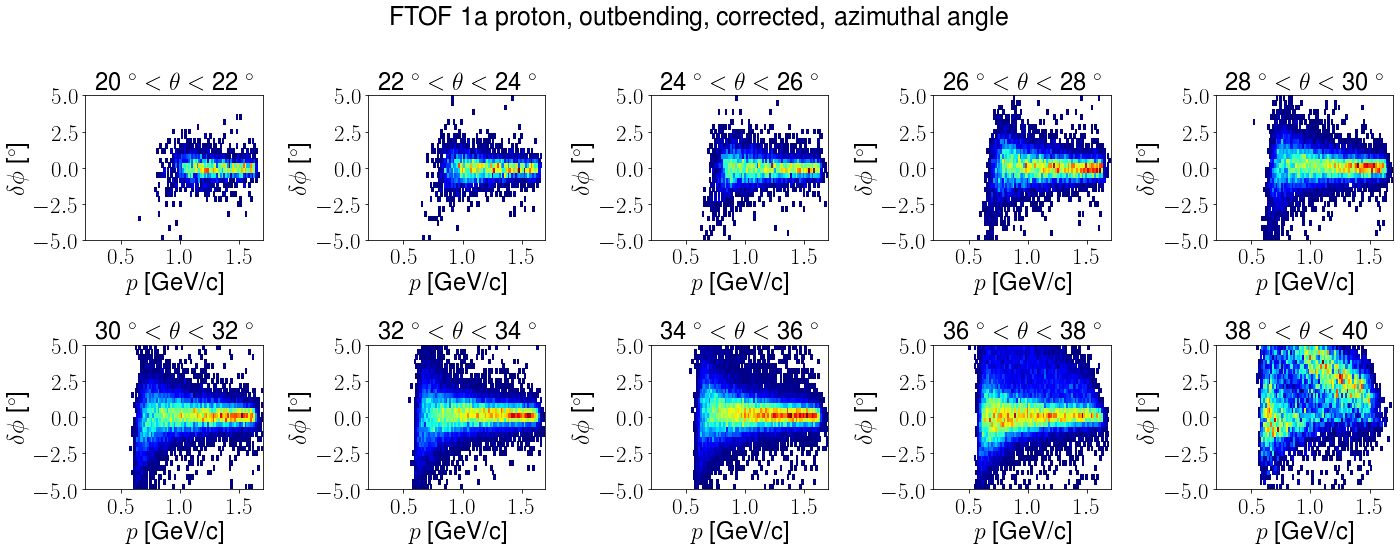

In [269]:
outbendingFD = copy(Ftof1a_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 1a proton, outbending, corrected, azimuthal angle")
plt.tight_layout()

## Ftof 1b

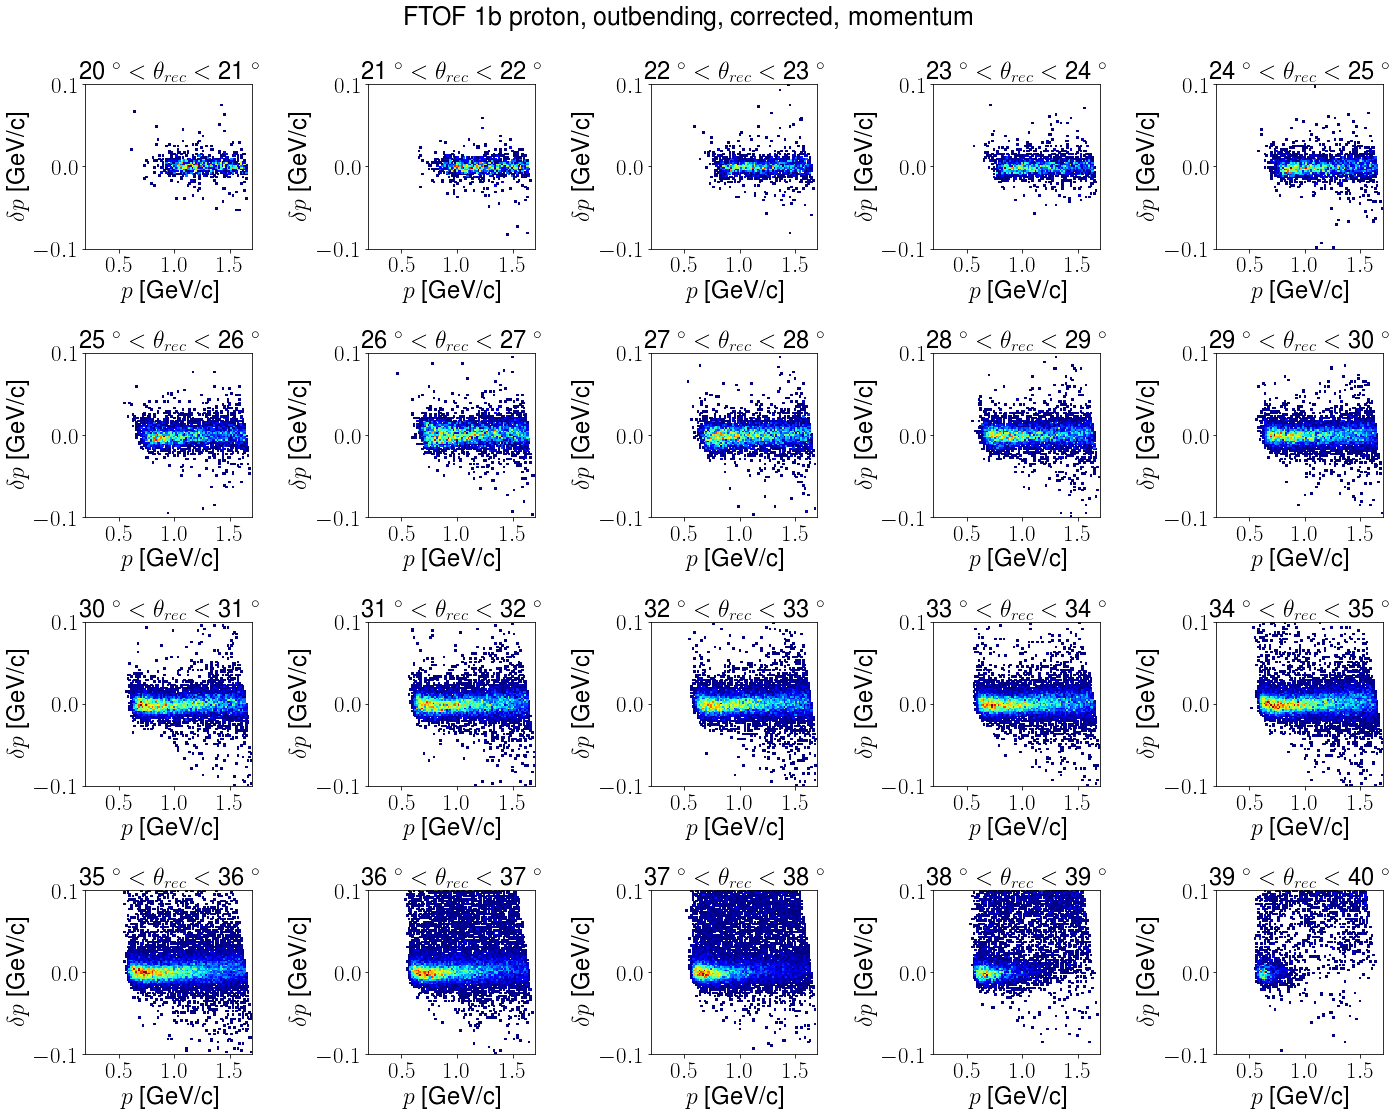

In [270]:
outbendingFD = copy(Ftof1b_outb_corr)

theta = np.linspace(0,19,20) + 20.5
# const_FD = np.select([theta<27, (theta>=27)],
#               [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
# coeff_FD = np.select([theta<27, (theta>=27)],
#               [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 1b proton, outbending, corrected, momentum")
plt.tight_layout()

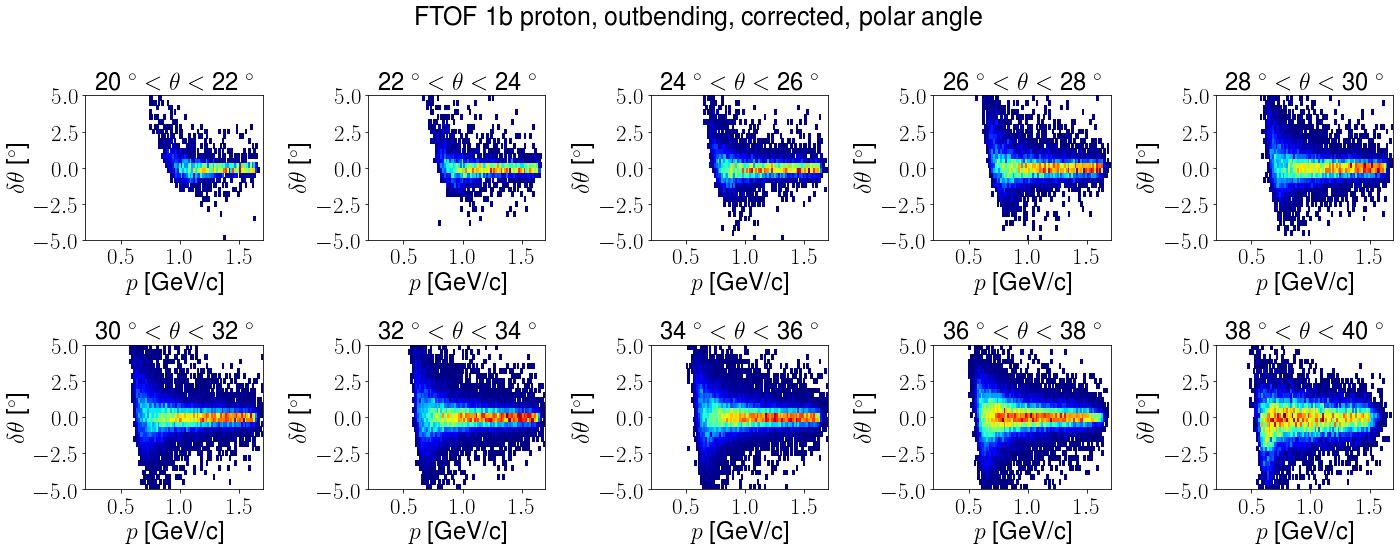

In [271]:
outbendingFD = copy(Ftof1b_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 1b proton, outbending, corrected, polar angle")
plt.tight_layout()

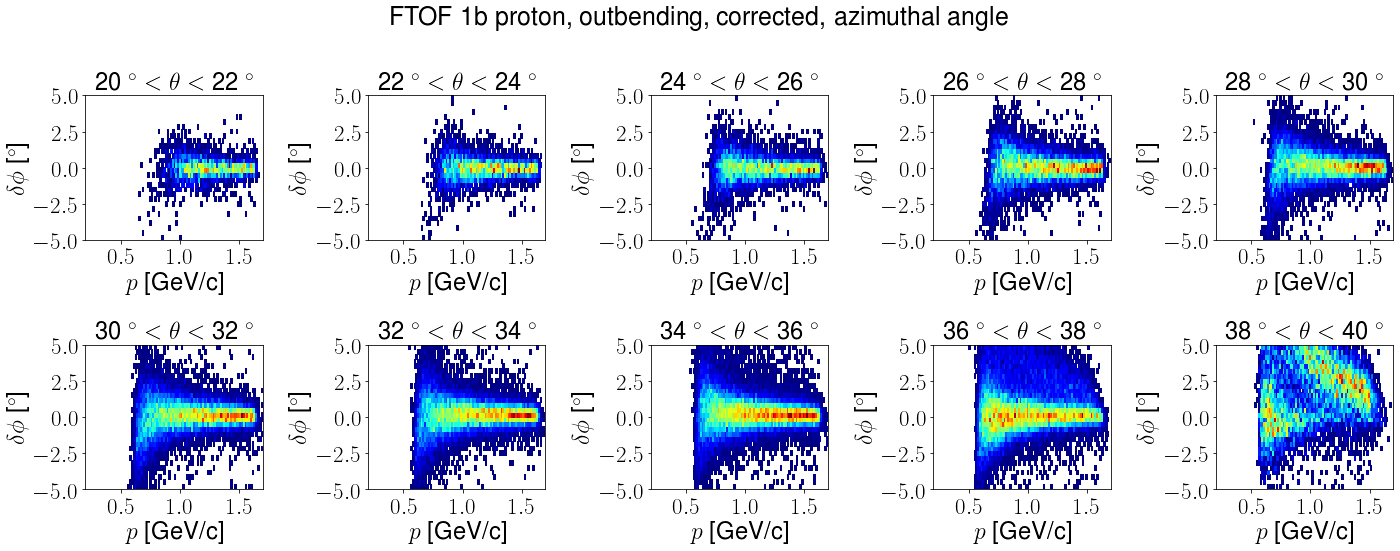

In [272]:
outbendingFD = copy(Ftof1b_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 1b proton, outbending, corrected, azimuthal angle")
plt.tight_layout()

### Ftof 2 

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


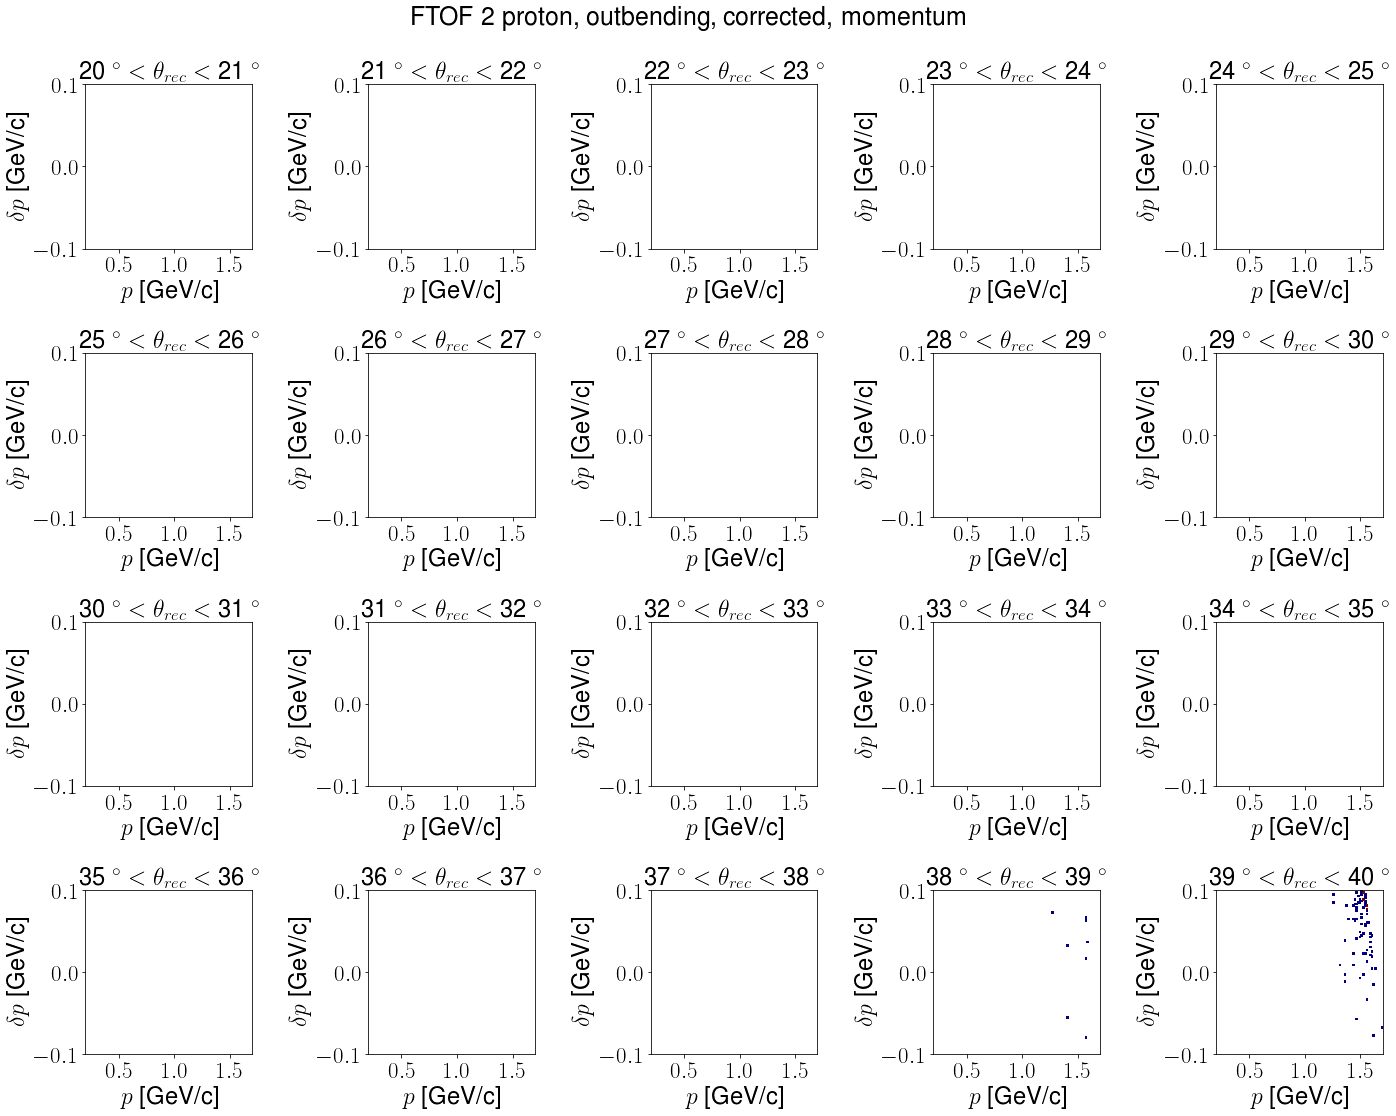

In [275]:
outbendingFD = copy(Ftof2_outb_corr)

theta = np.linspace(0,19,20) + 20.5
# const_FD = np.select([theta<27, (theta>=27)],
#               [0.02067157-0.0009827*theta, -0.11216694 + 0.0069912*theta - 0.00011733 * theta * theta])
# coeff_FD = np.select([theta<27, (theta>=27)],
#               [-0.03334437+0.00177781*theta, 0.0402797945 - 0.00197220505*theta + 4.50918200*10**(-5) * theta * theta])

# params_p = np.array([const_FD, coeff_FD]).T

fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= ind+20) & (outbendingFD.Ptheta < ind+21)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPp"] - outbendingFD.loc[thetaCond, "Pp"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-0.1, 0.1, 101)], cmap = cmap, cmin =1)

        
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta_{rec}<$ " + str(ind+21)+" "+degree)
fig.suptitle("FTOF 2 proton, outbending, corrected, momentum")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


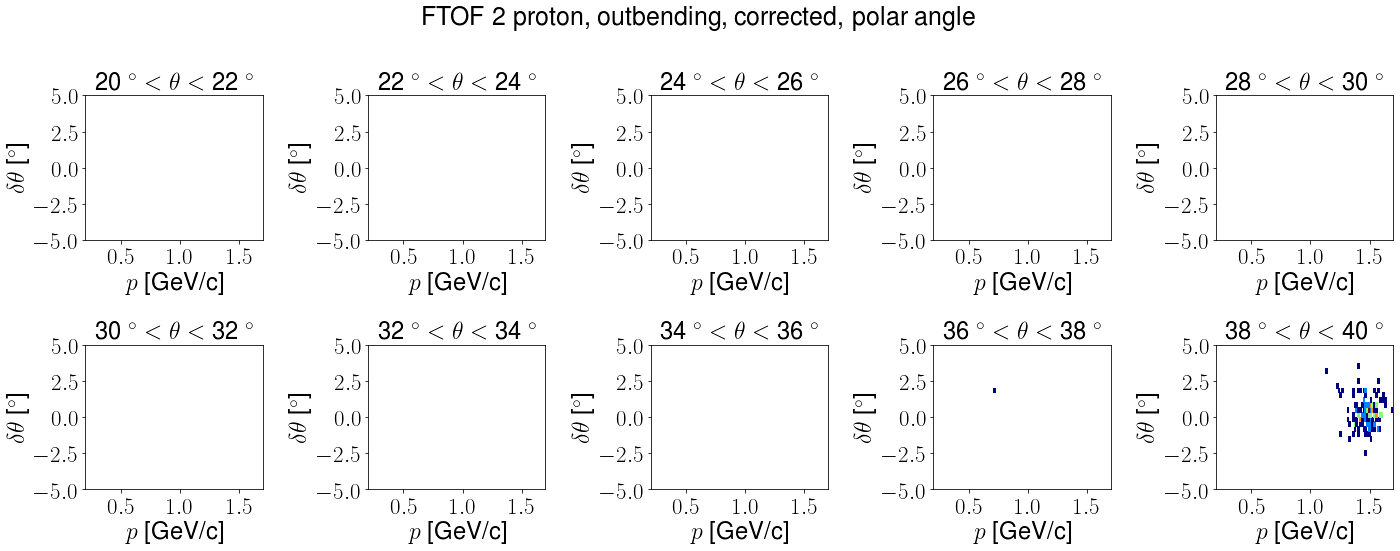

In [276]:
outbendingFD = copy(Ftof2_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -1.79343987 +0.105559096 *theta + -0.00157174358*theta*theta, -0.123044632])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -27.4344526 + 1.61037587* theta - 0.0242300381* theta * theta, -7.52117236])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -45.2983842 +2.51745350*theta - 0.0365942178*theta*theta, -3.52825441])    
# params_theta = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPtheta"] - outbendingFD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
plt.tight_layout()
        
fig.suptitle("FTOF 2 proton, outbending, corrected, polar angle")
plt.tight_layout()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


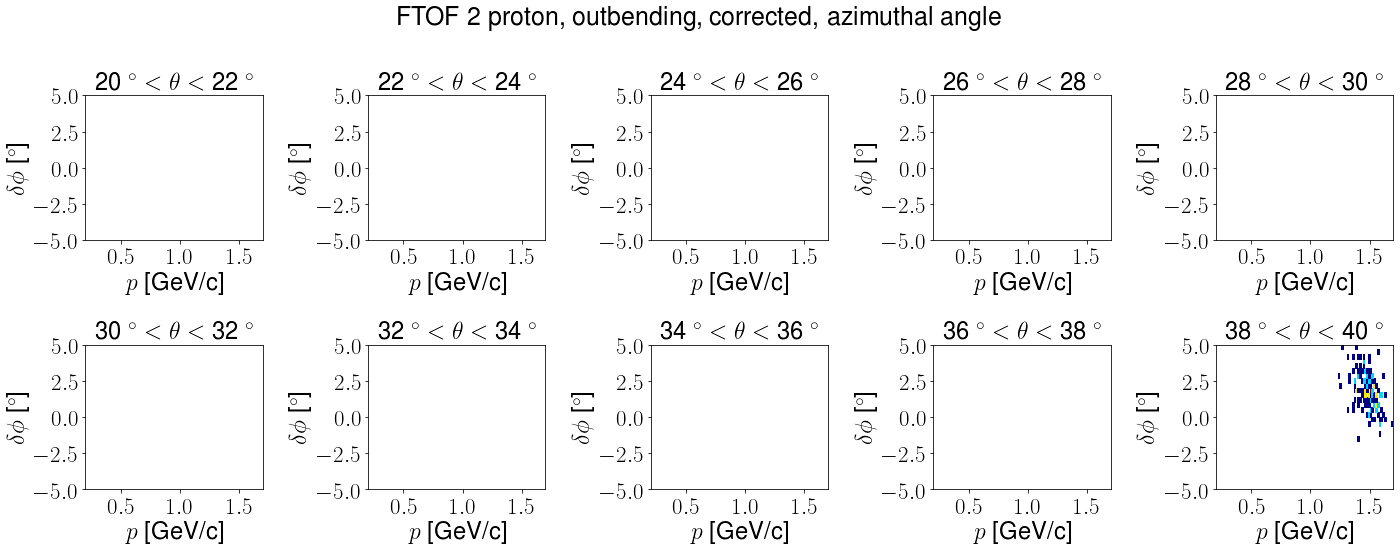

In [277]:
outbendingFD = copy(Ftof2_outb_corr)

theta = np.linspace(0,19,20)*2 + 21
# const_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 5.37967179 -0.324630795 *theta + 0.00476947696*theta*theta, -0.0224918574])
# coeff_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, 7.25038499*1000 + -413.586911* theta + 5.91815405 * theta * theta, 55.6319490])    
# coeff2_FD = np.select([theta<27, (theta>=27) & (theta<38), theta>=38],
#               [0, -124.626261 + 6.77668728*theta - 0.0960045129*theta*theta, -5.12646023])    
# params_phi = np.array([const_FD, coeff_FD, coeff2_FD]).T

fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingFD.Ptheta >= 2*ind+20) & (outbendingFD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(outbendingFD.loc[thetaCond, "Pp"], outbendingFD.loc[thetaCond, "GenPphi"] - outbendingFD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.2, 1.7, 101), np.linspace(-5, 5, 31)], cmap = cmap, cmin =1)

        
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.3, 1.7, 51), correction4(param, np.linspace(0.3, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))

fig.suptitle("FTOF 2 proton, outbending, corrected, azimuthal angle")
plt.tight_layout()

### Ctof

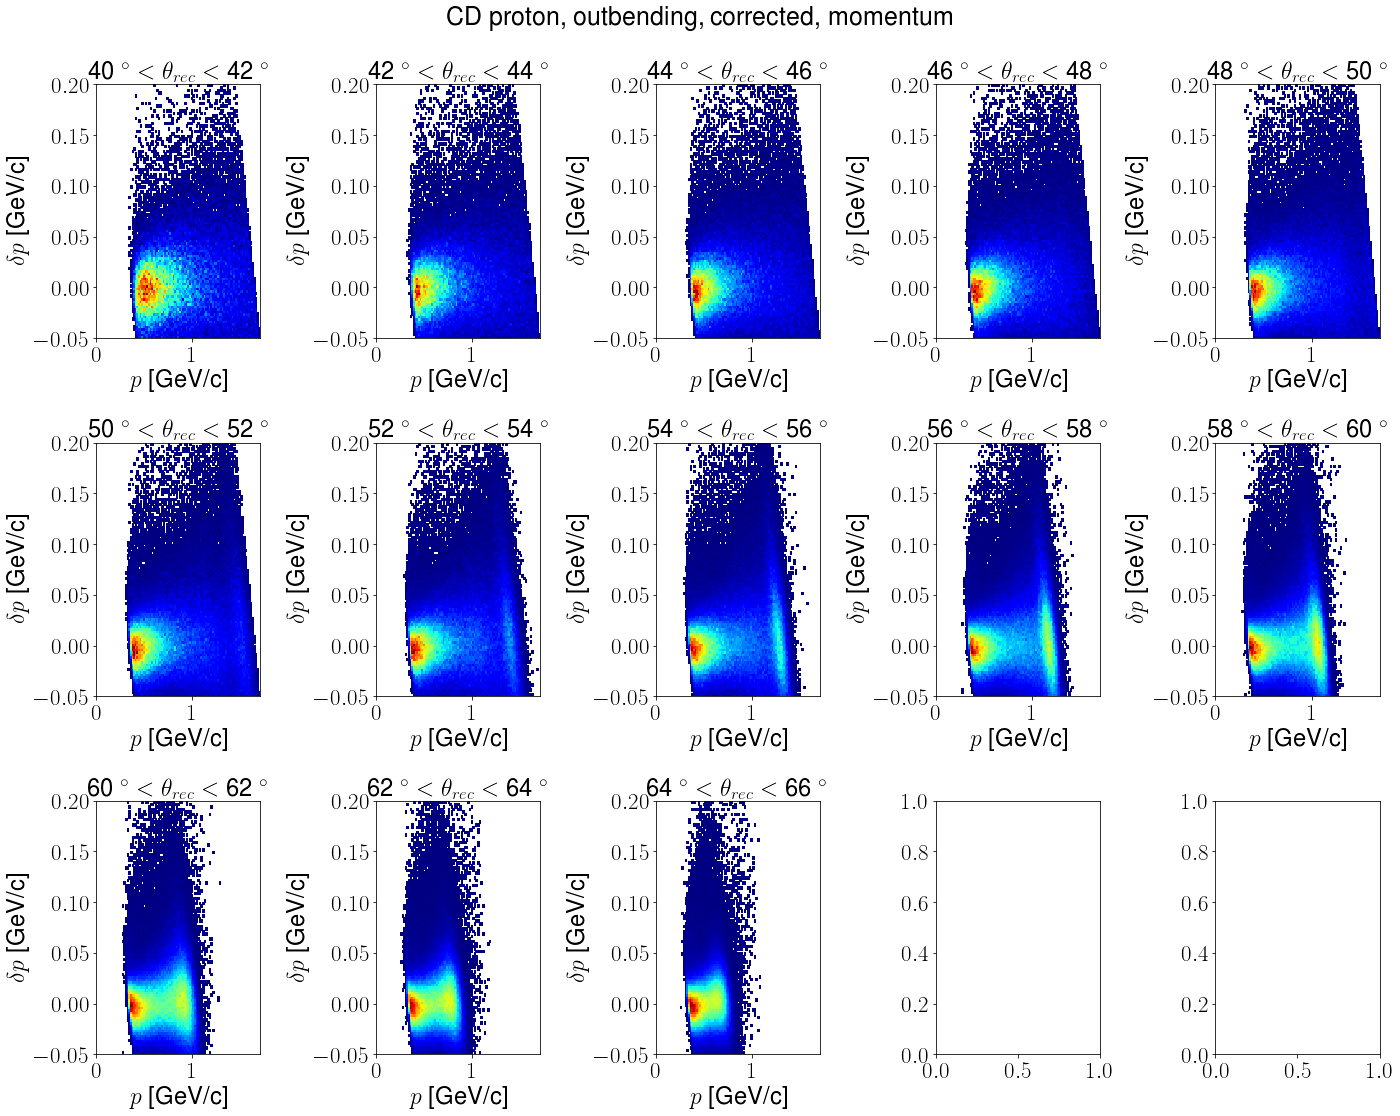

In [278]:
outbendingCD = copy(Ctof_outb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = 1.92657376 - 0.113836734*theta + 0.00215038526*theta**2 - 1.32525053 * 10**(-5)*theta**3
# coeff_CD = -0.755650043 + 0.0445538936*theta - 8.38241864*10**(-4)*theta*theta + 5.16887255 * 10**(-6) * theta**3
# params_p = np.array([const_CD, coeff_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
#         axs[row, col].hist2d(inbendingCD.loc[thetaCond, "Pp"], inbendingCD.loc[thetaCond, "GenPp"] - inbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPp"] - outbendingCD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.2, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
fig.suptitle("CD proton, outbending, corrected, momentum")
plt.tight_layout()

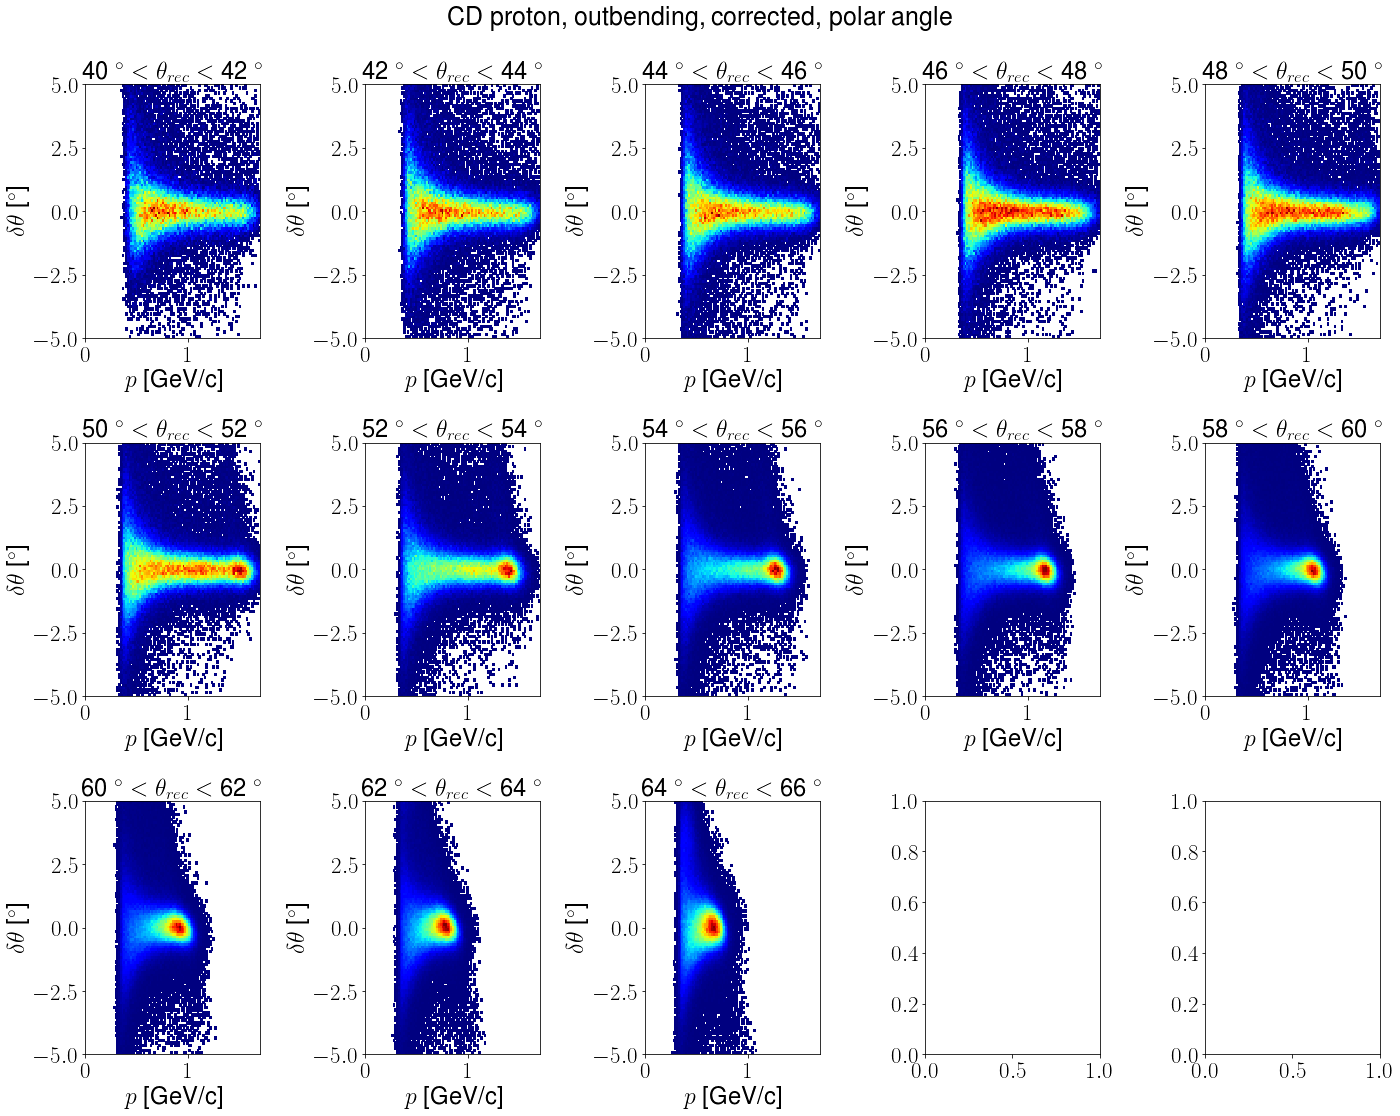

In [279]:
outbendingCD = copy(Ctof_outb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = -1.09849291*100 + 8.86664014 * theta - 0.26643881 * theta**2 + 3.53814210 * 10**(-3) * theta**3 - 1.75297107 * 10**(-5) * theta**4
# coeff_CD = 9.52034523*100 -5.74808292 * 10 * theta + 1.15386949 * theta**2 - 7.57970373 * 0.001 * theta**3
# coeff2_CD = -2.00387313*100 + 1.18979079 * 10 * theta - 2.37730217*0.1 * theta**2 + 1.55153003*0.001*theta**3
# params_theta = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPtheta"] - outbendingCD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
#         param = params_theta[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, outbending, corrected, polar angle")
plt.tight_layout()
# plt.savefig("protonCD_inb_theta.pdf")

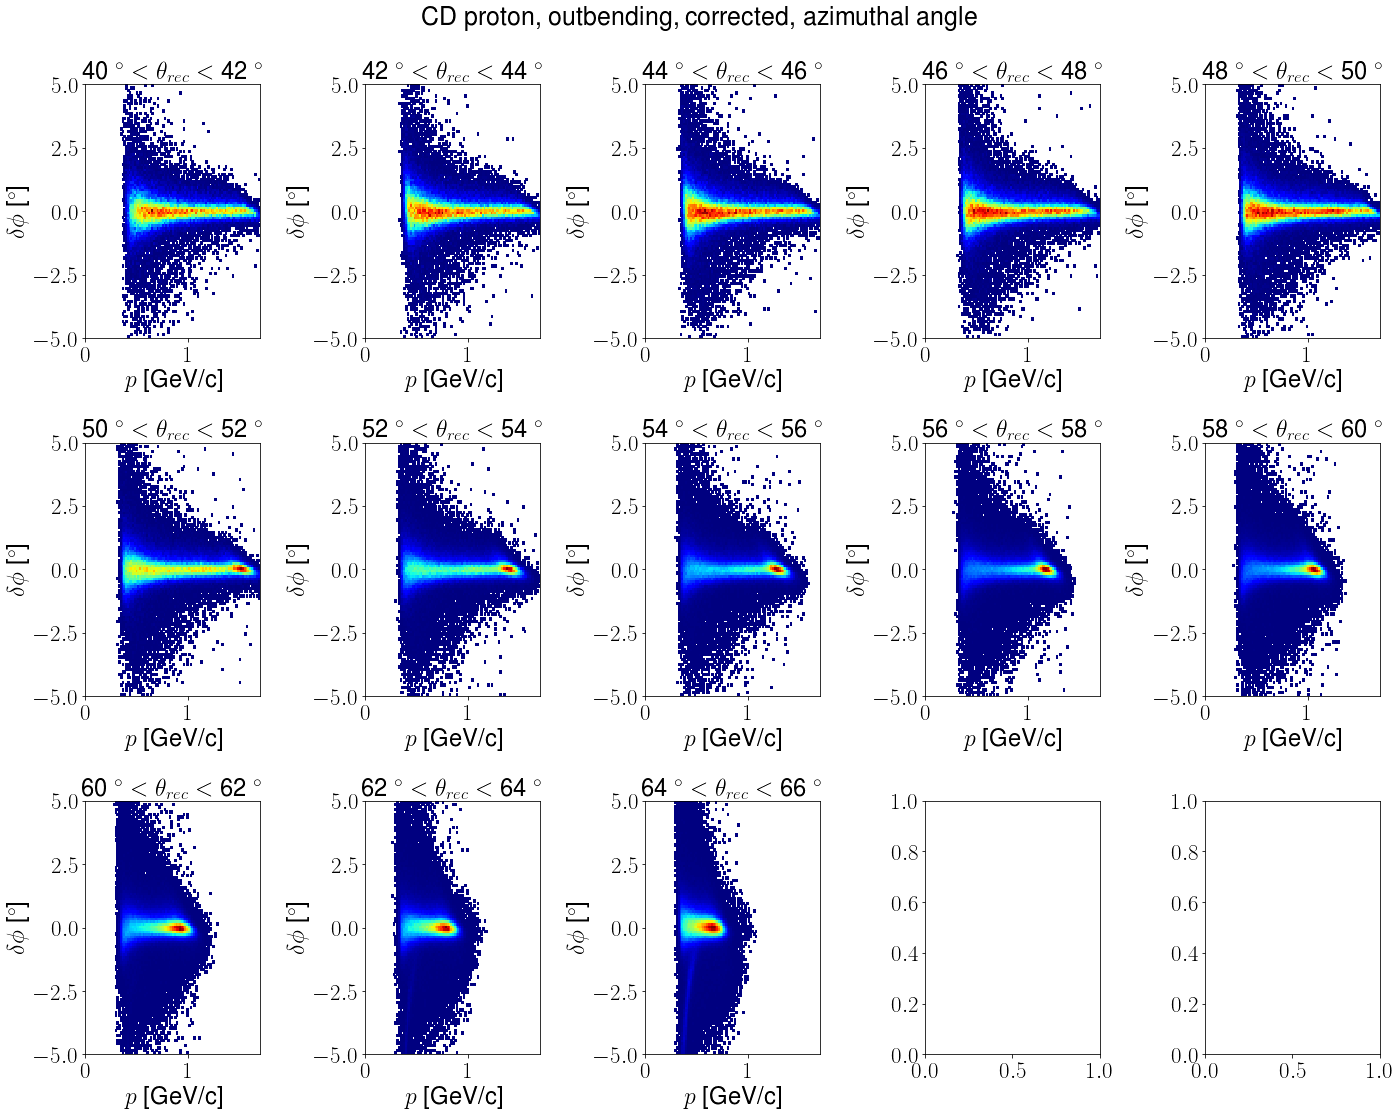

In [280]:
outbendingCD = copy(Ctof_outb_corr)

theta = np.linspace(0, 14, 15)*2+41
# const_CD = 4.94546178 -3.26662886*0.1 * theta +  7.39069603 * 0.001 * theta**2 -6.83599356*10**(-5) * theta**3 + 2.12303103*10**(-7) * theta**4
# coeff_CD = 1.72181613*10**(5) -1.36827111*10**(4) * theta + 4.00923146*10**(2) * theta**2 - 5.12792347 * theta**3 + 2.41793167*10**(-2) * theta**4
# coeff2_CD =  1.20477219*10**(2) -5.86630228 * theta + 7.44007875*10**(-2) * theta**2 -2.42652473*10**(-4) * theta**3
# params_phi = np.array([const_CD, coeff_CD, coeff2_CD]).T
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
        if ind >12:
            continue
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (outbendingCD.Ptheta >= 2*(ind)+40) & (outbendingCD.Ptheta < 2*(ind+1)+40)
        axs[row, col].hist2d(outbendingCD.loc[thetaCond, "Pp"], outbendingCD.loc[thetaCond, "GenPphi"] - outbendingCD.loc[thetaCond, "Pphi"], bins = [np.linspace(0, 1.7, 101), np.linspace(-5, 5, 101)], cmap = cmap, cmin =1)
#         param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction4(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta_{rec}<$ " + str(2*(ind+1)+40)+" "+degree)
        axs[row, col].set_yticks(np.linspace(-5, 5, 5))
fig.suptitle("CD proton, outbending, corrected, azimuthal angle")
plt.tight_layout()